# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [120]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

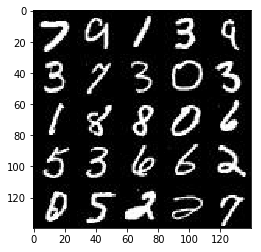

In [121]:
show_n_images = 30

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

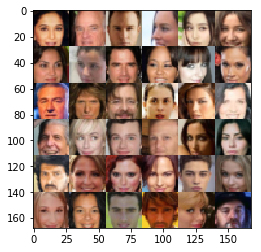

In [122]:
show_n_images = 40

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [123]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [124]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    
    real_images = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name="input_real")
    z_data = tf.placeholder(tf.float32, [None, z_dim], name="input_z")
    learn_rate = tf.placeholder(tf.float32, name="learn_rate")
    
    return real_images, z_data, learn_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [143]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope("discriminator", reuse=reuse):
#        x = tf.layers.conv2d(images, 28, 5, strides=(2,2), padding='SAME')
#        x = tf.maximum(x, alpha * x)
        
#        x = tf.layers.conv2d(x, 32, 5, strides=(2,2), padding='SAME')
#        x = tf.layers.batch_normalization(x, training=True)
#        x = tf.maximum(x, alpha * x)
        
        x = tf.layers.conv2d(images, 64, 5, strides=(2,2), padding='SAME')
#        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(x, alpha * x)

        x = tf.layers.conv2d(x, 128, 5, strides=(2,2), padding='SAME')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(x, alpha * x)
        
        x = tf.layers.conv2d(x, 256, 5, strides=(2,2), padding='SAME')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(x, alpha * x)
        
        flat = tf.reshape(x, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.nn.sigmoid(logits)
    

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [126]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    training = is_train
    
#    kinit = tf.random_normal_initializer(stddev=0.02)
    
    with tf.variable_scope('generator', reuse=not training):
        x = tf.layers.dense(z, 7*7*256)
        x = tf.reshape(x, (-1, 7, 7, 256))
        x = tf.layers.batch_normalization(x, training=training)
        x = tf.maximum(x, alpha * x)

        x = tf.layers.conv2d_transpose(x, 128, 5, strides=(2,2), padding='SAME')
        x = tf.layers.batch_normalization(x, training=training)
        x = tf.maximum(x, alpha * x)

        x = tf.layers.conv2d_transpose(x, 64, 5, strides=(2,2), padding='SAME')
        x = tf.layers.batch_normalization(x, training=training)
        x = tf.maximum(x, alpha * x)

#        x = tf.layers.conv2d_transpose(x, 32, 5, strides=(1,1), padding='SAME')
#        x = tf.layers.batch_normalization(x, training=training)
#        x = tf.maximum(x, alpha * x)

        x = tf.layers.conv2d_transpose(x, out_channel_dim, 5, strides=(1,1), padding='SAME')

        logits = x

        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [132]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.1, smooth=0.9):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * smooth))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    
    d_loss = d_loss_real + d_loss_fake 
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    

    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [128]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    upd_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_upd = [opt for opt in upd_ops if opt.name.startswith('discriminator')]
    g_upd = [opt for opt in upd_ops if opt.name.startswith('generator')]
    
    with tf.control_dependencies(d_upd):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        
    with tf.control_dependencies(g_upd):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [129]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [145]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    print_every = 10
    show_every = 100
    n_images = 3
    
    image_width, image_height = data_shape[1], data_shape[2]
    out_channel_dim = data_shape[3]
    
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, out_channel_dim, z_dim)

    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim, alpha=0.2)

    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
#    saver = tf.train.Saver()
    
    steps = 0
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images *= 2.0
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real:batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})
                
                if steps % print_every == 0: 
                    train_loss_d = d_loss.eval({input_real:batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, input_z, out_channel_dim, data_image_mode)
                
            
                    
#        saver.save(sess, '/output/generator.ckpt')


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6344... Generator Loss: 2.8467
Epoch 1/2... Discriminator Loss: 9.4564... Generator Loss: 0.0003
Epoch 1/2... Discriminator Loss: 0.3958... Generator Loss: 6.0159
Epoch 1/2... Discriminator Loss: 2.2461... Generator Loss: 0.9905
Epoch 1/2... Discriminator Loss: 1.6041... Generator Loss: 0.6743
Epoch 1/2... Discriminator Loss: 2.0054... Generator Loss: 1.3164
Epoch 1/2... Discriminator Loss: 1.7146... Generator Loss: 0.6731
Epoch 1/2... Discriminator Loss: 1.1932... Generator Loss: 0.9027
Epoch 1/2... Discriminator Loss: 2.4701... Generator Loss: 0.1626
Epoch 1/2... Discriminator Loss: 1.4676... Generator Loss: 0.5190


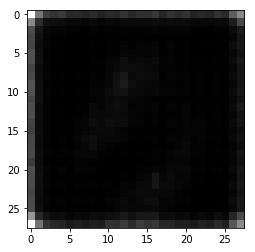

Epoch 1/2... Discriminator Loss: 2.7015... Generator Loss: 0.1808
Epoch 1/2... Discriminator Loss: 1.5373... Generator Loss: 0.7954
Epoch 1/2... Discriminator Loss: 0.9541... Generator Loss: 1.3363
Epoch 1/2... Discriminator Loss: 3.2639... Generator Loss: 0.0777
Epoch 1/2... Discriminator Loss: 2.8450... Generator Loss: 0.1398
Epoch 1/2... Discriminator Loss: 1.6081... Generator Loss: 0.7356
Epoch 1/2... Discriminator Loss: 1.5570... Generator Loss: 0.7029
Epoch 1/2... Discriminator Loss: 1.3495... Generator Loss: 0.7572
Epoch 1/2... Discriminator Loss: 1.9145... Generator Loss: 0.3625
Epoch 1/2... Discriminator Loss: 1.9963... Generator Loss: 0.2789


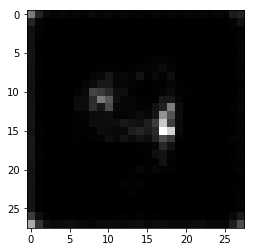

Epoch 1/2... Discriminator Loss: 1.4929... Generator Loss: 0.6873
Epoch 1/2... Discriminator Loss: 1.7281... Generator Loss: 0.4137
Epoch 1/2... Discriminator Loss: 1.3077... Generator Loss: 0.5236
Epoch 1/2... Discriminator Loss: 1.3194... Generator Loss: 0.6418
Epoch 1/2... Discriminator Loss: 1.3643... Generator Loss: 0.6278
Epoch 1/2... Discriminator Loss: 1.2490... Generator Loss: 0.6604
Epoch 1/2... Discriminator Loss: 1.4567... Generator Loss: 0.4425
Epoch 1/2... Discriminator Loss: 1.1825... Generator Loss: 0.7873
Epoch 1/2... Discriminator Loss: 1.1624... Generator Loss: 0.9514
Epoch 1/2... Discriminator Loss: 2.0402... Generator Loss: 0.3751


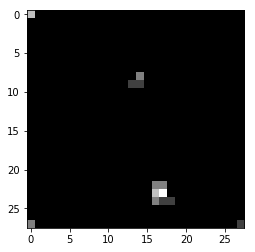

Epoch 1/2... Discriminator Loss: 1.4636... Generator Loss: 0.4283
Epoch 1/2... Discriminator Loss: 1.7168... Generator Loss: 0.3253
Epoch 1/2... Discriminator Loss: 1.1737... Generator Loss: 0.6923
Epoch 1/2... Discriminator Loss: 1.8632... Generator Loss: 0.4044
Epoch 1/2... Discriminator Loss: 1.4581... Generator Loss: 0.4507
Epoch 1/2... Discriminator Loss: 1.3384... Generator Loss: 0.9979
Epoch 1/2... Discriminator Loss: 2.1908... Generator Loss: 0.1825
Epoch 1/2... Discriminator Loss: 1.2665... Generator Loss: 0.8114
Epoch 1/2... Discriminator Loss: 1.5219... Generator Loss: 0.5173
Epoch 1/2... Discriminator Loss: 1.9204... Generator Loss: 0.2498


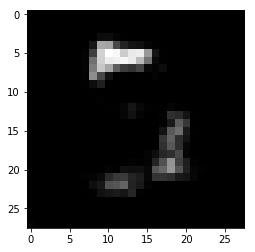

Epoch 1/2... Discriminator Loss: 1.3505... Generator Loss: 0.6291
Epoch 1/2... Discriminator Loss: 1.8190... Generator Loss: 0.3234
Epoch 1/2... Discriminator Loss: 1.7640... Generator Loss: 0.4780
Epoch 1/2... Discriminator Loss: 1.5175... Generator Loss: 0.5722
Epoch 1/2... Discriminator Loss: 1.6673... Generator Loss: 0.4218
Epoch 1/2... Discriminator Loss: 1.5545... Generator Loss: 0.4009
Epoch 1/2... Discriminator Loss: 1.9398... Generator Loss: 0.2900
Epoch 1/2... Discriminator Loss: 1.2317... Generator Loss: 0.9188
Epoch 1/2... Discriminator Loss: 1.6127... Generator Loss: 1.6220
Epoch 1/2... Discriminator Loss: 1.4996... Generator Loss: 0.4597


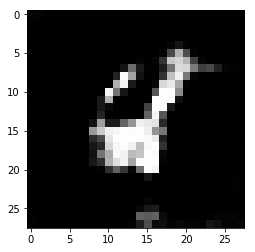

Epoch 1/2... Discriminator Loss: 1.9551... Generator Loss: 0.2882
Epoch 1/2... Discriminator Loss: 2.3017... Generator Loss: 0.1798
Epoch 1/2... Discriminator Loss: 1.6533... Generator Loss: 0.3760
Epoch 1/2... Discriminator Loss: 1.6038... Generator Loss: 0.3942
Epoch 1/2... Discriminator Loss: 1.2708... Generator Loss: 0.9218
Epoch 1/2... Discriminator Loss: 1.2817... Generator Loss: 0.6394
Epoch 1/2... Discriminator Loss: 1.3048... Generator Loss: 0.5712
Epoch 1/2... Discriminator Loss: 2.1348... Generator Loss: 0.2112
Epoch 1/2... Discriminator Loss: 1.3450... Generator Loss: 0.7324
Epoch 1/2... Discriminator Loss: 1.6684... Generator Loss: 0.3469


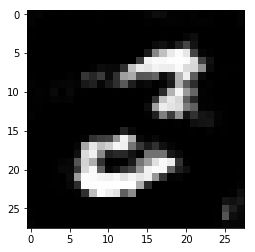

Epoch 1/2... Discriminator Loss: 1.6139... Generator Loss: 0.5092
Epoch 1/2... Discriminator Loss: 1.8910... Generator Loss: 0.3383
Epoch 1/2... Discriminator Loss: 1.0883... Generator Loss: 0.9156
Epoch 1/2... Discriminator Loss: 2.0078... Generator Loss: 0.2429
Epoch 1/2... Discriminator Loss: 1.2525... Generator Loss: 0.5653
Epoch 1/2... Discriminator Loss: 1.4830... Generator Loss: 0.5676
Epoch 1/2... Discriminator Loss: 1.6764... Generator Loss: 0.3283
Epoch 1/2... Discriminator Loss: 1.4299... Generator Loss: 0.9525
Epoch 1/2... Discriminator Loss: 1.3512... Generator Loss: 0.7250
Epoch 1/2... Discriminator Loss: 1.4879... Generator Loss: 0.6838


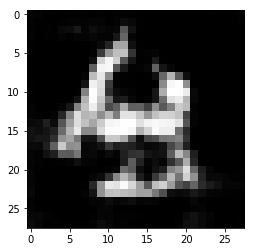

Epoch 1/2... Discriminator Loss: 1.3903... Generator Loss: 0.7587
Epoch 1/2... Discriminator Loss: 1.1814... Generator Loss: 0.9310
Epoch 1/2... Discriminator Loss: 1.1587... Generator Loss: 0.9036
Epoch 1/2... Discriminator Loss: 0.9802... Generator Loss: 0.9051
Epoch 1/2... Discriminator Loss: 1.8784... Generator Loss: 0.2481
Epoch 1/2... Discriminator Loss: 1.1932... Generator Loss: 0.8087
Epoch 1/2... Discriminator Loss: 1.0531... Generator Loss: 1.0067
Epoch 1/2... Discriminator Loss: 1.3366... Generator Loss: 0.6422
Epoch 1/2... Discriminator Loss: 1.4492... Generator Loss: 0.5676
Epoch 1/2... Discriminator Loss: 1.4662... Generator Loss: 0.5041


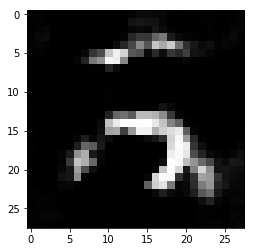

Epoch 1/2... Discriminator Loss: 1.4531... Generator Loss: 0.4519
Epoch 1/2... Discriminator Loss: 1.8130... Generator Loss: 0.3096
Epoch 1/2... Discriminator Loss: 1.2442... Generator Loss: 0.6601
Epoch 1/2... Discriminator Loss: 1.5055... Generator Loss: 0.4859
Epoch 1/2... Discriminator Loss: 1.5107... Generator Loss: 0.4538
Epoch 1/2... Discriminator Loss: 1.2190... Generator Loss: 0.5935
Epoch 1/2... Discriminator Loss: 1.2267... Generator Loss: 0.9846
Epoch 1/2... Discriminator Loss: 1.8289... Generator Loss: 0.3131
Epoch 1/2... Discriminator Loss: 1.1214... Generator Loss: 1.6858
Epoch 1/2... Discriminator Loss: 1.0883... Generator Loss: 1.2116


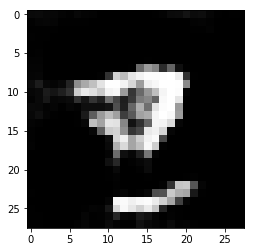

Epoch 1/2... Discriminator Loss: 1.3209... Generator Loss: 0.6202
Epoch 1/2... Discriminator Loss: 1.4744... Generator Loss: 0.5073
Epoch 1/2... Discriminator Loss: 2.0696... Generator Loss: 0.2234
Epoch 1/2... Discriminator Loss: 1.0902... Generator Loss: 0.8729
Epoch 1/2... Discriminator Loss: 1.7063... Generator Loss: 1.3058
Epoch 1/2... Discriminator Loss: 1.2454... Generator Loss: 0.7124
Epoch 1/2... Discriminator Loss: 1.0531... Generator Loss: 1.2238
Epoch 1/2... Discriminator Loss: 1.3279... Generator Loss: 0.9349
Epoch 1/2... Discriminator Loss: 1.9943... Generator Loss: 0.2199
Epoch 1/2... Discriminator Loss: 1.5178... Generator Loss: 0.4853


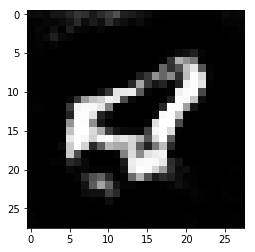

Epoch 1/2... Discriminator Loss: 1.0297... Generator Loss: 0.8449
Epoch 1/2... Discriminator Loss: 0.9428... Generator Loss: 1.4395
Epoch 1/2... Discriminator Loss: 1.5281... Generator Loss: 0.5576
Epoch 1/2... Discriminator Loss: 1.1630... Generator Loss: 1.0359
Epoch 1/2... Discriminator Loss: 1.5761... Generator Loss: 0.6032
Epoch 1/2... Discriminator Loss: 1.2188... Generator Loss: 0.8564
Epoch 1/2... Discriminator Loss: 0.9211... Generator Loss: 1.1184
Epoch 1/2... Discriminator Loss: 1.4638... Generator Loss: 0.9509
Epoch 1/2... Discriminator Loss: 2.5561... Generator Loss: 0.1214
Epoch 1/2... Discriminator Loss: 1.9601... Generator Loss: 0.2895


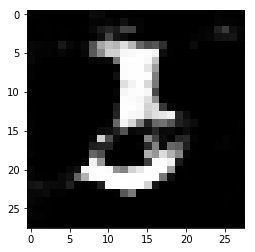

Epoch 1/2... Discriminator Loss: 1.2205... Generator Loss: 0.7270
Epoch 1/2... Discriminator Loss: 1.4963... Generator Loss: 0.4953
Epoch 1/2... Discriminator Loss: 1.3739... Generator Loss: 0.4763
Epoch 1/2... Discriminator Loss: 0.7176... Generator Loss: 1.2886
Epoch 1/2... Discriminator Loss: 1.8087... Generator Loss: 0.2883
Epoch 1/2... Discriminator Loss: 1.6746... Generator Loss: 0.3109
Epoch 1/2... Discriminator Loss: 1.9768... Generator Loss: 0.4500
Epoch 1/2... Discriminator Loss: 1.2735... Generator Loss: 0.8581
Epoch 1/2... Discriminator Loss: 1.7333... Generator Loss: 1.7929
Epoch 1/2... Discriminator Loss: 0.8202... Generator Loss: 1.2525


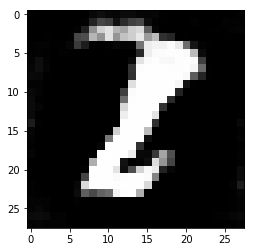

Epoch 1/2... Discriminator Loss: 1.2819... Generator Loss: 0.5878
Epoch 1/2... Discriminator Loss: 1.2472... Generator Loss: 0.7608
Epoch 1/2... Discriminator Loss: 1.4107... Generator Loss: 1.7740
Epoch 1/2... Discriminator Loss: 1.1782... Generator Loss: 1.0003
Epoch 1/2... Discriminator Loss: 0.9563... Generator Loss: 1.2451
Epoch 1/2... Discriminator Loss: 1.7480... Generator Loss: 0.3396
Epoch 1/2... Discriminator Loss: 1.3364... Generator Loss: 0.7150
Epoch 1/2... Discriminator Loss: 1.3822... Generator Loss: 0.4871
Epoch 1/2... Discriminator Loss: 1.2516... Generator Loss: 0.5775
Epoch 1/2... Discriminator Loss: 1.1282... Generator Loss: 0.8956


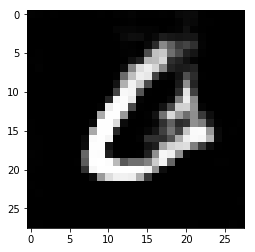

Epoch 1/2... Discriminator Loss: 1.4533... Generator Loss: 1.2578
Epoch 1/2... Discriminator Loss: 1.2512... Generator Loss: 0.6422
Epoch 1/2... Discriminator Loss: 0.9037... Generator Loss: 1.4597
Epoch 1/2... Discriminator Loss: 0.9684... Generator Loss: 0.9938
Epoch 1/2... Discriminator Loss: 1.3337... Generator Loss: 0.7647
Epoch 1/2... Discriminator Loss: 1.4003... Generator Loss: 0.6778
Epoch 1/2... Discriminator Loss: 1.5365... Generator Loss: 0.3674
Epoch 1/2... Discriminator Loss: 1.2286... Generator Loss: 0.5951
Epoch 1/2... Discriminator Loss: 1.1342... Generator Loss: 0.9525
Epoch 1/2... Discriminator Loss: 1.3369... Generator Loss: 0.6919


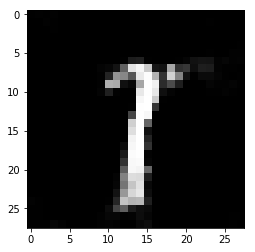

Epoch 1/2... Discriminator Loss: 1.3214... Generator Loss: 0.5048
Epoch 1/2... Discriminator Loss: 1.3840... Generator Loss: 0.7361
Epoch 1/2... Discriminator Loss: 1.4271... Generator Loss: 0.5148
Epoch 1/2... Discriminator Loss: 2.2398... Generator Loss: 0.2492
Epoch 1/2... Discriminator Loss: 1.3314... Generator Loss: 0.6725
Epoch 1/2... Discriminator Loss: 1.3267... Generator Loss: 0.5344
Epoch 1/2... Discriminator Loss: 0.9873... Generator Loss: 1.1365
Epoch 1/2... Discriminator Loss: 0.9976... Generator Loss: 0.8305
Epoch 1/2... Discriminator Loss: 0.8091... Generator Loss: 1.2722
Epoch 1/2... Discriminator Loss: 1.3653... Generator Loss: 1.1648


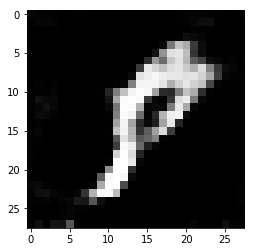

Epoch 1/2... Discriminator Loss: 1.4425... Generator Loss: 0.4416
Epoch 1/2... Discriminator Loss: 1.1053... Generator Loss: 0.8442
Epoch 1/2... Discriminator Loss: 0.9084... Generator Loss: 1.0137
Epoch 1/2... Discriminator Loss: 1.3047... Generator Loss: 0.6154
Epoch 1/2... Discriminator Loss: 2.3438... Generator Loss: 0.1577
Epoch 1/2... Discriminator Loss: 2.0706... Generator Loss: 0.2302
Epoch 1/2... Discriminator Loss: 2.4772... Generator Loss: 0.1443
Epoch 1/2... Discriminator Loss: 1.4434... Generator Loss: 0.9357
Epoch 1/2... Discriminator Loss: 0.7742... Generator Loss: 1.4094
Epoch 1/2... Discriminator Loss: 1.7361... Generator Loss: 0.3730


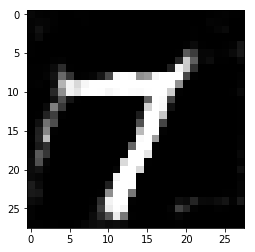

Epoch 1/2... Discriminator Loss: 2.1512... Generator Loss: 0.2439
Epoch 1/2... Discriminator Loss: 1.6505... Generator Loss: 0.3641
Epoch 1/2... Discriminator Loss: 1.1221... Generator Loss: 1.5827
Epoch 1/2... Discriminator Loss: 1.3535... Generator Loss: 0.8148
Epoch 1/2... Discriminator Loss: 1.0661... Generator Loss: 0.7746
Epoch 1/2... Discriminator Loss: 1.1406... Generator Loss: 1.2635
Epoch 1/2... Discriminator Loss: 1.4446... Generator Loss: 0.5076
Epoch 1/2... Discriminator Loss: 0.9652... Generator Loss: 0.9278
Epoch 1/2... Discriminator Loss: 1.2192... Generator Loss: 1.2672
Epoch 1/2... Discriminator Loss: 1.4960... Generator Loss: 0.5122


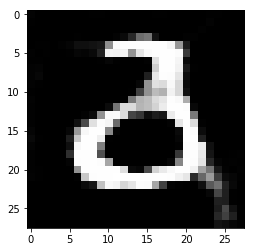

Epoch 1/2... Discriminator Loss: 1.5581... Generator Loss: 0.6852
Epoch 1/2... Discriminator Loss: 1.1396... Generator Loss: 0.7833
Epoch 1/2... Discriminator Loss: 1.4358... Generator Loss: 0.5165
Epoch 1/2... Discriminator Loss: 1.4960... Generator Loss: 0.5591
Epoch 1/2... Discriminator Loss: 1.4463... Generator Loss: 0.9628
Epoch 1/2... Discriminator Loss: 1.0233... Generator Loss: 0.8945
Epoch 1/2... Discriminator Loss: 1.3906... Generator Loss: 0.4384
Epoch 1/2... Discriminator Loss: 1.6371... Generator Loss: 0.3794
Epoch 1/2... Discriminator Loss: 0.6414... Generator Loss: 1.6541
Epoch 1/2... Discriminator Loss: 2.1428... Generator Loss: 0.1905


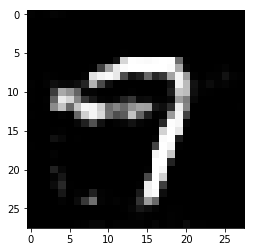

Epoch 1/2... Discriminator Loss: 1.0942... Generator Loss: 0.7079
Epoch 1/2... Discriminator Loss: 1.7281... Generator Loss: 0.4395
Epoch 1/2... Discriminator Loss: 1.0179... Generator Loss: 0.9239
Epoch 1/2... Discriminator Loss: 2.0661... Generator Loss: 0.2436
Epoch 1/2... Discriminator Loss: 1.6063... Generator Loss: 0.3735
Epoch 1/2... Discriminator Loss: 1.1372... Generator Loss: 0.7652
Epoch 1/2... Discriminator Loss: 1.0177... Generator Loss: 1.1208
Epoch 1/2... Discriminator Loss: 1.4079... Generator Loss: 0.4763
Epoch 1/2... Discriminator Loss: 1.2080... Generator Loss: 0.6174
Epoch 1/2... Discriminator Loss: 1.3897... Generator Loss: 0.5220


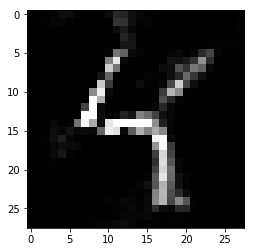

Epoch 1/2... Discriminator Loss: 1.2790... Generator Loss: 0.5433
Epoch 1/2... Discriminator Loss: 1.1073... Generator Loss: 1.4283
Epoch 1/2... Discriminator Loss: 1.2528... Generator Loss: 1.4810
Epoch 1/2... Discriminator Loss: 0.8813... Generator Loss: 1.1770
Epoch 1/2... Discriminator Loss: 1.4136... Generator Loss: 0.4299
Epoch 1/2... Discriminator Loss: 1.1652... Generator Loss: 1.1932
Epoch 1/2... Discriminator Loss: 0.9073... Generator Loss: 1.0967
Epoch 1/2... Discriminator Loss: 1.1416... Generator Loss: 0.8726
Epoch 1/2... Discriminator Loss: 0.9048... Generator Loss: 0.9906
Epoch 1/2... Discriminator Loss: 1.7273... Generator Loss: 0.3311


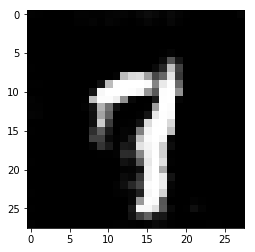

Epoch 1/2... Discriminator Loss: 1.0030... Generator Loss: 1.5374
Epoch 1/2... Discriminator Loss: 0.9302... Generator Loss: 1.4684
Epoch 1/2... Discriminator Loss: 0.6990... Generator Loss: 1.5068
Epoch 1/2... Discriminator Loss: 1.0163... Generator Loss: 0.8031
Epoch 1/2... Discriminator Loss: 1.4940... Generator Loss: 0.4211
Epoch 1/2... Discriminator Loss: 0.8865... Generator Loss: 1.9127
Epoch 1/2... Discriminator Loss: 1.0950... Generator Loss: 1.6206
Epoch 1/2... Discriminator Loss: 1.3891... Generator Loss: 0.5190
Epoch 1/2... Discriminator Loss: 1.5333... Generator Loss: 0.4433
Epoch 1/2... Discriminator Loss: 1.2376... Generator Loss: 1.0783


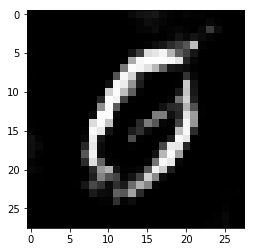

Epoch 1/2... Discriminator Loss: 1.5098... Generator Loss: 0.5196
Epoch 1/2... Discriminator Loss: 1.4639... Generator Loss: 0.3935
Epoch 1/2... Discriminator Loss: 1.0766... Generator Loss: 0.7440
Epoch 1/2... Discriminator Loss: 0.9679... Generator Loss: 0.8270
Epoch 1/2... Discriminator Loss: 1.2099... Generator Loss: 0.6539
Epoch 1/2... Discriminator Loss: 1.6552... Generator Loss: 0.3754
Epoch 1/2... Discriminator Loss: 1.6305... Generator Loss: 0.4124
Epoch 1/2... Discriminator Loss: 1.5274... Generator Loss: 0.4037
Epoch 1/2... Discriminator Loss: 1.3493... Generator Loss: 0.6888
Epoch 1/2... Discriminator Loss: 1.3789... Generator Loss: 0.5375


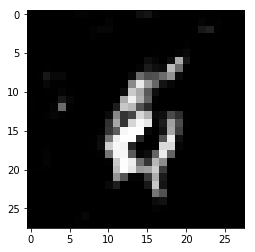

Epoch 1/2... Discriminator Loss: 1.1977... Generator Loss: 2.0642
Epoch 1/2... Discriminator Loss: 1.9415... Generator Loss: 0.2328
Epoch 1/2... Discriminator Loss: 1.1940... Generator Loss: 2.0921
Epoch 1/2... Discriminator Loss: 1.1304... Generator Loss: 0.7130
Epoch 1/2... Discriminator Loss: 1.0754... Generator Loss: 1.7730
Epoch 1/2... Discriminator Loss: 1.0477... Generator Loss: 1.3949
Epoch 1/2... Discriminator Loss: 1.3509... Generator Loss: 0.5494
Epoch 1/2... Discriminator Loss: 1.1620... Generator Loss: 1.6915
Epoch 1/2... Discriminator Loss: 1.6288... Generator Loss: 0.3665
Epoch 1/2... Discriminator Loss: 0.7125... Generator Loss: 1.2999


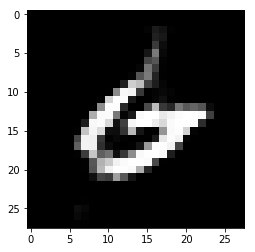

Epoch 1/2... Discriminator Loss: 1.1446... Generator Loss: 1.1568
Epoch 1/2... Discriminator Loss: 1.0350... Generator Loss: 2.1588
Epoch 1/2... Discriminator Loss: 0.7256... Generator Loss: 1.2070
Epoch 1/2... Discriminator Loss: 0.9119... Generator Loss: 1.2004
Epoch 1/2... Discriminator Loss: 1.3197... Generator Loss: 0.6031
Epoch 1/2... Discriminator Loss: 0.9557... Generator Loss: 0.8691
Epoch 1/2... Discriminator Loss: 1.2418... Generator Loss: 0.7860
Epoch 1/2... Discriminator Loss: 1.3059... Generator Loss: 0.6195
Epoch 1/2... Discriminator Loss: 0.5969... Generator Loss: 2.2815
Epoch 1/2... Discriminator Loss: 1.3296... Generator Loss: 0.6275


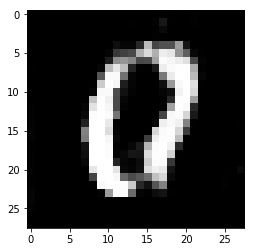

Epoch 1/2... Discriminator Loss: 0.8274... Generator Loss: 1.6521
Epoch 1/2... Discriminator Loss: 1.5246... Generator Loss: 0.4859
Epoch 1/2... Discriminator Loss: 0.8494... Generator Loss: 0.9999
Epoch 1/2... Discriminator Loss: 0.9057... Generator Loss: 0.9225
Epoch 1/2... Discriminator Loss: 0.9428... Generator Loss: 0.9091
Epoch 1/2... Discriminator Loss: 1.9100... Generator Loss: 0.3128
Epoch 1/2... Discriminator Loss: 1.1637... Generator Loss: 0.8553
Epoch 1/2... Discriminator Loss: 1.1928... Generator Loss: 0.6132
Epoch 1/2... Discriminator Loss: 2.2288... Generator Loss: 0.1897
Epoch 1/2... Discriminator Loss: 1.9473... Generator Loss: 0.3384


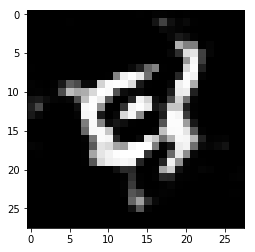

Epoch 1/2... Discriminator Loss: 0.9080... Generator Loss: 1.1735
Epoch 1/2... Discriminator Loss: 1.1559... Generator Loss: 0.6605
Epoch 1/2... Discriminator Loss: 0.9671... Generator Loss: 0.8529
Epoch 1/2... Discriminator Loss: 0.7572... Generator Loss: 1.2479
Epoch 1/2... Discriminator Loss: 1.4029... Generator Loss: 0.4673
Epoch 1/2... Discriminator Loss: 0.9961... Generator Loss: 0.9138
Epoch 1/2... Discriminator Loss: 1.3455... Generator Loss: 1.0596
Epoch 1/2... Discriminator Loss: 1.0257... Generator Loss: 1.5549
Epoch 1/2... Discriminator Loss: 1.3699... Generator Loss: 0.4786
Epoch 1/2... Discriminator Loss: 0.8990... Generator Loss: 1.1649


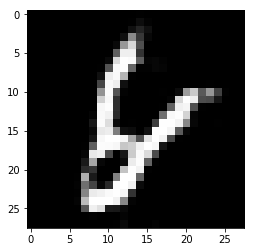

Epoch 1/2... Discriminator Loss: 1.0984... Generator Loss: 0.8229
Epoch 1/2... Discriminator Loss: 0.7807... Generator Loss: 1.9102
Epoch 1/2... Discriminator Loss: 1.7121... Generator Loss: 0.3930
Epoch 1/2... Discriminator Loss: 1.0217... Generator Loss: 1.5884
Epoch 1/2... Discriminator Loss: 0.9278... Generator Loss: 0.9933
Epoch 1/2... Discriminator Loss: 0.7442... Generator Loss: 1.2462
Epoch 1/2... Discriminator Loss: 0.9058... Generator Loss: 0.8976
Epoch 1/2... Discriminator Loss: 1.2922... Generator Loss: 0.5838
Epoch 1/2... Discriminator Loss: 1.7343... Generator Loss: 0.3986
Epoch 1/2... Discriminator Loss: 0.8656... Generator Loss: 0.9906


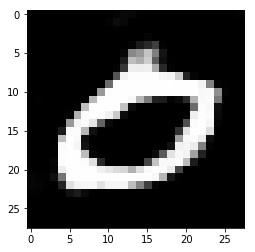

Epoch 1/2... Discriminator Loss: 0.6514... Generator Loss: 1.8496
Epoch 1/2... Discriminator Loss: 0.9280... Generator Loss: 0.8982
Epoch 1/2... Discriminator Loss: 0.8220... Generator Loss: 1.0283
Epoch 1/2... Discriminator Loss: 0.8647... Generator Loss: 1.6846
Epoch 1/2... Discriminator Loss: 0.6113... Generator Loss: 1.8146
Epoch 1/2... Discriminator Loss: 1.8256... Generator Loss: 0.3400
Epoch 1/2... Discriminator Loss: 0.8554... Generator Loss: 1.4983
Epoch 1/2... Discriminator Loss: 0.8333... Generator Loss: 1.0907
Epoch 1/2... Discriminator Loss: 0.8236... Generator Loss: 1.3962
Epoch 1/2... Discriminator Loss: 1.6250... Generator Loss: 0.3549


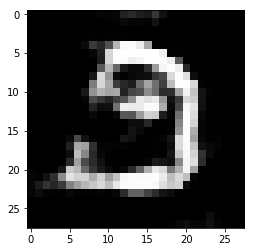

Epoch 1/2... Discriminator Loss: 1.3773... Generator Loss: 0.6134
Epoch 1/2... Discriminator Loss: 1.7375... Generator Loss: 0.2919
Epoch 1/2... Discriminator Loss: 1.1576... Generator Loss: 0.7382
Epoch 1/2... Discriminator Loss: 0.6968... Generator Loss: 1.4914
Epoch 1/2... Discriminator Loss: 0.5728... Generator Loss: 2.5810
Epoch 1/2... Discriminator Loss: 0.9105... Generator Loss: 0.9573
Epoch 1/2... Discriminator Loss: 1.0252... Generator Loss: 0.9863
Epoch 1/2... Discriminator Loss: 0.7317... Generator Loss: 1.4258
Epoch 1/2... Discriminator Loss: 1.7745... Generator Loss: 0.3476
Epoch 1/2... Discriminator Loss: 1.2618... Generator Loss: 0.7442


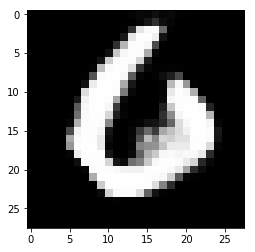

Epoch 1/2... Discriminator Loss: 0.7953... Generator Loss: 1.6127
Epoch 1/2... Discriminator Loss: 0.9255... Generator Loss: 0.9084
Epoch 1/2... Discriminator Loss: 0.8931... Generator Loss: 0.9576
Epoch 1/2... Discriminator Loss: 0.9948... Generator Loss: 0.8903
Epoch 1/2... Discriminator Loss: 1.1184... Generator Loss: 1.6451
Epoch 1/2... Discriminator Loss: 1.0728... Generator Loss: 1.1251
Epoch 1/2... Discriminator Loss: 1.0453... Generator Loss: 0.9492
Epoch 1/2... Discriminator Loss: 1.0674... Generator Loss: 1.7641
Epoch 1/2... Discriminator Loss: 0.9735... Generator Loss: 0.9120
Epoch 1/2... Discriminator Loss: 0.8966... Generator Loss: 1.0974


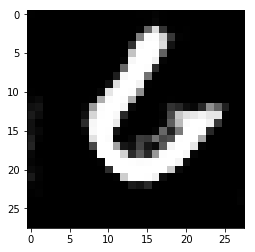

Epoch 1/2... Discriminator Loss: 1.1333... Generator Loss: 0.6531
Epoch 1/2... Discriminator Loss: 1.1399... Generator Loss: 1.1586
Epoch 1/2... Discriminator Loss: 0.6887... Generator Loss: 1.5866
Epoch 1/2... Discriminator Loss: 0.8244... Generator Loss: 1.8645
Epoch 1/2... Discriminator Loss: 0.8314... Generator Loss: 1.7336
Epoch 1/2... Discriminator Loss: 0.6974... Generator Loss: 1.2056
Epoch 1/2... Discriminator Loss: 0.7716... Generator Loss: 1.2098
Epoch 1/2... Discriminator Loss: 1.3736... Generator Loss: 0.9157
Epoch 1/2... Discriminator Loss: 0.8581... Generator Loss: 1.4278
Epoch 1/2... Discriminator Loss: 1.6378... Generator Loss: 0.3818


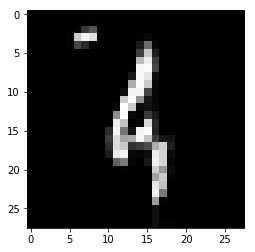

Epoch 1/2... Discriminator Loss: 1.2775... Generator Loss: 0.5376
Epoch 1/2... Discriminator Loss: 1.9703... Generator Loss: 0.2584
Epoch 1/2... Discriminator Loss: 0.7369... Generator Loss: 1.1810
Epoch 1/2... Discriminator Loss: 0.8199... Generator Loss: 1.1295
Epoch 1/2... Discriminator Loss: 1.5554... Generator Loss: 0.4118
Epoch 1/2... Discriminator Loss: 0.8049... Generator Loss: 1.1212
Epoch 1/2... Discriminator Loss: 0.7331... Generator Loss: 1.2531
Epoch 1/2... Discriminator Loss: 0.7834... Generator Loss: 1.2175
Epoch 1/2... Discriminator Loss: 1.3829... Generator Loss: 0.5094
Epoch 1/2... Discriminator Loss: 1.1252... Generator Loss: 0.6389


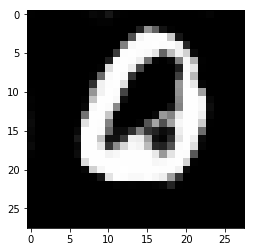

Epoch 1/2... Discriminator Loss: 1.7595... Generator Loss: 0.3015
Epoch 1/2... Discriminator Loss: 0.7246... Generator Loss: 1.3915
Epoch 1/2... Discriminator Loss: 0.8534... Generator Loss: 2.2455
Epoch 1/2... Discriminator Loss: 0.7012... Generator Loss: 1.7427
Epoch 1/2... Discriminator Loss: 0.9502... Generator Loss: 1.8925
Epoch 1/2... Discriminator Loss: 0.8960... Generator Loss: 1.1346
Epoch 1/2... Discriminator Loss: 0.9004... Generator Loss: 1.0669
Epoch 1/2... Discriminator Loss: 0.9528... Generator Loss: 1.0216
Epoch 1/2... Discriminator Loss: 1.0955... Generator Loss: 0.7323
Epoch 1/2... Discriminator Loss: 0.7388... Generator Loss: 1.1861


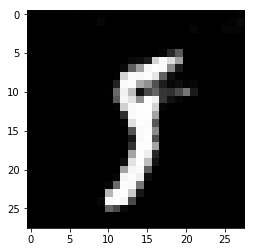

Epoch 1/2... Discriminator Loss: 0.9803... Generator Loss: 1.0018
Epoch 1/2... Discriminator Loss: 1.1152... Generator Loss: 0.7327
Epoch 1/2... Discriminator Loss: 0.5424... Generator Loss: 1.7792
Epoch 1/2... Discriminator Loss: 0.8431... Generator Loss: 1.2435
Epoch 1/2... Discriminator Loss: 0.6168... Generator Loss: 1.8011
Epoch 1/2... Discriminator Loss: 0.7898... Generator Loss: 1.2077
Epoch 1/2... Discriminator Loss: 1.1811... Generator Loss: 0.7278
Epoch 1/2... Discriminator Loss: 0.8357... Generator Loss: 1.5058
Epoch 1/2... Discriminator Loss: 1.0468... Generator Loss: 0.8140
Epoch 1/2... Discriminator Loss: 0.9905... Generator Loss: 1.2222


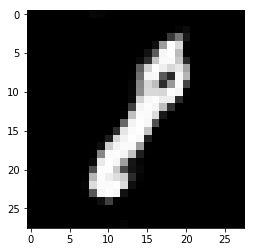

Epoch 1/2... Discriminator Loss: 0.6565... Generator Loss: 1.6164
Epoch 1/2... Discriminator Loss: 0.9564... Generator Loss: 0.8279
Epoch 1/2... Discriminator Loss: 0.9754... Generator Loss: 0.8841
Epoch 1/2... Discriminator Loss: 1.6572... Generator Loss: 0.4845
Epoch 1/2... Discriminator Loss: 0.8981... Generator Loss: 0.8871
Epoch 1/2... Discriminator Loss: 0.7892... Generator Loss: 1.2989
Epoch 1/2... Discriminator Loss: 0.9733... Generator Loss: 0.8923
Epoch 1/2... Discriminator Loss: 0.7610... Generator Loss: 1.5005
Epoch 1/2... Discriminator Loss: 0.9243... Generator Loss: 0.8946
Epoch 1/2... Discriminator Loss: 0.7603... Generator Loss: 1.2849


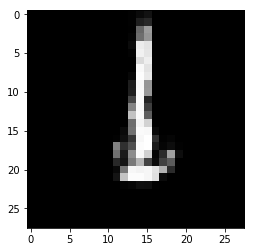

Epoch 1/2... Discriminator Loss: 0.9304... Generator Loss: 1.1203
Epoch 1/2... Discriminator Loss: 3.2032... Generator Loss: 0.0666
Epoch 1/2... Discriminator Loss: 1.1230... Generator Loss: 0.7205
Epoch 1/2... Discriminator Loss: 1.1213... Generator Loss: 0.7045
Epoch 1/2... Discriminator Loss: 1.7730... Generator Loss: 0.4560
Epoch 1/2... Discriminator Loss: 1.1227... Generator Loss: 1.0893
Epoch 1/2... Discriminator Loss: 1.3382... Generator Loss: 1.6487
Epoch 1/2... Discriminator Loss: 0.7179... Generator Loss: 1.5748
Epoch 1/2... Discriminator Loss: 0.9901... Generator Loss: 0.8809
Epoch 1/2... Discriminator Loss: 0.7109... Generator Loss: 1.8475


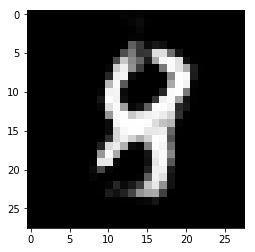

Epoch 1/2... Discriminator Loss: 0.5796... Generator Loss: 1.7584
Epoch 1/2... Discriminator Loss: 1.0101... Generator Loss: 0.8744
Epoch 1/2... Discriminator Loss: 0.5191... Generator Loss: 2.0799
Epoch 1/2... Discriminator Loss: 0.6112... Generator Loss: 1.6823
Epoch 1/2... Discriminator Loss: 0.8248... Generator Loss: 1.0256
Epoch 1/2... Discriminator Loss: 2.3646... Generator Loss: 0.1893
Epoch 1/2... Discriminator Loss: 1.0971... Generator Loss: 0.9823
Epoch 1/2... Discriminator Loss: 0.7997... Generator Loss: 1.0868
Epoch 1/2... Discriminator Loss: 1.0883... Generator Loss: 0.7452
Epoch 1/2... Discriminator Loss: 1.4459... Generator Loss: 0.4711


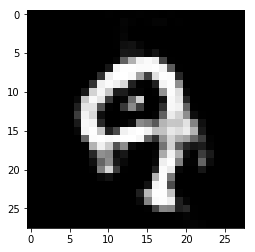

Epoch 1/2... Discriminator Loss: 0.9050... Generator Loss: 0.9356
Epoch 1/2... Discriminator Loss: 1.3914... Generator Loss: 0.6252
Epoch 1/2... Discriminator Loss: 1.2898... Generator Loss: 0.7921
Epoch 1/2... Discriminator Loss: 1.3320... Generator Loss: 0.5069
Epoch 1/2... Discriminator Loss: 0.9912... Generator Loss: 1.0223
Epoch 1/2... Discriminator Loss: 1.6774... Generator Loss: 0.3497
Epoch 1/2... Discriminator Loss: 1.1406... Generator Loss: 0.7102
Epoch 1/2... Discriminator Loss: 1.2187... Generator Loss: 0.6956
Epoch 1/2... Discriminator Loss: 2.0285... Generator Loss: 0.2581
Epoch 1/2... Discriminator Loss: 1.3214... Generator Loss: 2.9059


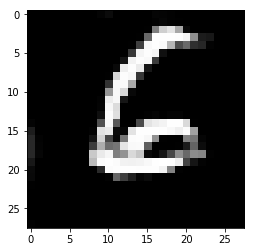

Epoch 1/2... Discriminator Loss: 0.9270... Generator Loss: 1.1129
Epoch 1/2... Discriminator Loss: 1.3812... Generator Loss: 0.4541
Epoch 1/2... Discriminator Loss: 0.9267... Generator Loss: 2.9157
Epoch 1/2... Discriminator Loss: 1.0995... Generator Loss: 0.8536
Epoch 1/2... Discriminator Loss: 1.0570... Generator Loss: 0.6957
Epoch 1/2... Discriminator Loss: 1.6514... Generator Loss: 0.3589
Epoch 1/2... Discriminator Loss: 1.1471... Generator Loss: 0.9369
Epoch 1/2... Discriminator Loss: 0.9461... Generator Loss: 0.8452
Epoch 1/2... Discriminator Loss: 2.1451... Generator Loss: 0.1950
Epoch 1/2... Discriminator Loss: 0.6974... Generator Loss: 1.8280


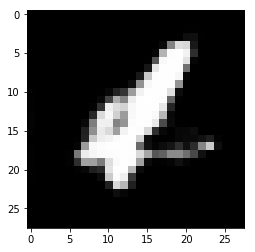

Epoch 1/2... Discriminator Loss: 1.6300... Generator Loss: 0.4647
Epoch 1/2... Discriminator Loss: 0.8373... Generator Loss: 1.0731
Epoch 1/2... Discriminator Loss: 1.0843... Generator Loss: 0.8541
Epoch 1/2... Discriminator Loss: 1.5596... Generator Loss: 0.4249
Epoch 1/2... Discriminator Loss: 0.7070... Generator Loss: 1.8139
Epoch 1/2... Discriminator Loss: 0.7018... Generator Loss: 1.4648
Epoch 1/2... Discriminator Loss: 0.8075... Generator Loss: 1.1372
Epoch 1/2... Discriminator Loss: 1.0651... Generator Loss: 0.9950
Epoch 1/2... Discriminator Loss: 0.7542... Generator Loss: 1.9489
Epoch 1/2... Discriminator Loss: 0.8490... Generator Loss: 1.0922


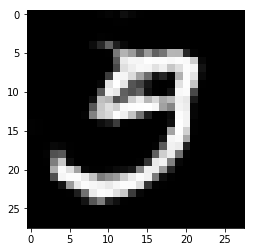

Epoch 1/2... Discriminator Loss: 0.6147... Generator Loss: 1.8206
Epoch 1/2... Discriminator Loss: 0.9806... Generator Loss: 0.9241
Epoch 1/2... Discriminator Loss: 0.6759... Generator Loss: 2.0878
Epoch 1/2... Discriminator Loss: 0.7566... Generator Loss: 1.1043
Epoch 1/2... Discriminator Loss: 0.9110... Generator Loss: 1.4139
Epoch 1/2... Discriminator Loss: 1.2284... Generator Loss: 0.7781
Epoch 1/2... Discriminator Loss: 1.6507... Generator Loss: 0.5518
Epoch 1/2... Discriminator Loss: 0.7588... Generator Loss: 1.3747
Epoch 1/2... Discriminator Loss: 1.4586... Generator Loss: 0.7434
Epoch 1/2... Discriminator Loss: 0.8439... Generator Loss: 1.4134


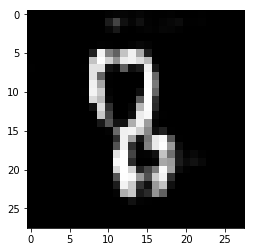

Epoch 1/2... Discriminator Loss: 0.9399... Generator Loss: 0.9219
Epoch 1/2... Discriminator Loss: 0.8075... Generator Loss: 1.5436
Epoch 1/2... Discriminator Loss: 0.6426... Generator Loss: 1.5700
Epoch 1/2... Discriminator Loss: 0.6313... Generator Loss: 2.4007
Epoch 1/2... Discriminator Loss: 0.8386... Generator Loss: 1.1774
Epoch 1/2... Discriminator Loss: 1.5552... Generator Loss: 0.3789
Epoch 1/2... Discriminator Loss: 0.8025... Generator Loss: 1.5192
Epoch 1/2... Discriminator Loss: 1.0662... Generator Loss: 0.9426
Epoch 1/2... Discriminator Loss: 1.1674... Generator Loss: 0.7424
Epoch 1/2... Discriminator Loss: 0.9613... Generator Loss: 0.9275


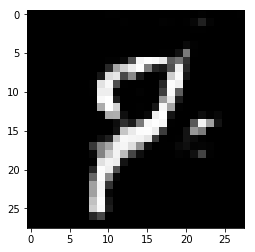

Epoch 1/2... Discriminator Loss: 0.9269... Generator Loss: 1.5279
Epoch 1/2... Discriminator Loss: 0.8321... Generator Loss: 1.2736
Epoch 1/2... Discriminator Loss: 0.8962... Generator Loss: 1.4924
Epoch 1/2... Discriminator Loss: 0.6642... Generator Loss: 1.6236
Epoch 1/2... Discriminator Loss: 0.7167... Generator Loss: 1.4015
Epoch 1/2... Discriminator Loss: 1.0896... Generator Loss: 0.7995
Epoch 1/2... Discriminator Loss: 1.0441... Generator Loss: 0.8129
Epoch 1/2... Discriminator Loss: 0.4647... Generator Loss: 2.6661
Epoch 1/2... Discriminator Loss: 1.5111... Generator Loss: 0.5656
Epoch 1/2... Discriminator Loss: 1.1704... Generator Loss: 0.6191


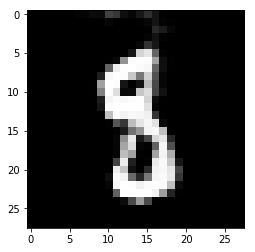

Epoch 1/2... Discriminator Loss: 0.6869... Generator Loss: 1.6921
Epoch 1/2... Discriminator Loss: 0.8245... Generator Loss: 2.2333
Epoch 1/2... Discriminator Loss: 0.6057... Generator Loss: 1.5299
Epoch 1/2... Discriminator Loss: 1.2788... Generator Loss: 0.5909
Epoch 1/2... Discriminator Loss: 0.7554... Generator Loss: 1.2344
Epoch 1/2... Discriminator Loss: 0.9471... Generator Loss: 0.8616
Epoch 1/2... Discriminator Loss: 0.9644... Generator Loss: 1.1043
Epoch 1/2... Discriminator Loss: 0.7689... Generator Loss: 1.5461
Epoch 1/2... Discriminator Loss: 0.8410... Generator Loss: 1.1178
Epoch 1/2... Discriminator Loss: 0.7875... Generator Loss: 1.5813


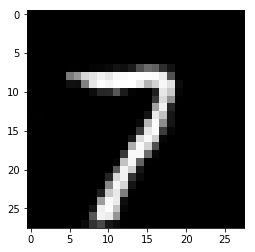

Epoch 1/2... Discriminator Loss: 0.5108... Generator Loss: 2.3444
Epoch 1/2... Discriminator Loss: 1.6867... Generator Loss: 0.4458
Epoch 1/2... Discriminator Loss: 1.0621... Generator Loss: 0.7250
Epoch 1/2... Discriminator Loss: 1.5430... Generator Loss: 0.4170
Epoch 1/2... Discriminator Loss: 0.5953... Generator Loss: 1.6462
Epoch 1/2... Discriminator Loss: 0.4409... Generator Loss: 2.4164
Epoch 1/2... Discriminator Loss: 0.6532... Generator Loss: 1.6458
Epoch 1/2... Discriminator Loss: 0.6970... Generator Loss: 1.4292
Epoch 1/2... Discriminator Loss: 1.0184... Generator Loss: 0.8539
Epoch 1/2... Discriminator Loss: 0.7242... Generator Loss: 1.2311


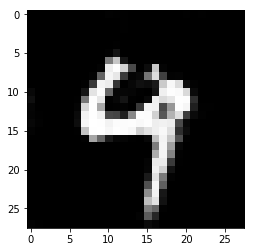

Epoch 1/2... Discriminator Loss: 0.6526... Generator Loss: 1.8360
Epoch 1/2... Discriminator Loss: 0.5456... Generator Loss: 2.0220
Epoch 1/2... Discriminator Loss: 0.8794... Generator Loss: 1.0747
Epoch 1/2... Discriminator Loss: 0.5559... Generator Loss: 2.1550
Epoch 1/2... Discriminator Loss: 0.9549... Generator Loss: 0.9683
Epoch 1/2... Discriminator Loss: 0.5681... Generator Loss: 2.4925
Epoch 1/2... Discriminator Loss: 0.7112... Generator Loss: 1.6076
Epoch 1/2... Discriminator Loss: 0.7717... Generator Loss: 1.2361
Epoch 1/2... Discriminator Loss: 1.5776... Generator Loss: 0.4871
Epoch 1/2... Discriminator Loss: 1.0183... Generator Loss: 1.8556


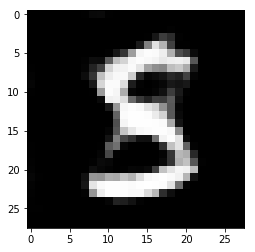

Epoch 1/2... Discriminator Loss: 1.0525... Generator Loss: 1.1267
Epoch 1/2... Discriminator Loss: 1.6693... Generator Loss: 0.3970
Epoch 1/2... Discriminator Loss: 0.6083... Generator Loss: 1.9879
Epoch 1/2... Discriminator Loss: 0.6869... Generator Loss: 1.5479
Epoch 1/2... Discriminator Loss: 0.9952... Generator Loss: 0.9582
Epoch 1/2... Discriminator Loss: 0.6893... Generator Loss: 1.7557
Epoch 1/2... Discriminator Loss: 0.9752... Generator Loss: 0.8819
Epoch 1/2... Discriminator Loss: 0.7783... Generator Loss: 1.3231
Epoch 1/2... Discriminator Loss: 0.8380... Generator Loss: 1.0748
Epoch 1/2... Discriminator Loss: 0.8631... Generator Loss: 0.9844


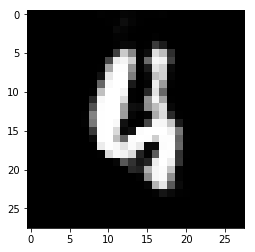

Epoch 1/2... Discriminator Loss: 0.9047... Generator Loss: 0.9330
Epoch 1/2... Discriminator Loss: 1.9315... Generator Loss: 0.3231
Epoch 1/2... Discriminator Loss: 0.5351... Generator Loss: 1.9604
Epoch 1/2... Discriminator Loss: 0.8846... Generator Loss: 1.0883
Epoch 1/2... Discriminator Loss: 1.1042... Generator Loss: 0.9454
Epoch 1/2... Discriminator Loss: 0.7166... Generator Loss: 1.5238
Epoch 1/2... Discriminator Loss: 1.0124... Generator Loss: 0.8790
Epoch 1/2... Discriminator Loss: 1.1529... Generator Loss: 0.7283
Epoch 1/2... Discriminator Loss: 1.2087... Generator Loss: 0.7695
Epoch 1/2... Discriminator Loss: 1.0920... Generator Loss: 0.6961


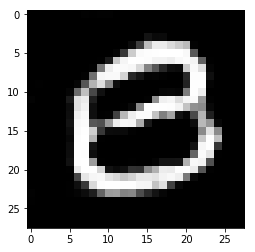

Epoch 1/2... Discriminator Loss: 1.0870... Generator Loss: 0.7611
Epoch 1/2... Discriminator Loss: 1.3115... Generator Loss: 0.5160
Epoch 1/2... Discriminator Loss: 1.2584... Generator Loss: 2.4735
Epoch 1/2... Discriminator Loss: 1.8841... Generator Loss: 0.2871
Epoch 1/2... Discriminator Loss: 0.7180... Generator Loss: 1.5490
Epoch 1/2... Discriminator Loss: 1.2903... Generator Loss: 0.5587
Epoch 1/2... Discriminator Loss: 0.5872... Generator Loss: 1.7287
Epoch 1/2... Discriminator Loss: 0.9838... Generator Loss: 0.8736
Epoch 1/2... Discriminator Loss: 0.6913... Generator Loss: 1.5066
Epoch 1/2... Discriminator Loss: 0.6385... Generator Loss: 1.7846


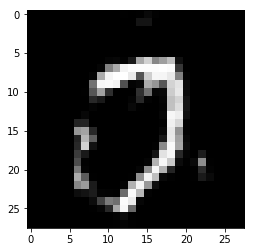

Epoch 1/2... Discriminator Loss: 1.2399... Generator Loss: 0.5797
Epoch 1/2... Discriminator Loss: 0.7188... Generator Loss: 1.3560
Epoch 1/2... Discriminator Loss: 1.0509... Generator Loss: 0.8554
Epoch 1/2... Discriminator Loss: 0.8378... Generator Loss: 1.1290
Epoch 1/2... Discriminator Loss: 0.5978... Generator Loss: 2.1568
Epoch 1/2... Discriminator Loss: 0.8418... Generator Loss: 1.1480
Epoch 1/2... Discriminator Loss: 1.2453... Generator Loss: 0.9911
Epoch 1/2... Discriminator Loss: 1.1770... Generator Loss: 0.6950
Epoch 1/2... Discriminator Loss: 0.5549... Generator Loss: 1.9912
Epoch 1/2... Discriminator Loss: 1.3200... Generator Loss: 0.6104


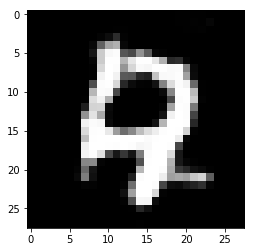

Epoch 1/2... Discriminator Loss: 0.8888... Generator Loss: 1.0510
Epoch 1/2... Discriminator Loss: 2.2429... Generator Loss: 0.2672
Epoch 1/2... Discriminator Loss: 0.9141... Generator Loss: 1.0456
Epoch 1/2... Discriminator Loss: 1.5938... Generator Loss: 0.5516
Epoch 1/2... Discriminator Loss: 0.6883... Generator Loss: 1.5663
Epoch 1/2... Discriminator Loss: 0.5244... Generator Loss: 2.4097
Epoch 1/2... Discriminator Loss: 0.9564... Generator Loss: 1.2004
Epoch 1/2... Discriminator Loss: 0.6886... Generator Loss: 1.8165
Epoch 1/2... Discriminator Loss: 1.4863... Generator Loss: 0.5060
Epoch 1/2... Discriminator Loss: 0.7570... Generator Loss: 1.1734


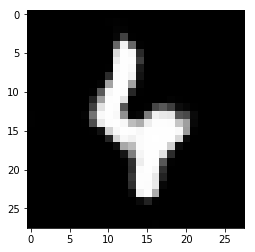

Epoch 1/2... Discriminator Loss: 1.1858... Generator Loss: 0.6217
Epoch 1/2... Discriminator Loss: 0.6973... Generator Loss: 1.4790
Epoch 1/2... Discriminator Loss: 0.9681... Generator Loss: 1.0010
Epoch 1/2... Discriminator Loss: 0.6842... Generator Loss: 1.3834
Epoch 1/2... Discriminator Loss: 0.9317... Generator Loss: 1.1771
Epoch 1/2... Discriminator Loss: 0.7312... Generator Loss: 1.7501
Epoch 1/2... Discriminator Loss: 1.5307... Generator Loss: 0.5464
Epoch 1/2... Discriminator Loss: 1.5395... Generator Loss: 0.4289
Epoch 1/2... Discriminator Loss: 0.8606... Generator Loss: 1.0193
Epoch 1/2... Discriminator Loss: 2.1870... Generator Loss: 0.2324


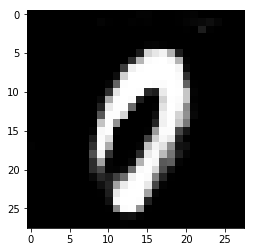

Epoch 1/2... Discriminator Loss: 0.9712... Generator Loss: 0.8725
Epoch 1/2... Discriminator Loss: 0.7869... Generator Loss: 1.3788
Epoch 1/2... Discriminator Loss: 0.8300... Generator Loss: 0.9869
Epoch 1/2... Discriminator Loss: 1.0888... Generator Loss: 0.6997
Epoch 1/2... Discriminator Loss: 1.3318... Generator Loss: 0.5985
Epoch 1/2... Discriminator Loss: 0.4746... Generator Loss: 2.5998
Epoch 1/2... Discriminator Loss: 0.6193... Generator Loss: 1.6229
Epoch 1/2... Discriminator Loss: 0.8319... Generator Loss: 1.4414
Epoch 1/2... Discriminator Loss: 1.4327... Generator Loss: 0.5271
Epoch 1/2... Discriminator Loss: 1.1450... Generator Loss: 0.7443


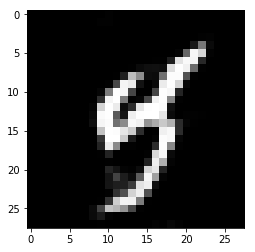

Epoch 1/2... Discriminator Loss: 1.0420... Generator Loss: 0.7112
Epoch 1/2... Discriminator Loss: 0.9155... Generator Loss: 1.9915
Epoch 1/2... Discriminator Loss: 0.7177... Generator Loss: 1.4113
Epoch 1/2... Discriminator Loss: 1.3561... Generator Loss: 0.4831
Epoch 1/2... Discriminator Loss: 0.6010... Generator Loss: 1.7844
Epoch 1/2... Discriminator Loss: 0.8903... Generator Loss: 1.0421
Epoch 1/2... Discriminator Loss: 1.5318... Generator Loss: 0.4799
Epoch 1/2... Discriminator Loss: 1.3393... Generator Loss: 0.6879
Epoch 1/2... Discriminator Loss: 1.1560... Generator Loss: 0.6203
Epoch 1/2... Discriminator Loss: 0.6217... Generator Loss: 1.4539


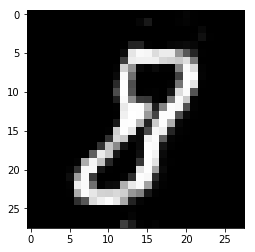

Epoch 1/2... Discriminator Loss: 2.4950... Generator Loss: 0.1521
Epoch 1/2... Discriminator Loss: 0.9845... Generator Loss: 0.8801
Epoch 1/2... Discriminator Loss: 0.8937... Generator Loss: 0.9270
Epoch 1/2... Discriminator Loss: 1.0105... Generator Loss: 0.8370
Epoch 1/2... Discriminator Loss: 2.0830... Generator Loss: 0.2341
Epoch 1/2... Discriminator Loss: 0.6608... Generator Loss: 1.4580
Epoch 1/2... Discriminator Loss: 0.7719... Generator Loss: 1.3519
Epoch 1/2... Discriminator Loss: 0.9845... Generator Loss: 0.9788
Epoch 1/2... Discriminator Loss: 0.9112... Generator Loss: 1.0023
Epoch 1/2... Discriminator Loss: 1.2844... Generator Loss: 0.5518


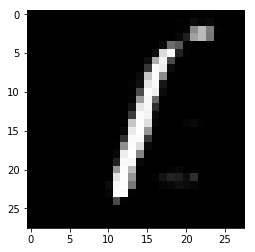

Epoch 1/2... Discriminator Loss: 0.7117... Generator Loss: 2.0606
Epoch 1/2... Discriminator Loss: 0.6961... Generator Loss: 1.5342
Epoch 1/2... Discriminator Loss: 0.7351... Generator Loss: 1.4538
Epoch 1/2... Discriminator Loss: 0.6547... Generator Loss: 1.4758
Epoch 1/2... Discriminator Loss: 1.2015... Generator Loss: 0.8025
Epoch 1/2... Discriminator Loss: 1.4968... Generator Loss: 0.4261
Epoch 1/2... Discriminator Loss: 0.7658... Generator Loss: 1.3582
Epoch 1/2... Discriminator Loss: 0.9547... Generator Loss: 1.0197
Epoch 1/2... Discriminator Loss: 1.4065... Generator Loss: 0.5630
Epoch 1/2... Discriminator Loss: 1.5742... Generator Loss: 0.4017


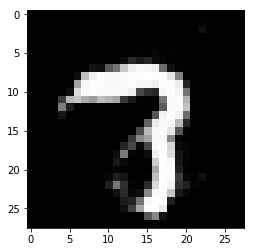

Epoch 1/2... Discriminator Loss: 0.7018... Generator Loss: 1.8991
Epoch 1/2... Discriminator Loss: 0.7821... Generator Loss: 1.4358
Epoch 1/2... Discriminator Loss: 1.4450... Generator Loss: 0.4658
Epoch 1/2... Discriminator Loss: 0.7628... Generator Loss: 1.4896
Epoch 1/2... Discriminator Loss: 1.0358... Generator Loss: 0.8518
Epoch 1/2... Discriminator Loss: 0.7876... Generator Loss: 1.0716
Epoch 1/2... Discriminator Loss: 0.8072... Generator Loss: 1.3976
Epoch 1/2... Discriminator Loss: 0.7729... Generator Loss: 1.1904
Epoch 1/2... Discriminator Loss: 0.9194... Generator Loss: 0.8862
Epoch 1/2... Discriminator Loss: 0.5859... Generator Loss: 1.9855


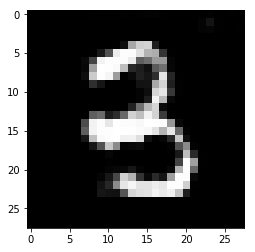

Epoch 1/2... Discriminator Loss: 1.3794... Generator Loss: 0.5068
Epoch 1/2... Discriminator Loss: 0.5784... Generator Loss: 2.3345
Epoch 1/2... Discriminator Loss: 1.2000... Generator Loss: 0.5601
Epoch 1/2... Discriminator Loss: 0.9102... Generator Loss: 1.2349
Epoch 1/2... Discriminator Loss: 0.4820... Generator Loss: 2.2358
Epoch 1/2... Discriminator Loss: 0.5845... Generator Loss: 1.8840
Epoch 1/2... Discriminator Loss: 0.8042... Generator Loss: 1.5673
Epoch 1/2... Discriminator Loss: 0.9226... Generator Loss: 0.9063
Epoch 1/2... Discriminator Loss: 0.9753... Generator Loss: 1.1440
Epoch 1/2... Discriminator Loss: 0.7117... Generator Loss: 1.9561


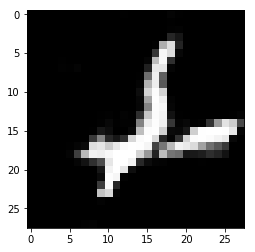

Epoch 1/2... Discriminator Loss: 0.7664... Generator Loss: 1.1857
Epoch 1/2... Discriminator Loss: 0.8088... Generator Loss: 1.1362
Epoch 1/2... Discriminator Loss: 0.6894... Generator Loss: 1.2389
Epoch 1/2... Discriminator Loss: 0.6826... Generator Loss: 1.4179
Epoch 1/2... Discriminator Loss: 0.8380... Generator Loss: 1.0863
Epoch 1/2... Discriminator Loss: 0.5780... Generator Loss: 1.8450
Epoch 1/2... Discriminator Loss: 0.9125... Generator Loss: 0.9524
Epoch 1/2... Discriminator Loss: 0.6338... Generator Loss: 2.4041
Epoch 1/2... Discriminator Loss: 1.4432... Generator Loss: 0.4877
Epoch 1/2... Discriminator Loss: 1.1926... Generator Loss: 0.7568


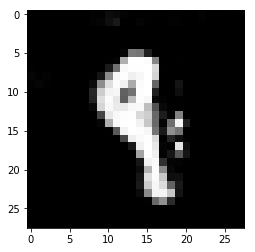

Epoch 1/2... Discriminator Loss: 0.7594... Generator Loss: 1.6432
Epoch 1/2... Discriminator Loss: 0.7460... Generator Loss: 1.6816
Epoch 1/2... Discriminator Loss: 1.7248... Generator Loss: 0.3339
Epoch 1/2... Discriminator Loss: 0.6636... Generator Loss: 1.8970
Epoch 1/2... Discriminator Loss: 0.5420... Generator Loss: 1.8208
Epoch 1/2... Discriminator Loss: 1.0644... Generator Loss: 0.9155
Epoch 1/2... Discriminator Loss: 0.8024... Generator Loss: 1.1469
Epoch 1/2... Discriminator Loss: 1.8315... Generator Loss: 0.3195
Epoch 1/2... Discriminator Loss: 0.7291... Generator Loss: 1.1793
Epoch 1/2... Discriminator Loss: 0.7870... Generator Loss: 1.2455


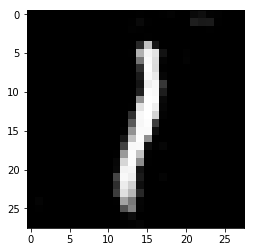

Epoch 2/2... Discriminator Loss: 1.5532... Generator Loss: 0.4778
Epoch 2/2... Discriminator Loss: 0.7520... Generator Loss: 1.1681
Epoch 2/2... Discriminator Loss: 0.7105... Generator Loss: 1.3792
Epoch 2/2... Discriminator Loss: 0.6485... Generator Loss: 1.3694
Epoch 2/2... Discriminator Loss: 1.0059... Generator Loss: 0.7717
Epoch 2/2... Discriminator Loss: 0.9455... Generator Loss: 0.8375
Epoch 2/2... Discriminator Loss: 1.1402... Generator Loss: 0.9707
Epoch 2/2... Discriminator Loss: 0.7766... Generator Loss: 1.5836
Epoch 2/2... Discriminator Loss: 1.0721... Generator Loss: 0.9019
Epoch 2/2... Discriminator Loss: 0.6185... Generator Loss: 1.6239


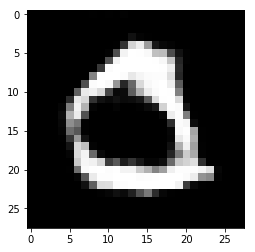

Epoch 2/2... Discriminator Loss: 0.7224... Generator Loss: 2.0629
Epoch 2/2... Discriminator Loss: 0.9233... Generator Loss: 0.9385
Epoch 2/2... Discriminator Loss: 0.6446... Generator Loss: 1.7945
Epoch 2/2... Discriminator Loss: 2.2432... Generator Loss: 0.2072
Epoch 2/2... Discriminator Loss: 0.7478... Generator Loss: 1.9832
Epoch 2/2... Discriminator Loss: 1.1149... Generator Loss: 0.7271
Epoch 2/2... Discriminator Loss: 0.8632... Generator Loss: 1.1126
Epoch 2/2... Discriminator Loss: 1.1889... Generator Loss: 0.9289
Epoch 2/2... Discriminator Loss: 0.9559... Generator Loss: 0.9264
Epoch 2/2... Discriminator Loss: 1.4309... Generator Loss: 0.7732


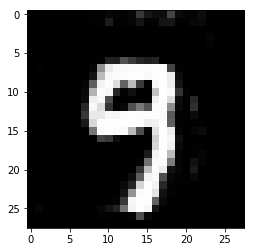

Epoch 2/2... Discriminator Loss: 1.2934... Generator Loss: 0.5912
Epoch 2/2... Discriminator Loss: 0.8148... Generator Loss: 1.3217
Epoch 2/2... Discriminator Loss: 0.6953... Generator Loss: 1.4688
Epoch 2/2... Discriminator Loss: 0.8534... Generator Loss: 1.2087
Epoch 2/2... Discriminator Loss: 0.6096... Generator Loss: 1.7642
Epoch 2/2... Discriminator Loss: 0.5806... Generator Loss: 2.2287
Epoch 2/2... Discriminator Loss: 0.6193... Generator Loss: 1.9597
Epoch 2/2... Discriminator Loss: 1.5817... Generator Loss: 0.3723
Epoch 2/2... Discriminator Loss: 1.2463... Generator Loss: 0.6143
Epoch 2/2... Discriminator Loss: 1.2821... Generator Loss: 0.5744


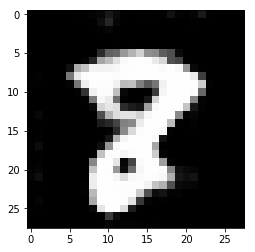

Epoch 2/2... Discriminator Loss: 2.0508... Generator Loss: 0.2958
Epoch 2/2... Discriminator Loss: 1.6045... Generator Loss: 0.4163
Epoch 2/2... Discriminator Loss: 0.8921... Generator Loss: 0.9378
Epoch 2/2... Discriminator Loss: 0.9902... Generator Loss: 2.5453
Epoch 2/2... Discriminator Loss: 1.4588... Generator Loss: 0.4931
Epoch 2/2... Discriminator Loss: 0.7274... Generator Loss: 1.9416
Epoch 2/2... Discriminator Loss: 1.9238... Generator Loss: 0.2668
Epoch 2/2... Discriminator Loss: 0.6194... Generator Loss: 1.5143
Epoch 2/2... Discriminator Loss: 1.3186... Generator Loss: 0.7386
Epoch 2/2... Discriminator Loss: 0.8147... Generator Loss: 1.7917


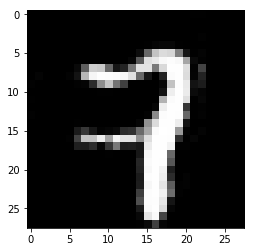

Epoch 2/2... Discriminator Loss: 0.5006... Generator Loss: 2.6691
Epoch 2/2... Discriminator Loss: 1.4699... Generator Loss: 0.5450
Epoch 2/2... Discriminator Loss: 0.6365... Generator Loss: 1.6437
Epoch 2/2... Discriminator Loss: 0.8188... Generator Loss: 1.2128
Epoch 2/2... Discriminator Loss: 0.9128... Generator Loss: 0.9506
Epoch 2/2... Discriminator Loss: 0.6243... Generator Loss: 1.5240
Epoch 2/2... Discriminator Loss: 0.6964... Generator Loss: 1.3638
Epoch 2/2... Discriminator Loss: 0.5921... Generator Loss: 1.6728
Epoch 2/2... Discriminator Loss: 0.5892... Generator Loss: 1.9517
Epoch 2/2... Discriminator Loss: 0.6187... Generator Loss: 1.9024


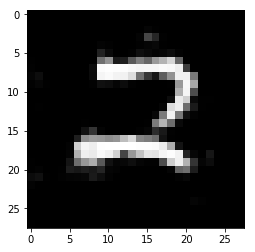

Epoch 2/2... Discriminator Loss: 0.8945... Generator Loss: 1.0790
Epoch 2/2... Discriminator Loss: 0.5850... Generator Loss: 2.0601
Epoch 2/2... Discriminator Loss: 0.6869... Generator Loss: 1.4484
Epoch 2/2... Discriminator Loss: 1.8193... Generator Loss: 0.3615
Epoch 2/2... Discriminator Loss: 0.8877... Generator Loss: 1.3715
Epoch 2/2... Discriminator Loss: 0.8828... Generator Loss: 0.9907
Epoch 2/2... Discriminator Loss: 0.5743... Generator Loss: 1.6314
Epoch 2/2... Discriminator Loss: 0.9125... Generator Loss: 1.2731
Epoch 2/2... Discriminator Loss: 1.0449... Generator Loss: 0.8663
Epoch 2/2... Discriminator Loss: 1.0816... Generator Loss: 1.0089


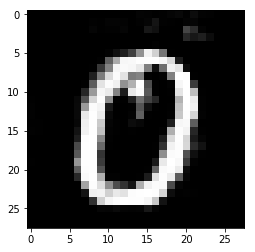

Epoch 2/2... Discriminator Loss: 1.4285... Generator Loss: 0.5777
Epoch 2/2... Discriminator Loss: 1.5280... Generator Loss: 0.4329
Epoch 2/2... Discriminator Loss: 1.0473... Generator Loss: 0.8988
Epoch 2/2... Discriminator Loss: 1.1710... Generator Loss: 0.7145
Epoch 2/2... Discriminator Loss: 1.1890... Generator Loss: 0.7215
Epoch 2/2... Discriminator Loss: 1.2224... Generator Loss: 0.6357
Epoch 2/2... Discriminator Loss: 0.6051... Generator Loss: 1.8802
Epoch 2/2... Discriminator Loss: 0.7618... Generator Loss: 1.3782
Epoch 2/2... Discriminator Loss: 0.5492... Generator Loss: 1.9685
Epoch 2/2... Discriminator Loss: 1.1660... Generator Loss: 0.9035


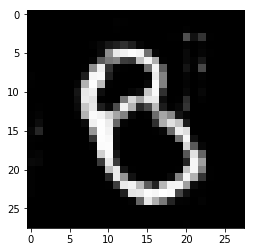

Epoch 2/2... Discriminator Loss: 0.9491... Generator Loss: 1.0587
Epoch 2/2... Discriminator Loss: 1.6118... Generator Loss: 0.4432
Epoch 2/2... Discriminator Loss: 0.7286... Generator Loss: 1.3237
Epoch 2/2... Discriminator Loss: 1.4275... Generator Loss: 0.5543
Epoch 2/2... Discriminator Loss: 0.8035... Generator Loss: 1.2323
Epoch 2/2... Discriminator Loss: 1.2798... Generator Loss: 0.9454
Epoch 2/2... Discriminator Loss: 1.0796... Generator Loss: 0.9554
Epoch 2/2... Discriminator Loss: 0.7636... Generator Loss: 1.4516
Epoch 2/2... Discriminator Loss: 0.7733... Generator Loss: 1.1871
Epoch 2/2... Discriminator Loss: 1.2419... Generator Loss: 0.7715


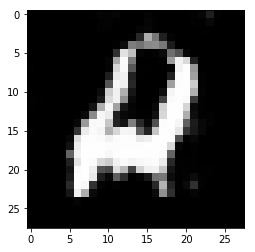

Epoch 2/2... Discriminator Loss: 0.7072... Generator Loss: 1.5789
Epoch 2/2... Discriminator Loss: 0.7899... Generator Loss: 1.3339
Epoch 2/2... Discriminator Loss: 0.5629... Generator Loss: 2.6020
Epoch 2/2... Discriminator Loss: 0.6230... Generator Loss: 1.9654
Epoch 2/2... Discriminator Loss: 0.7842... Generator Loss: 1.2684
Epoch 2/2... Discriminator Loss: 0.7758... Generator Loss: 1.2402
Epoch 2/2... Discriminator Loss: 1.0025... Generator Loss: 0.8183
Epoch 2/2... Discriminator Loss: 0.7172... Generator Loss: 1.2054
Epoch 2/2... Discriminator Loss: 0.5805... Generator Loss: 2.0423
Epoch 2/2... Discriminator Loss: 1.6063... Generator Loss: 0.4203


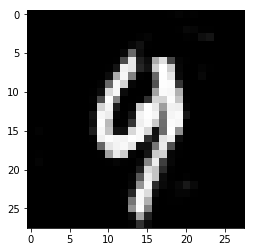

Epoch 2/2... Discriminator Loss: 1.4592... Generator Loss: 0.4674
Epoch 2/2... Discriminator Loss: 0.7106... Generator Loss: 1.6914
Epoch 2/2... Discriminator Loss: 0.9451... Generator Loss: 1.0627
Epoch 2/2... Discriminator Loss: 0.7678... Generator Loss: 1.4718
Epoch 2/2... Discriminator Loss: 0.6537... Generator Loss: 1.8080
Epoch 2/2... Discriminator Loss: 0.5950... Generator Loss: 1.8513
Epoch 2/2... Discriminator Loss: 0.5959... Generator Loss: 3.4920
Epoch 2/2... Discriminator Loss: 0.7248... Generator Loss: 1.4183
Epoch 2/2... Discriminator Loss: 0.8468... Generator Loss: 1.2673
Epoch 2/2... Discriminator Loss: 0.7591... Generator Loss: 1.2995


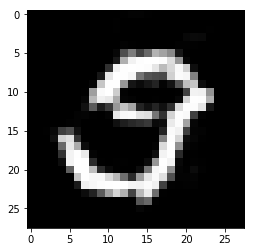

Epoch 2/2... Discriminator Loss: 0.4772... Generator Loss: 2.0723
Epoch 2/2... Discriminator Loss: 1.0325... Generator Loss: 0.8265
Epoch 2/2... Discriminator Loss: 0.7948... Generator Loss: 2.1771
Epoch 2/2... Discriminator Loss: 0.5902... Generator Loss: 1.6044
Epoch 2/2... Discriminator Loss: 0.9723... Generator Loss: 1.0361
Epoch 2/2... Discriminator Loss: 0.6524... Generator Loss: 1.8018
Epoch 2/2... Discriminator Loss: 0.7083... Generator Loss: 1.2822
Epoch 2/2... Discriminator Loss: 0.8017... Generator Loss: 1.3055
Epoch 2/2... Discriminator Loss: 0.8261... Generator Loss: 1.0271
Epoch 2/2... Discriminator Loss: 0.5140... Generator Loss: 2.3616


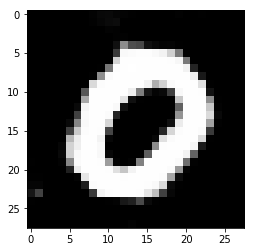

Epoch 2/2... Discriminator Loss: 0.4676... Generator Loss: 2.2370
Epoch 2/2... Discriminator Loss: 1.0998... Generator Loss: 0.7901
Epoch 2/2... Discriminator Loss: 1.1221... Generator Loss: 0.7753
Epoch 2/2... Discriminator Loss: 1.4620... Generator Loss: 1.2118
Epoch 2/2... Discriminator Loss: 2.4705... Generator Loss: 4.9388
Epoch 2/2... Discriminator Loss: 0.9368... Generator Loss: 0.9981
Epoch 2/2... Discriminator Loss: 0.6667... Generator Loss: 1.8416
Epoch 2/2... Discriminator Loss: 0.6979... Generator Loss: 1.6724
Epoch 2/2... Discriminator Loss: 0.8291... Generator Loss: 1.2668
Epoch 2/2... Discriminator Loss: 0.5593... Generator Loss: 1.7975


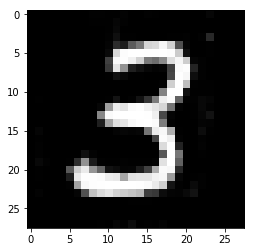

Epoch 2/2... Discriminator Loss: 1.0723... Generator Loss: 0.8002
Epoch 2/2... Discriminator Loss: 1.5300... Generator Loss: 0.7782
Epoch 2/2... Discriminator Loss: 0.9210... Generator Loss: 1.1837
Epoch 2/2... Discriminator Loss: 0.9156... Generator Loss: 0.8425
Epoch 2/2... Discriminator Loss: 0.6133... Generator Loss: 1.9545
Epoch 2/2... Discriminator Loss: 1.0257... Generator Loss: 0.9381
Epoch 2/2... Discriminator Loss: 1.5397... Generator Loss: 0.4164
Epoch 2/2... Discriminator Loss: 0.8934... Generator Loss: 0.9483
Epoch 2/2... Discriminator Loss: 1.1332... Generator Loss: 0.6980
Epoch 2/2... Discriminator Loss: 0.9600... Generator Loss: 0.8560


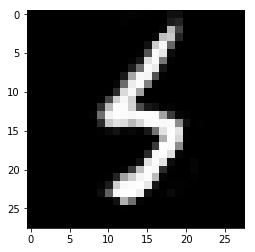

Epoch 2/2... Discriminator Loss: 0.7750... Generator Loss: 1.1829
Epoch 2/2... Discriminator Loss: 1.2406... Generator Loss: 0.7703
Epoch 2/2... Discriminator Loss: 0.5716... Generator Loss: 2.0322
Epoch 2/2... Discriminator Loss: 0.3822... Generator Loss: 3.2468
Epoch 2/2... Discriminator Loss: 0.9828... Generator Loss: 0.9492
Epoch 2/2... Discriminator Loss: 1.4085... Generator Loss: 0.4541
Epoch 2/2... Discriminator Loss: 0.6186... Generator Loss: 1.7921
Epoch 2/2... Discriminator Loss: 1.2026... Generator Loss: 0.6577
Epoch 2/2... Discriminator Loss: 0.8608... Generator Loss: 1.0639
Epoch 2/2... Discriminator Loss: 0.8255... Generator Loss: 1.4468


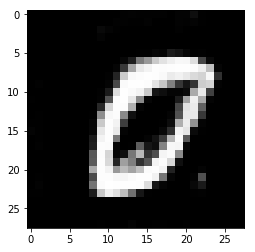

Epoch 2/2... Discriminator Loss: 1.2639... Generator Loss: 0.8184
Epoch 2/2... Discriminator Loss: 0.6992... Generator Loss: 1.2998
Epoch 2/2... Discriminator Loss: 0.9760... Generator Loss: 0.7985
Epoch 2/2... Discriminator Loss: 0.6421... Generator Loss: 1.6960
Epoch 2/2... Discriminator Loss: 0.8168... Generator Loss: 0.9826
Epoch 2/2... Discriminator Loss: 0.8368... Generator Loss: 1.9605
Epoch 2/2... Discriminator Loss: 0.8958... Generator Loss: 1.2770
Epoch 2/2... Discriminator Loss: 0.9499... Generator Loss: 1.1707
Epoch 2/2... Discriminator Loss: 1.3134... Generator Loss: 0.5215
Epoch 2/2... Discriminator Loss: 1.1339... Generator Loss: 0.6309


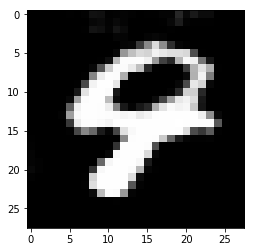

Epoch 2/2... Discriminator Loss: 0.7413... Generator Loss: 2.1785
Epoch 2/2... Discriminator Loss: 1.7236... Generator Loss: 0.4459
Epoch 2/2... Discriminator Loss: 0.7015... Generator Loss: 1.4273
Epoch 2/2... Discriminator Loss: 1.8658... Generator Loss: 0.2991
Epoch 2/2... Discriminator Loss: 0.8466... Generator Loss: 1.1275
Epoch 2/2... Discriminator Loss: 0.7493... Generator Loss: 1.2284
Epoch 2/2... Discriminator Loss: 0.7297... Generator Loss: 1.4078
Epoch 2/2... Discriminator Loss: 0.9594... Generator Loss: 0.9663
Epoch 2/2... Discriminator Loss: 1.2260... Generator Loss: 0.5490
Epoch 2/2... Discriminator Loss: 0.7631... Generator Loss: 1.5649


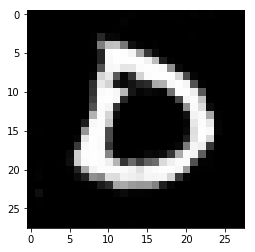

Epoch 2/2... Discriminator Loss: 0.5004... Generator Loss: 1.9908
Epoch 2/2... Discriminator Loss: 1.1170... Generator Loss: 0.8762
Epoch 2/2... Discriminator Loss: 0.5944... Generator Loss: 1.6173
Epoch 2/2... Discriminator Loss: 0.6309... Generator Loss: 1.8690
Epoch 2/2... Discriminator Loss: 0.7064... Generator Loss: 1.4105
Epoch 2/2... Discriminator Loss: 0.6222... Generator Loss: 1.8790
Epoch 2/2... Discriminator Loss: 0.9438... Generator Loss: 1.0378
Epoch 2/2... Discriminator Loss: 0.7110... Generator Loss: 2.3264
Epoch 2/2... Discriminator Loss: 0.7010... Generator Loss: 1.7405
Epoch 2/2... Discriminator Loss: 0.6829... Generator Loss: 1.4509


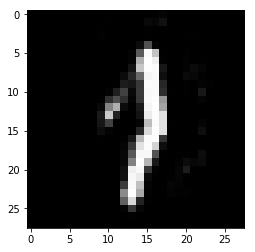

Epoch 2/2... Discriminator Loss: 0.9621... Generator Loss: 0.8065
Epoch 2/2... Discriminator Loss: 0.5651... Generator Loss: 2.1971
Epoch 2/2... Discriminator Loss: 1.0402... Generator Loss: 0.7783
Epoch 2/2... Discriminator Loss: 1.3537... Generator Loss: 0.5851
Epoch 2/2... Discriminator Loss: 1.0796... Generator Loss: 0.8063
Epoch 2/2... Discriminator Loss: 1.5046... Generator Loss: 0.4334
Epoch 2/2... Discriminator Loss: 1.4075... Generator Loss: 0.5834
Epoch 2/2... Discriminator Loss: 1.1257... Generator Loss: 0.7342
Epoch 2/2... Discriminator Loss: 0.7816... Generator Loss: 1.1571
Epoch 2/2... Discriminator Loss: 0.5649... Generator Loss: 1.7579


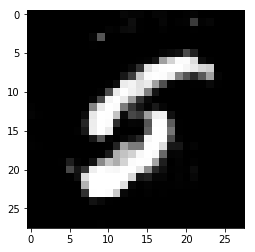

Epoch 2/2... Discriminator Loss: 0.8366... Generator Loss: 1.1259
Epoch 2/2... Discriminator Loss: 0.9662... Generator Loss: 0.8424
Epoch 2/2... Discriminator Loss: 0.7430... Generator Loss: 1.2953
Epoch 2/2... Discriminator Loss: 0.8371... Generator Loss: 1.3090
Epoch 2/2... Discriminator Loss: 0.8219... Generator Loss: 1.1635
Epoch 2/2... Discriminator Loss: 0.8205... Generator Loss: 1.3608
Epoch 2/2... Discriminator Loss: 0.5234... Generator Loss: 1.9196
Epoch 2/2... Discriminator Loss: 1.0688... Generator Loss: 0.8785
Epoch 2/2... Discriminator Loss: 0.5809... Generator Loss: 1.6848
Epoch 2/2... Discriminator Loss: 0.8474... Generator Loss: 1.1600


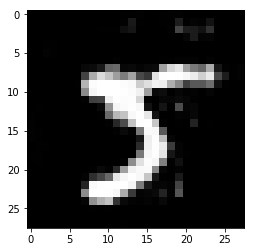

Epoch 2/2... Discriminator Loss: 0.8208... Generator Loss: 1.1552
Epoch 2/2... Discriminator Loss: 0.6806... Generator Loss: 1.6029
Epoch 2/2... Discriminator Loss: 2.5024... Generator Loss: 0.1314
Epoch 2/2... Discriminator Loss: 0.4948... Generator Loss: 2.3896
Epoch 2/2... Discriminator Loss: 1.3547... Generator Loss: 0.6629
Epoch 2/2... Discriminator Loss: 1.2368... Generator Loss: 0.7997
Epoch 2/2... Discriminator Loss: 0.7702... Generator Loss: 1.1791
Epoch 2/2... Discriminator Loss: 1.2348... Generator Loss: 0.6723
Epoch 2/2... Discriminator Loss: 0.5798... Generator Loss: 1.9402
Epoch 2/2... Discriminator Loss: 0.9428... Generator Loss: 0.9800


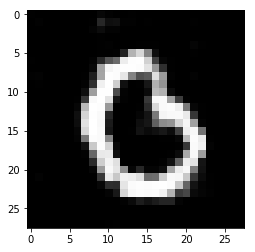

Epoch 2/2... Discriminator Loss: 0.9570... Generator Loss: 0.9426
Epoch 2/2... Discriminator Loss: 1.5118... Generator Loss: 0.4546
Epoch 2/2... Discriminator Loss: 0.8437... Generator Loss: 1.0789
Epoch 2/2... Discriminator Loss: 0.7776... Generator Loss: 1.8395
Epoch 2/2... Discriminator Loss: 0.7847... Generator Loss: 1.3442
Epoch 2/2... Discriminator Loss: 1.0656... Generator Loss: 0.9923
Epoch 2/2... Discriminator Loss: 1.0641... Generator Loss: 0.9930
Epoch 2/2... Discriminator Loss: 1.0267... Generator Loss: 1.0646
Epoch 2/2... Discriminator Loss: 1.1797... Generator Loss: 3.4247
Epoch 2/2... Discriminator Loss: 0.9622... Generator Loss: 0.9848


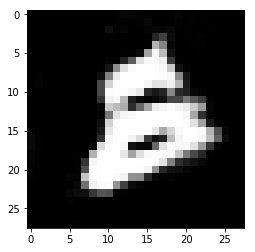

Epoch 2/2... Discriminator Loss: 0.8390... Generator Loss: 2.7595
Epoch 2/2... Discriminator Loss: 0.5716... Generator Loss: 1.9325
Epoch 2/2... Discriminator Loss: 0.8752... Generator Loss: 1.0726
Epoch 2/2... Discriminator Loss: 0.8609... Generator Loss: 1.0110
Epoch 2/2... Discriminator Loss: 0.6696... Generator Loss: 1.4946
Epoch 2/2... Discriminator Loss: 0.5423... Generator Loss: 1.8203
Epoch 2/2... Discriminator Loss: 1.2359... Generator Loss: 0.9233
Epoch 2/2... Discriminator Loss: 0.6751... Generator Loss: 2.0077
Epoch 2/2... Discriminator Loss: 0.7294... Generator Loss: 1.2301
Epoch 2/2... Discriminator Loss: 0.7595... Generator Loss: 1.1673


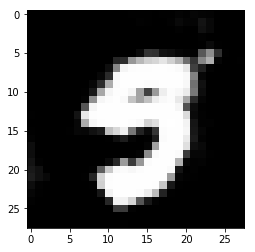

Epoch 2/2... Discriminator Loss: 2.0774... Generator Loss: 0.2670
Epoch 2/2... Discriminator Loss: 0.8817... Generator Loss: 0.9719
Epoch 2/2... Discriminator Loss: 0.7547... Generator Loss: 1.3115
Epoch 2/2... Discriminator Loss: 0.6438... Generator Loss: 2.2352
Epoch 2/2... Discriminator Loss: 0.7081... Generator Loss: 1.7648
Epoch 2/2... Discriminator Loss: 0.7928... Generator Loss: 2.1787
Epoch 2/2... Discriminator Loss: 1.1378... Generator Loss: 1.0057
Epoch 2/2... Discriminator Loss: 0.8936... Generator Loss: 0.9156
Epoch 2/2... Discriminator Loss: 0.3868... Generator Loss: 4.2162
Epoch 2/2... Discriminator Loss: 0.7649... Generator Loss: 1.2059


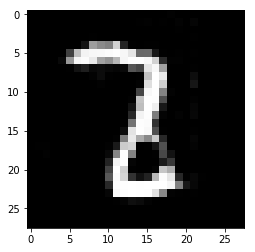

Epoch 2/2... Discriminator Loss: 0.9182... Generator Loss: 1.0059
Epoch 2/2... Discriminator Loss: 0.9031... Generator Loss: 0.9844
Epoch 2/2... Discriminator Loss: 0.5541... Generator Loss: 1.9663
Epoch 2/2... Discriminator Loss: 0.8505... Generator Loss: 1.3312
Epoch 2/2... Discriminator Loss: 0.7051... Generator Loss: 1.3016
Epoch 2/2... Discriminator Loss: 0.6509... Generator Loss: 1.7037
Epoch 2/2... Discriminator Loss: 1.0219... Generator Loss: 0.9879
Epoch 2/2... Discriminator Loss: 1.2727... Generator Loss: 0.6831
Epoch 2/2... Discriminator Loss: 0.9369... Generator Loss: 1.1191
Epoch 2/2... Discriminator Loss: 0.9020... Generator Loss: 1.2124


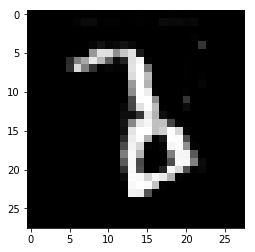

Epoch 2/2... Discriminator Loss: 0.9995... Generator Loss: 1.9719
Epoch 2/2... Discriminator Loss: 0.7229... Generator Loss: 1.2483
Epoch 2/2... Discriminator Loss: 0.9435... Generator Loss: 0.8848
Epoch 2/2... Discriminator Loss: 1.4765... Generator Loss: 0.4968
Epoch 2/2... Discriminator Loss: 0.9063... Generator Loss: 1.2887
Epoch 2/2... Discriminator Loss: 1.5931... Generator Loss: 0.4721
Epoch 2/2... Discriminator Loss: 1.1063... Generator Loss: 0.8257
Epoch 2/2... Discriminator Loss: 0.9767... Generator Loss: 1.9996
Epoch 2/2... Discriminator Loss: 0.8003... Generator Loss: 1.3759
Epoch 2/2... Discriminator Loss: 1.0811... Generator Loss: 0.9055


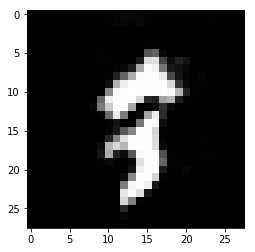

Epoch 2/2... Discriminator Loss: 0.7405... Generator Loss: 1.2680
Epoch 2/2... Discriminator Loss: 0.6889... Generator Loss: 1.3337
Epoch 2/2... Discriminator Loss: 0.5770... Generator Loss: 2.1578
Epoch 2/2... Discriminator Loss: 0.6301... Generator Loss: 1.6729
Epoch 2/2... Discriminator Loss: 0.9958... Generator Loss: 0.7999
Epoch 2/2... Discriminator Loss: 1.0150... Generator Loss: 0.9996
Epoch 2/2... Discriminator Loss: 0.4300... Generator Loss: 2.4898
Epoch 2/2... Discriminator Loss: 0.8764... Generator Loss: 1.0774
Epoch 2/2... Discriminator Loss: 1.2029... Generator Loss: 0.6967
Epoch 2/2... Discriminator Loss: 1.2862... Generator Loss: 0.8022


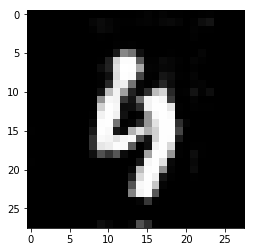

Epoch 2/2... Discriminator Loss: 1.2345... Generator Loss: 0.5809
Epoch 2/2... Discriminator Loss: 0.7323... Generator Loss: 1.4254
Epoch 2/2... Discriminator Loss: 1.6362... Generator Loss: 0.5175
Epoch 2/2... Discriminator Loss: 1.2755... Generator Loss: 0.5516
Epoch 2/2... Discriminator Loss: 0.7463... Generator Loss: 1.2067
Epoch 2/2... Discriminator Loss: 0.8983... Generator Loss: 1.1792
Epoch 2/2... Discriminator Loss: 0.7393... Generator Loss: 1.1589
Epoch 2/2... Discriminator Loss: 1.0537... Generator Loss: 0.8393
Epoch 2/2... Discriminator Loss: 0.7744... Generator Loss: 1.2759
Epoch 2/2... Discriminator Loss: 0.7652... Generator Loss: 1.3904


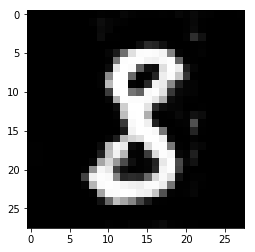

Epoch 2/2... Discriminator Loss: 0.4008... Generator Loss: 2.8518
Epoch 2/2... Discriminator Loss: 0.7215... Generator Loss: 1.2558
Epoch 2/2... Discriminator Loss: 0.8445... Generator Loss: 1.0529
Epoch 2/2... Discriminator Loss: 0.8492... Generator Loss: 1.3217
Epoch 2/2... Discriminator Loss: 0.9192... Generator Loss: 1.0047
Epoch 2/2... Discriminator Loss: 1.2149... Generator Loss: 0.5481
Epoch 2/2... Discriminator Loss: 1.1436... Generator Loss: 0.6438
Epoch 2/2... Discriminator Loss: 0.6386... Generator Loss: 1.6500
Epoch 2/2... Discriminator Loss: 0.6451... Generator Loss: 1.6584
Epoch 2/2... Discriminator Loss: 0.9886... Generator Loss: 0.8280


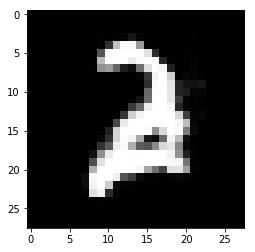

Epoch 2/2... Discriminator Loss: 0.7292... Generator Loss: 1.1524
Epoch 2/2... Discriminator Loss: 1.4966... Generator Loss: 0.5115
Epoch 2/2... Discriminator Loss: 1.2789... Generator Loss: 0.6247
Epoch 2/2... Discriminator Loss: 1.0815... Generator Loss: 0.9861
Epoch 2/2... Discriminator Loss: 0.5054... Generator Loss: 2.1067
Epoch 2/2... Discriminator Loss: 0.8374... Generator Loss: 1.2974
Epoch 2/2... Discriminator Loss: 1.3470... Generator Loss: 0.4957
Epoch 2/2... Discriminator Loss: 1.0467... Generator Loss: 1.1719
Epoch 2/2... Discriminator Loss: 0.8795... Generator Loss: 1.2091
Epoch 2/2... Discriminator Loss: 0.8419... Generator Loss: 1.0238


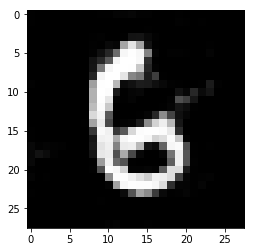

Epoch 2/2... Discriminator Loss: 0.6520... Generator Loss: 1.5619
Epoch 2/2... Discriminator Loss: 1.4908... Generator Loss: 0.5103
Epoch 2/2... Discriminator Loss: 0.5627... Generator Loss: 1.9586
Epoch 2/2... Discriminator Loss: 0.6628... Generator Loss: 1.3762
Epoch 2/2... Discriminator Loss: 0.6037... Generator Loss: 1.6365
Epoch 2/2... Discriminator Loss: 0.8429... Generator Loss: 0.9801
Epoch 2/2... Discriminator Loss: 0.6886... Generator Loss: 1.4708
Epoch 2/2... Discriminator Loss: 0.7668... Generator Loss: 1.8008
Epoch 2/2... Discriminator Loss: 0.7836... Generator Loss: 1.3559
Epoch 2/2... Discriminator Loss: 0.5741... Generator Loss: 1.7103


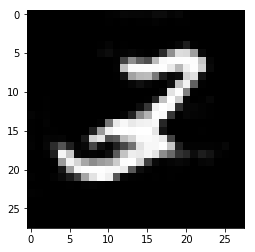

Epoch 2/2... Discriminator Loss: 1.1417... Generator Loss: 0.8460
Epoch 2/2... Discriminator Loss: 0.9253... Generator Loss: 1.0061
Epoch 2/2... Discriminator Loss: 0.5790... Generator Loss: 1.6816
Epoch 2/2... Discriminator Loss: 1.2324... Generator Loss: 0.7739
Epoch 2/2... Discriminator Loss: 0.7445... Generator Loss: 1.3506
Epoch 2/2... Discriminator Loss: 0.7753... Generator Loss: 1.4412
Epoch 2/2... Discriminator Loss: 0.5637... Generator Loss: 2.1846
Epoch 2/2... Discriminator Loss: 0.7202... Generator Loss: 1.3834
Epoch 2/2... Discriminator Loss: 0.7687... Generator Loss: 1.1440
Epoch 2/2... Discriminator Loss: 0.9215... Generator Loss: 0.9057


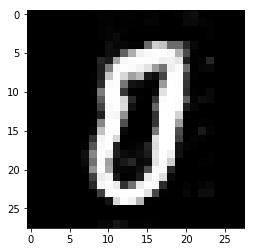

Epoch 2/2... Discriminator Loss: 1.7991... Generator Loss: 0.4629
Epoch 2/2... Discriminator Loss: 1.0973... Generator Loss: 0.7750
Epoch 2/2... Discriminator Loss: 0.8204... Generator Loss: 0.9738
Epoch 2/2... Discriminator Loss: 0.5784... Generator Loss: 1.8764
Epoch 2/2... Discriminator Loss: 0.5079... Generator Loss: 2.1621
Epoch 2/2... Discriminator Loss: 1.0238... Generator Loss: 0.8997
Epoch 2/2... Discriminator Loss: 0.8027... Generator Loss: 1.1308
Epoch 2/2... Discriminator Loss: 1.1271... Generator Loss: 0.8289
Epoch 2/2... Discriminator Loss: 0.7897... Generator Loss: 1.1597
Epoch 2/2... Discriminator Loss: 1.2382... Generator Loss: 0.6652


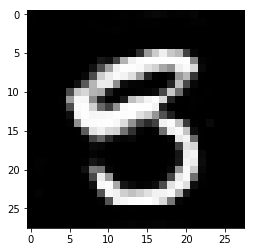

Epoch 2/2... Discriminator Loss: 1.5975... Generator Loss: 0.6462
Epoch 2/2... Discriminator Loss: 1.4607... Generator Loss: 0.4830
Epoch 2/2... Discriminator Loss: 0.4859... Generator Loss: 3.4188
Epoch 2/2... Discriminator Loss: 0.5386... Generator Loss: 2.0041
Epoch 2/2... Discriminator Loss: 1.5208... Generator Loss: 0.4954
Epoch 2/2... Discriminator Loss: 1.1052... Generator Loss: 0.8616
Epoch 2/2... Discriminator Loss: 0.6475... Generator Loss: 1.6037
Epoch 2/2... Discriminator Loss: 0.8148... Generator Loss: 1.2836
Epoch 2/2... Discriminator Loss: 0.8666... Generator Loss: 1.1875
Epoch 2/2... Discriminator Loss: 0.8295... Generator Loss: 2.3177


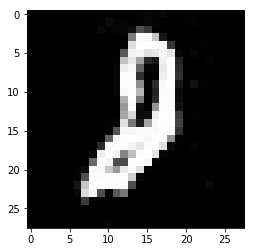

Epoch 2/2... Discriminator Loss: 0.9155... Generator Loss: 0.8926
Epoch 2/2... Discriminator Loss: 1.3119... Generator Loss: 0.5513
Epoch 2/2... Discriminator Loss: 0.7261... Generator Loss: 1.4264
Epoch 2/2... Discriminator Loss: 0.5993... Generator Loss: 1.5675
Epoch 2/2... Discriminator Loss: 0.5776... Generator Loss: 1.8777
Epoch 2/2... Discriminator Loss: 0.8445... Generator Loss: 1.2457
Epoch 2/2... Discriminator Loss: 1.1672... Generator Loss: 0.6744
Epoch 2/2... Discriminator Loss: 0.6701... Generator Loss: 1.5836
Epoch 2/2... Discriminator Loss: 0.5391... Generator Loss: 2.7063
Epoch 2/2... Discriminator Loss: 0.7422... Generator Loss: 2.1286


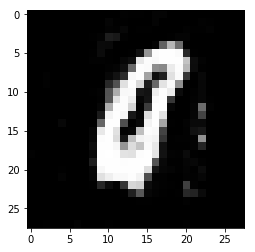

Epoch 2/2... Discriminator Loss: 0.6390... Generator Loss: 1.8329
Epoch 2/2... Discriminator Loss: 0.7501... Generator Loss: 1.2844
Epoch 2/2... Discriminator Loss: 0.6507... Generator Loss: 1.7166
Epoch 2/2... Discriminator Loss: 0.6271... Generator Loss: 1.7888
Epoch 2/2... Discriminator Loss: 1.1625... Generator Loss: 0.6785
Epoch 2/2... Discriminator Loss: 1.6187... Generator Loss: 0.6396
Epoch 2/2... Discriminator Loss: 0.7277... Generator Loss: 1.5336
Epoch 2/2... Discriminator Loss: 0.7131... Generator Loss: 1.4747
Epoch 2/2... Discriminator Loss: 0.6570... Generator Loss: 1.6649
Epoch 2/2... Discriminator Loss: 0.8309... Generator Loss: 1.1524


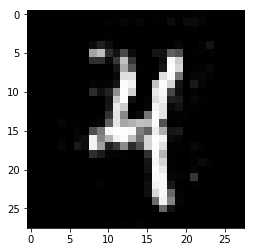

Epoch 2/2... Discriminator Loss: 0.7734... Generator Loss: 1.1854
Epoch 2/2... Discriminator Loss: 1.0299... Generator Loss: 0.7218
Epoch 2/2... Discriminator Loss: 1.1603... Generator Loss: 0.6107
Epoch 2/2... Discriminator Loss: 1.0323... Generator Loss: 0.7929
Epoch 2/2... Discriminator Loss: 2.4087... Generator Loss: 0.1897
Epoch 2/2... Discriminator Loss: 0.6919... Generator Loss: 1.7739
Epoch 2/2... Discriminator Loss: 0.9319... Generator Loss: 1.0419
Epoch 2/2... Discriminator Loss: 0.7092... Generator Loss: 1.3125
Epoch 2/2... Discriminator Loss: 0.8279... Generator Loss: 1.3556
Epoch 2/2... Discriminator Loss: 0.4444... Generator Loss: 2.6650


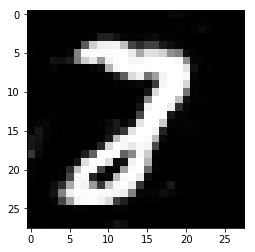

Epoch 2/2... Discriminator Loss: 0.6494... Generator Loss: 1.4267
Epoch 2/2... Discriminator Loss: 1.3372... Generator Loss: 0.6018
Epoch 2/2... Discriminator Loss: 0.5545... Generator Loss: 2.1983
Epoch 2/2... Discriminator Loss: 1.3502... Generator Loss: 3.3089
Epoch 2/2... Discriminator Loss: 0.8118... Generator Loss: 1.1496
Epoch 2/2... Discriminator Loss: 1.4861... Generator Loss: 0.6375
Epoch 2/2... Discriminator Loss: 0.5276... Generator Loss: 2.9154
Epoch 2/2... Discriminator Loss: 0.6527... Generator Loss: 1.8583
Epoch 2/2... Discriminator Loss: 0.7907... Generator Loss: 1.2338
Epoch 2/2... Discriminator Loss: 0.5890... Generator Loss: 1.7734


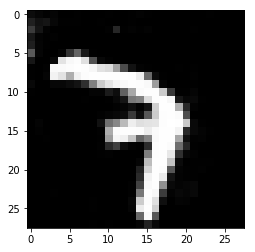

Epoch 2/2... Discriminator Loss: 0.7234... Generator Loss: 1.6607
Epoch 2/2... Discriminator Loss: 0.7278... Generator Loss: 1.5516
Epoch 2/2... Discriminator Loss: 0.4681... Generator Loss: 2.5442
Epoch 2/2... Discriminator Loss: 0.8700... Generator Loss: 1.1746
Epoch 2/2... Discriminator Loss: 0.6645... Generator Loss: 1.7839
Epoch 2/2... Discriminator Loss: 0.7726... Generator Loss: 1.5001
Epoch 2/2... Discriminator Loss: 0.6229... Generator Loss: 1.5052
Epoch 2/2... Discriminator Loss: 0.5763... Generator Loss: 1.6572
Epoch 2/2... Discriminator Loss: 0.6125... Generator Loss: 1.6615
Epoch 2/2... Discriminator Loss: 0.8871... Generator Loss: 1.2740


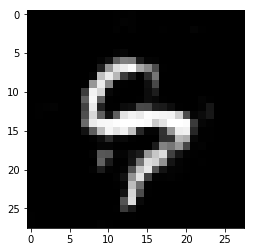

Epoch 2/2... Discriminator Loss: 1.4294... Generator Loss: 3.1116
Epoch 2/2... Discriminator Loss: 1.4431... Generator Loss: 0.4364
Epoch 2/2... Discriminator Loss: 0.9073... Generator Loss: 0.8678
Epoch 2/2... Discriminator Loss: 0.9606... Generator Loss: 0.8595
Epoch 2/2... Discriminator Loss: 0.6105... Generator Loss: 2.4097
Epoch 2/2... Discriminator Loss: 1.0559... Generator Loss: 0.7006
Epoch 2/2... Discriminator Loss: 0.6711... Generator Loss: 1.5151
Epoch 2/2... Discriminator Loss: 0.6041... Generator Loss: 2.0660
Epoch 2/2... Discriminator Loss: 0.7025... Generator Loss: 1.5255
Epoch 2/2... Discriminator Loss: 0.5723... Generator Loss: 1.8059


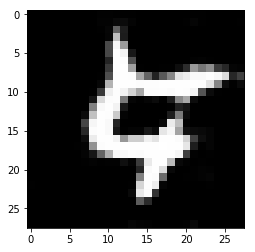

Epoch 2/2... Discriminator Loss: 1.0659... Generator Loss: 0.8112
Epoch 2/2... Discriminator Loss: 0.9982... Generator Loss: 2.3998
Epoch 2/2... Discriminator Loss: 1.0096... Generator Loss: 0.8084
Epoch 2/2... Discriminator Loss: 1.9102... Generator Loss: 0.2998
Epoch 2/2... Discriminator Loss: 1.2329... Generator Loss: 0.6133
Epoch 2/2... Discriminator Loss: 0.7202... Generator Loss: 1.2840
Epoch 2/2... Discriminator Loss: 0.5576... Generator Loss: 2.3302
Epoch 2/2... Discriminator Loss: 0.5336... Generator Loss: 1.9082
Epoch 2/2... Discriminator Loss: 0.9531... Generator Loss: 0.8745
Epoch 2/2... Discriminator Loss: 0.6165... Generator Loss: 1.5192


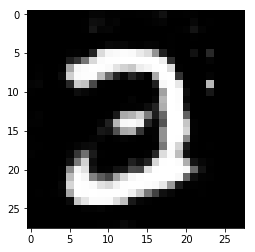

Epoch 2/2... Discriminator Loss: 0.8929... Generator Loss: 1.0700
Epoch 2/2... Discriminator Loss: 0.9330... Generator Loss: 0.8998
Epoch 2/2... Discriminator Loss: 0.8397... Generator Loss: 1.0001
Epoch 2/2... Discriminator Loss: 0.7018... Generator Loss: 1.7161
Epoch 2/2... Discriminator Loss: 1.4071... Generator Loss: 0.5101
Epoch 2/2... Discriminator Loss: 1.5487... Generator Loss: 0.4316
Epoch 2/2... Discriminator Loss: 0.7585... Generator Loss: 1.1114
Epoch 2/2... Discriminator Loss: 0.6783... Generator Loss: 1.9728
Epoch 2/2... Discriminator Loss: 0.5289... Generator Loss: 1.9467
Epoch 2/2... Discriminator Loss: 0.7895... Generator Loss: 1.1074


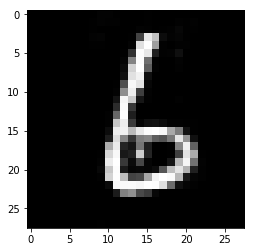

Epoch 2/2... Discriminator Loss: 0.6226... Generator Loss: 1.5966
Epoch 2/2... Discriminator Loss: 0.7521... Generator Loss: 1.2520
Epoch 2/2... Discriminator Loss: 0.8853... Generator Loss: 1.2516
Epoch 2/2... Discriminator Loss: 0.7034... Generator Loss: 1.6643
Epoch 2/2... Discriminator Loss: 1.8177... Generator Loss: 0.4218
Epoch 2/2... Discriminator Loss: 0.9894... Generator Loss: 0.9990
Epoch 2/2... Discriminator Loss: 0.8776... Generator Loss: 1.3239
Epoch 2/2... Discriminator Loss: 0.6608... Generator Loss: 1.7116
Epoch 2/2... Discriminator Loss: 1.3613... Generator Loss: 0.6800
Epoch 2/2... Discriminator Loss: 0.9097... Generator Loss: 1.0443


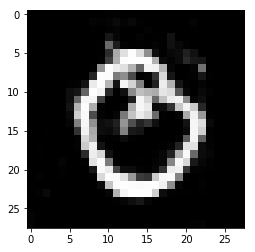

Epoch 2/2... Discriminator Loss: 0.9287... Generator Loss: 2.8083
Epoch 2/2... Discriminator Loss: 0.7643... Generator Loss: 1.3988
Epoch 2/2... Discriminator Loss: 0.8190... Generator Loss: 1.1064
Epoch 2/2... Discriminator Loss: 0.7197... Generator Loss: 1.6246
Epoch 2/2... Discriminator Loss: 0.8343... Generator Loss: 1.4819
Epoch 2/2... Discriminator Loss: 1.0437... Generator Loss: 0.8483
Epoch 2/2... Discriminator Loss: 1.0378... Generator Loss: 0.8515
Epoch 2/2... Discriminator Loss: 1.0939... Generator Loss: 0.9767
Epoch 2/2... Discriminator Loss: 0.5928... Generator Loss: 1.7383
Epoch 2/2... Discriminator Loss: 1.5190... Generator Loss: 0.4146


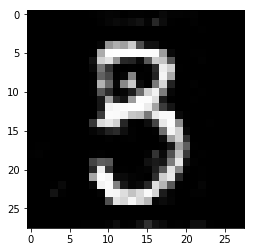

Epoch 2/2... Discriminator Loss: 1.2616... Generator Loss: 0.6049
Epoch 2/2... Discriminator Loss: 0.8816... Generator Loss: 1.2384
Epoch 2/2... Discriminator Loss: 0.5558... Generator Loss: 2.0017
Epoch 2/2... Discriminator Loss: 0.6838... Generator Loss: 1.4156
Epoch 2/2... Discriminator Loss: 1.3267... Generator Loss: 0.5317
Epoch 2/2... Discriminator Loss: 1.1245... Generator Loss: 0.7451
Epoch 2/2... Discriminator Loss: 1.1460... Generator Loss: 0.6113
Epoch 2/2... Discriminator Loss: 1.2487... Generator Loss: 0.6825
Epoch 2/2... Discriminator Loss: 1.0698... Generator Loss: 0.7706
Epoch 2/2... Discriminator Loss: 0.9734... Generator Loss: 0.9324


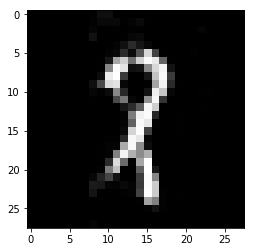

Epoch 2/2... Discriminator Loss: 0.6228... Generator Loss: 1.7781
Epoch 2/2... Discriminator Loss: 0.7462... Generator Loss: 1.3321
Epoch 2/2... Discriminator Loss: 0.5864... Generator Loss: 2.1250
Epoch 2/2... Discriminator Loss: 1.0243... Generator Loss: 0.8091
Epoch 2/2... Discriminator Loss: 0.6337... Generator Loss: 1.5205
Epoch 2/2... Discriminator Loss: 0.8554... Generator Loss: 1.0078
Epoch 2/2... Discriminator Loss: 0.6210... Generator Loss: 1.5238
Epoch 2/2... Discriminator Loss: 1.0914... Generator Loss: 0.6621
Epoch 2/2... Discriminator Loss: 0.6279... Generator Loss: 1.7077
Epoch 2/2... Discriminator Loss: 1.3765... Generator Loss: 0.5433


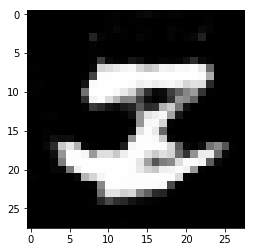

Epoch 2/2... Discriminator Loss: 0.4437... Generator Loss: 2.7649
Epoch 2/2... Discriminator Loss: 0.5247... Generator Loss: 2.0659
Epoch 2/2... Discriminator Loss: 0.7088... Generator Loss: 1.5156
Epoch 2/2... Discriminator Loss: 0.6919... Generator Loss: 1.4770
Epoch 2/2... Discriminator Loss: 0.6365... Generator Loss: 1.7012
Epoch 2/2... Discriminator Loss: 0.6161... Generator Loss: 1.7248
Epoch 2/2... Discriminator Loss: 1.2002... Generator Loss: 0.6669
Epoch 2/2... Discriminator Loss: 0.8978... Generator Loss: 1.8934
Epoch 2/2... Discriminator Loss: 0.9055... Generator Loss: 1.0413
Epoch 2/2... Discriminator Loss: 1.3662... Generator Loss: 0.4880


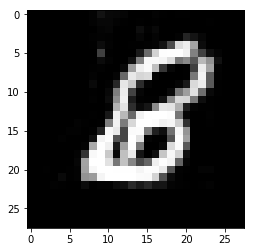

Epoch 2/2... Discriminator Loss: 0.7844... Generator Loss: 1.1684
Epoch 2/2... Discriminator Loss: 0.6434... Generator Loss: 1.5451
Epoch 2/2... Discriminator Loss: 0.5158... Generator Loss: 1.8784
Epoch 2/2... Discriminator Loss: 0.8663... Generator Loss: 1.3035
Epoch 2/2... Discriminator Loss: 1.4690... Generator Loss: 0.4729
Epoch 2/2... Discriminator Loss: 0.6888... Generator Loss: 1.8653
Epoch 2/2... Discriminator Loss: 0.7615... Generator Loss: 1.3543
Epoch 2/2... Discriminator Loss: 0.7598... Generator Loss: 1.7098
Epoch 2/2... Discriminator Loss: 0.8091... Generator Loss: 1.4041
Epoch 2/2... Discriminator Loss: 0.5382... Generator Loss: 1.9048


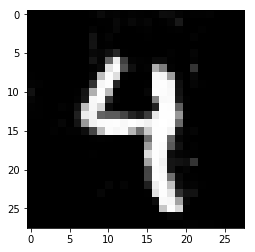

Epoch 2/2... Discriminator Loss: 0.7135... Generator Loss: 1.7653
Epoch 2/2... Discriminator Loss: 1.2094... Generator Loss: 0.9346
Epoch 2/2... Discriminator Loss: 0.6435... Generator Loss: 2.0032
Epoch 2/2... Discriminator Loss: 0.7050... Generator Loss: 1.3017
Epoch 2/2... Discriminator Loss: 0.8521... Generator Loss: 3.1862
Epoch 2/2... Discriminator Loss: 0.7557... Generator Loss: 2.1135
Epoch 2/2... Discriminator Loss: 0.8744... Generator Loss: 1.1235
Epoch 2/2... Discriminator Loss: 0.8752... Generator Loss: 1.0022
Epoch 2/2... Discriminator Loss: 0.7596... Generator Loss: 1.3997
Epoch 2/2... Discriminator Loss: 0.7798... Generator Loss: 1.0736


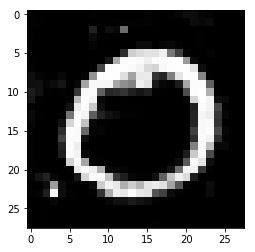

Epoch 2/2... Discriminator Loss: 1.3068... Generator Loss: 0.6172
Epoch 2/2... Discriminator Loss: 0.6542... Generator Loss: 1.9516
Epoch 2/2... Discriminator Loss: 0.7653... Generator Loss: 1.1611
Epoch 2/2... Discriminator Loss: 0.6974... Generator Loss: 1.5646
Epoch 2/2... Discriminator Loss: 0.7139... Generator Loss: 1.3166
Epoch 2/2... Discriminator Loss: 1.1743... Generator Loss: 0.5980
Epoch 2/2... Discriminator Loss: 0.7461... Generator Loss: 1.5283
Epoch 2/2... Discriminator Loss: 0.6403... Generator Loss: 1.4465
Epoch 2/2... Discriminator Loss: 0.7623... Generator Loss: 1.3827
Epoch 2/2... Discriminator Loss: 0.4752... Generator Loss: 2.4740


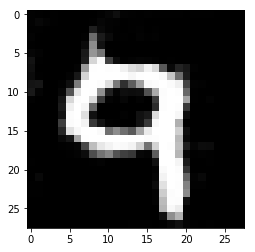

Epoch 2/2... Discriminator Loss: 0.7446... Generator Loss: 1.4698
Epoch 2/2... Discriminator Loss: 1.0987... Generator Loss: 0.6907
Epoch 2/2... Discriminator Loss: 1.3059... Generator Loss: 0.6813
Epoch 2/2... Discriminator Loss: 0.9121... Generator Loss: 1.1129
Epoch 2/2... Discriminator Loss: 0.4852... Generator Loss: 2.2655
Epoch 2/2... Discriminator Loss: 1.5385... Generator Loss: 0.5644
Epoch 2/2... Discriminator Loss: 0.8620... Generator Loss: 1.0345
Epoch 2/2... Discriminator Loss: 1.3522... Generator Loss: 0.5660
Epoch 2/2... Discriminator Loss: 0.5328... Generator Loss: 2.1806
Epoch 2/2... Discriminator Loss: 1.2262... Generator Loss: 0.7524


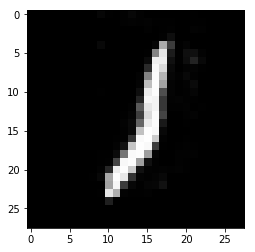

Epoch 2/2... Discriminator Loss: 1.6677... Generator Loss: 0.4628
Epoch 2/2... Discriminator Loss: 0.7323... Generator Loss: 1.8686
Epoch 2/2... Discriminator Loss: 0.6291... Generator Loss: 1.4765
Epoch 2/2... Discriminator Loss: 0.8121... Generator Loss: 1.4487
Epoch 2/2... Discriminator Loss: 0.6838... Generator Loss: 1.3684
Epoch 2/2... Discriminator Loss: 1.0272... Generator Loss: 1.3876
Epoch 2/2... Discriminator Loss: 0.9530... Generator Loss: 1.3172
Epoch 2/2... Discriminator Loss: 0.9179... Generator Loss: 0.9004
Epoch 2/2... Discriminator Loss: 1.6147... Generator Loss: 0.4897
Epoch 2/2... Discriminator Loss: 0.5885... Generator Loss: 1.6886


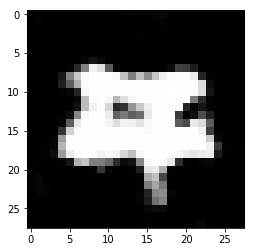

Epoch 2/2... Discriminator Loss: 0.8837... Generator Loss: 0.8972
Epoch 2/2... Discriminator Loss: 1.3644... Generator Loss: 3.1887
Epoch 2/2... Discriminator Loss: 1.1630... Generator Loss: 0.6266
Epoch 2/2... Discriminator Loss: 0.9147... Generator Loss: 0.9533
Epoch 2/2... Discriminator Loss: 0.5081... Generator Loss: 2.1091
Epoch 2/2... Discriminator Loss: 0.4753... Generator Loss: 2.4782
Epoch 2/2... Discriminator Loss: 0.7620... Generator Loss: 1.3856
Epoch 2/2... Discriminator Loss: 1.4426... Generator Loss: 0.6547
Epoch 2/2... Discriminator Loss: 1.1298... Generator Loss: 0.7666
Epoch 2/2... Discriminator Loss: 1.6175... Generator Loss: 0.4738


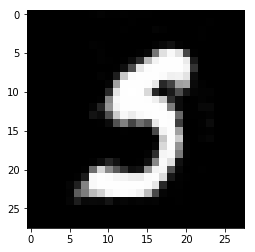

Epoch 2/2... Discriminator Loss: 0.8306... Generator Loss: 1.2125
Epoch 2/2... Discriminator Loss: 0.6013... Generator Loss: 1.7240
Epoch 2/2... Discriminator Loss: 0.7616... Generator Loss: 1.2495
Epoch 2/2... Discriminator Loss: 1.1410... Generator Loss: 0.6743
Epoch 2/2... Discriminator Loss: 1.2261... Generator Loss: 0.8554
Epoch 2/2... Discriminator Loss: 0.8488... Generator Loss: 1.4097
Epoch 2/2... Discriminator Loss: 0.7289... Generator Loss: 1.6462
Epoch 2/2... Discriminator Loss: 0.7895... Generator Loss: 1.2164
Epoch 2/2... Discriminator Loss: 0.6486... Generator Loss: 1.7343
Epoch 2/2... Discriminator Loss: 0.6044... Generator Loss: 2.5231


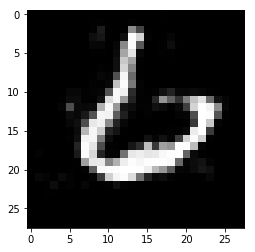

Epoch 2/2... Discriminator Loss: 0.5236... Generator Loss: 1.8771
Epoch 2/2... Discriminator Loss: 0.6922... Generator Loss: 1.4790
Epoch 2/2... Discriminator Loss: 0.7524... Generator Loss: 1.5295
Epoch 2/2... Discriminator Loss: 1.2657... Generator Loss: 0.6826
Epoch 2/2... Discriminator Loss: 0.7818... Generator Loss: 1.2005
Epoch 2/2... Discriminator Loss: 0.5529... Generator Loss: 1.9580
Epoch 2/2... Discriminator Loss: 1.0168... Generator Loss: 0.8560
Epoch 2/2... Discriminator Loss: 0.7225... Generator Loss: 1.4906
Epoch 2/2... Discriminator Loss: 0.7661... Generator Loss: 1.3929
Epoch 2/2... Discriminator Loss: 1.2047... Generator Loss: 0.5664


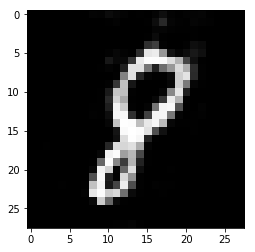

Epoch 2/2... Discriminator Loss: 0.8801... Generator Loss: 1.0179
Epoch 2/2... Discriminator Loss: 1.2882... Generator Loss: 0.7913
Epoch 2/2... Discriminator Loss: 1.8166... Generator Loss: 0.2803
Epoch 2/2... Discriminator Loss: 1.1594... Generator Loss: 0.8341
Epoch 2/2... Discriminator Loss: 1.7508... Generator Loss: 0.5130
Epoch 2/2... Discriminator Loss: 0.9093... Generator Loss: 1.3837
Epoch 2/2... Discriminator Loss: 1.0136... Generator Loss: 1.1363
Epoch 2/2... Discriminator Loss: 1.5815... Generator Loss: 0.3664
Epoch 2/2... Discriminator Loss: 0.8278... Generator Loss: 1.4216
Epoch 2/2... Discriminator Loss: 0.6793... Generator Loss: 1.3661


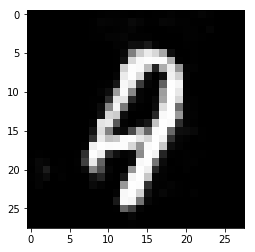

Epoch 2/2... Discriminator Loss: 0.8769... Generator Loss: 1.0261
Epoch 2/2... Discriminator Loss: 0.7614... Generator Loss: 1.3598
Epoch 2/2... Discriminator Loss: 1.1688... Generator Loss: 0.6926
Epoch 2/2... Discriminator Loss: 1.4329... Generator Loss: 0.5206
Epoch 2/2... Discriminator Loss: 0.5495... Generator Loss: 1.8282
Epoch 2/2... Discriminator Loss: 0.9147... Generator Loss: 0.8618
Epoch 2/2... Discriminator Loss: 0.7133... Generator Loss: 1.5804
Epoch 2/2... Discriminator Loss: 0.7641... Generator Loss: 1.5377
Epoch 2/2... Discriminator Loss: 1.0149... Generator Loss: 3.0970
Epoch 2/2... Discriminator Loss: 1.1515... Generator Loss: 0.8332


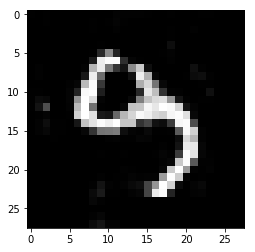

Epoch 2/2... Discriminator Loss: 0.6889... Generator Loss: 1.4636
Epoch 2/2... Discriminator Loss: 0.4317... Generator Loss: 3.6035
Epoch 2/2... Discriminator Loss: 1.8458... Generator Loss: 0.2980
Epoch 2/2... Discriminator Loss: 0.5681... Generator Loss: 2.0300
Epoch 2/2... Discriminator Loss: 1.2390... Generator Loss: 0.6269
Epoch 2/2... Discriminator Loss: 1.0109... Generator Loss: 1.3807
Epoch 2/2... Discriminator Loss: 1.3738... Generator Loss: 0.5161
Epoch 2/2... Discriminator Loss: 0.9627... Generator Loss: 0.8731
Epoch 2/2... Discriminator Loss: 0.6921... Generator Loss: 1.5922
Epoch 2/2... Discriminator Loss: 0.9494... Generator Loss: 2.8943


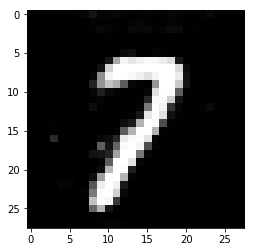

Epoch 2/2... Discriminator Loss: 0.3928... Generator Loss: 3.5800
Epoch 2/2... Discriminator Loss: 0.7794... Generator Loss: 1.4020
Epoch 2/2... Discriminator Loss: 1.0395... Generator Loss: 0.8488
Epoch 2/2... Discriminator Loss: 1.4108... Generator Loss: 0.6399
Epoch 2/2... Discriminator Loss: 0.7366... Generator Loss: 1.2661
Epoch 2/2... Discriminator Loss: 0.4821... Generator Loss: 2.2236
Epoch 2/2... Discriminator Loss: 0.5582... Generator Loss: 1.7923
Epoch 2/2... Discriminator Loss: 1.1575... Generator Loss: 0.6857
Epoch 2/2... Discriminator Loss: 1.6422... Generator Loss: 0.3276
Epoch 2/2... Discriminator Loss: 0.8427... Generator Loss: 1.2236


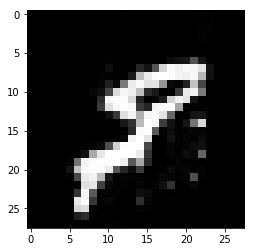

Epoch 2/2... Discriminator Loss: 1.3054... Generator Loss: 0.7694
Epoch 2/2... Discriminator Loss: 1.1975... Generator Loss: 0.5689
Epoch 2/2... Discriminator Loss: 0.7934... Generator Loss: 1.0538
Epoch 2/2... Discriminator Loss: 0.7282... Generator Loss: 1.3216
Epoch 2/2... Discriminator Loss: 0.3969... Generator Loss: 3.9592
Epoch 2/2... Discriminator Loss: 1.1338... Generator Loss: 0.7113
Epoch 2/2... Discriminator Loss: 0.5128... Generator Loss: 2.3725
Epoch 2/2... Discriminator Loss: 0.5742... Generator Loss: 1.6391
Epoch 2/2... Discriminator Loss: 1.4071... Generator Loss: 0.5298
Epoch 2/2... Discriminator Loss: 0.7854... Generator Loss: 1.1373


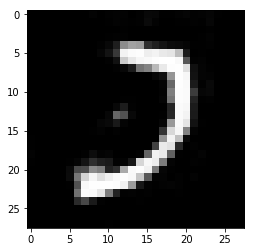

Epoch 2/2... Discriminator Loss: 0.8940... Generator Loss: 1.1014
Epoch 2/2... Discriminator Loss: 1.1379... Generator Loss: 0.6595
Epoch 2/2... Discriminator Loss: 0.5783... Generator Loss: 2.0914
Epoch 2/2... Discriminator Loss: 0.4745... Generator Loss: 3.2388
Epoch 2/2... Discriminator Loss: 0.5647... Generator Loss: 1.8782
Epoch 2/2... Discriminator Loss: 0.7371... Generator Loss: 1.6358
Epoch 2/2... Discriminator Loss: 0.5438... Generator Loss: 2.1392
Epoch 2/2... Discriminator Loss: 1.0983... Generator Loss: 0.9397
Epoch 2/2... Discriminator Loss: 0.7977... Generator Loss: 2.5066
Epoch 2/2... Discriminator Loss: 0.6779... Generator Loss: 1.2997


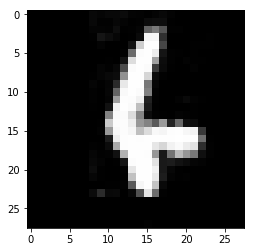

In [146]:
batch_size = 10
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 3.2906... Generator Loss: 0.1910
Epoch 1/1... Discriminator Loss: 2.6994... Generator Loss: 0.8400
Epoch 1/1... Discriminator Loss: 4.1358... Generator Loss: 0.1141
Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 1.1422
Epoch 1/1... Discriminator Loss: 4.5238... Generator Loss: 0.0282
Epoch 1/1... Discriminator Loss: 2.7551... Generator Loss: 0.2157
Epoch 1/1... Discriminator Loss: 3.9351... Generator Loss: 0.1794
Epoch 1/1... Discriminator Loss: 1.6899... Generator Loss: 1.2645
Epoch 1/1... Discriminator Loss: 3.2411... Generator Loss: 0.2293
Epoch 1/1... Discriminator Loss: 1.6423... Generator Loss: 0.4899


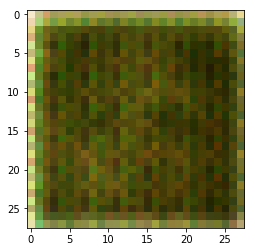

Epoch 1/1... Discriminator Loss: 3.6272... Generator Loss: 0.0748
Epoch 1/1... Discriminator Loss: 0.9063... Generator Loss: 1.0659
Epoch 1/1... Discriminator Loss: 0.5724... Generator Loss: 2.0943
Epoch 1/1... Discriminator Loss: 1.0063... Generator Loss: 2.1433
Epoch 1/1... Discriminator Loss: 2.0302... Generator Loss: 0.4482
Epoch 1/1... Discriminator Loss: 1.8084... Generator Loss: 0.4223
Epoch 1/1... Discriminator Loss: 2.2405... Generator Loss: 0.6771
Epoch 1/1... Discriminator Loss: 0.5223... Generator Loss: 3.2400
Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 0.5226
Epoch 1/1... Discriminator Loss: 0.6925... Generator Loss: 1.3466


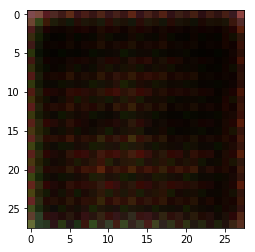

Epoch 1/1... Discriminator Loss: 1.1280... Generator Loss: 1.4531
Epoch 1/1... Discriminator Loss: 0.8323... Generator Loss: 1.2908
Epoch 1/1... Discriminator Loss: 1.1644... Generator Loss: 0.6461
Epoch 1/1... Discriminator Loss: 1.8279... Generator Loss: 0.3713
Epoch 1/1... Discriminator Loss: 0.4067... Generator Loss: 4.6233
Epoch 1/1... Discriminator Loss: 1.2130... Generator Loss: 1.0285
Epoch 1/1... Discriminator Loss: 1.1683... Generator Loss: 0.9643
Epoch 1/1... Discriminator Loss: 1.7089... Generator Loss: 0.3181
Epoch 1/1... Discriminator Loss: 0.7540... Generator Loss: 1.4653
Epoch 1/1... Discriminator Loss: 0.6062... Generator Loss: 1.8009


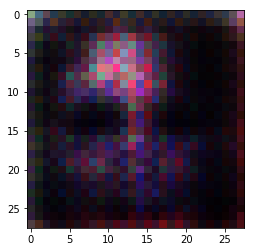

Epoch 1/1... Discriminator Loss: 2.0305... Generator Loss: 0.2763
Epoch 1/1... Discriminator Loss: 2.4762... Generator Loss: 0.1761
Epoch 1/1... Discriminator Loss: 2.3014... Generator Loss: 0.7492
Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.8378
Epoch 1/1... Discriminator Loss: 1.8563... Generator Loss: 0.7666
Epoch 1/1... Discriminator Loss: 1.7180... Generator Loss: 0.4534
Epoch 1/1... Discriminator Loss: 1.4708... Generator Loss: 0.5563
Epoch 1/1... Discriminator Loss: 1.4520... Generator Loss: 0.4889
Epoch 1/1... Discriminator Loss: 1.6005... Generator Loss: 0.3916
Epoch 1/1... Discriminator Loss: 0.9526... Generator Loss: 1.8686


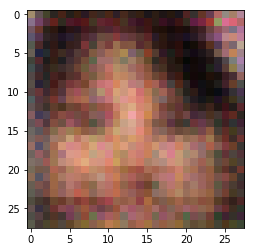

Epoch 1/1... Discriminator Loss: 1.8398... Generator Loss: 0.3510
Epoch 1/1... Discriminator Loss: 1.5403... Generator Loss: 0.4388
Epoch 1/1... Discriminator Loss: 1.4329... Generator Loss: 0.8599
Epoch 1/1... Discriminator Loss: 0.9798... Generator Loss: 0.8854
Epoch 1/1... Discriminator Loss: 1.1659... Generator Loss: 1.0735
Epoch 1/1... Discriminator Loss: 2.7772... Generator Loss: 0.1005
Epoch 1/1... Discriminator Loss: 1.2830... Generator Loss: 0.6180
Epoch 1/1... Discriminator Loss: 1.5782... Generator Loss: 0.4734
Epoch 1/1... Discriminator Loss: 1.7486... Generator Loss: 0.5174
Epoch 1/1... Discriminator Loss: 1.5477... Generator Loss: 0.4354


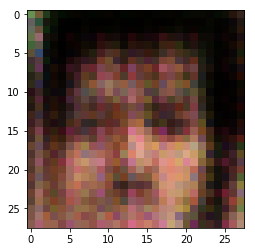

Epoch 1/1... Discriminator Loss: 1.8409... Generator Loss: 0.2795
Epoch 1/1... Discriminator Loss: 1.0259... Generator Loss: 0.7909
Epoch 1/1... Discriminator Loss: 0.7333... Generator Loss: 1.3232
Epoch 1/1... Discriminator Loss: 1.3400... Generator Loss: 0.7469
Epoch 1/1... Discriminator Loss: 1.6562... Generator Loss: 0.5662
Epoch 1/1... Discriminator Loss: 1.6969... Generator Loss: 0.3856
Epoch 1/1... Discriminator Loss: 1.6724... Generator Loss: 0.5154
Epoch 1/1... Discriminator Loss: 0.9271... Generator Loss: 1.0243
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.5515
Epoch 1/1... Discriminator Loss: 0.9911... Generator Loss: 0.7822


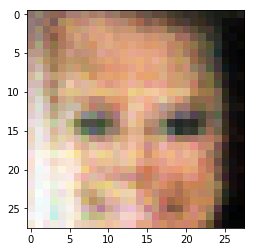

Epoch 1/1... Discriminator Loss: 1.3459... Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 2.0747... Generator Loss: 0.2547
Epoch 1/1... Discriminator Loss: 0.7826... Generator Loss: 1.1491
Epoch 1/1... Discriminator Loss: 0.9243... Generator Loss: 0.8874
Epoch 1/1... Discriminator Loss: 1.6157... Generator Loss: 0.4890
Epoch 1/1... Discriminator Loss: 1.2521... Generator Loss: 0.9090
Epoch 1/1... Discriminator Loss: 1.7275... Generator Loss: 0.5893
Epoch 1/1... Discriminator Loss: 0.7364... Generator Loss: 1.5730
Epoch 1/1... Discriminator Loss: 1.4421... Generator Loss: 0.4689
Epoch 1/1... Discriminator Loss: 1.6395... Generator Loss: 0.3883


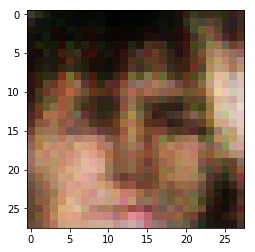

Epoch 1/1... Discriminator Loss: 1.3165... Generator Loss: 0.7591
Epoch 1/1... Discriminator Loss: 2.5006... Generator Loss: 0.1622
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 1.1992
Epoch 1/1... Discriminator Loss: 1.1044... Generator Loss: 0.7096
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.9068
Epoch 1/1... Discriminator Loss: 1.2208... Generator Loss: 0.6620
Epoch 1/1... Discriminator Loss: 1.1479... Generator Loss: 0.9745
Epoch 1/1... Discriminator Loss: 1.2841... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 1.8069... Generator Loss: 0.3873
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.5723


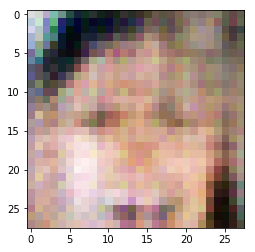

Epoch 1/1... Discriminator Loss: 1.7479... Generator Loss: 0.5698
Epoch 1/1... Discriminator Loss: 1.1227... Generator Loss: 1.2142
Epoch 1/1... Discriminator Loss: 1.4544... Generator Loss: 0.8801
Epoch 1/1... Discriminator Loss: 1.4768... Generator Loss: 0.5186
Epoch 1/1... Discriminator Loss: 1.7347... Generator Loss: 0.3615
Epoch 1/1... Discriminator Loss: 1.7262... Generator Loss: 0.5229
Epoch 1/1... Discriminator Loss: 0.8158... Generator Loss: 1.1854
Epoch 1/1... Discriminator Loss: 2.1437... Generator Loss: 0.2092
Epoch 1/1... Discriminator Loss: 1.7354... Generator Loss: 0.5318
Epoch 1/1... Discriminator Loss: 1.1001... Generator Loss: 0.7718


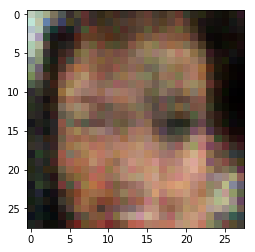

Epoch 1/1... Discriminator Loss: 1.2556... Generator Loss: 0.7647
Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.5865
Epoch 1/1... Discriminator Loss: 1.1495... Generator Loss: 0.7265
Epoch 1/1... Discriminator Loss: 1.2113... Generator Loss: 0.9395
Epoch 1/1... Discriminator Loss: 2.0193... Generator Loss: 0.2456
Epoch 1/1... Discriminator Loss: 1.0217... Generator Loss: 0.9089
Epoch 1/1... Discriminator Loss: 1.6440... Generator Loss: 0.7936
Epoch 1/1... Discriminator Loss: 1.5466... Generator Loss: 0.6519
Epoch 1/1... Discriminator Loss: 1.4312... Generator Loss: 0.6985
Epoch 1/1... Discriminator Loss: 1.0046... Generator Loss: 1.3675


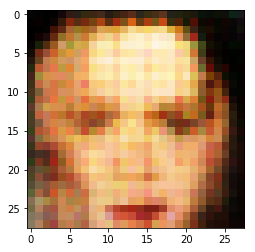

Epoch 1/1... Discriminator Loss: 0.7146... Generator Loss: 1.1976
Epoch 1/1... Discriminator Loss: 0.8745... Generator Loss: 1.1672
Epoch 1/1... Discriminator Loss: 0.5177... Generator Loss: 1.9392
Epoch 1/1... Discriminator Loss: 1.2157... Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 1.4451... Generator Loss: 0.9509
Epoch 1/1... Discriminator Loss: 0.9931... Generator Loss: 1.0306
Epoch 1/1... Discriminator Loss: 2.0301... Generator Loss: 0.3632
Epoch 1/1... Discriminator Loss: 1.2567... Generator Loss: 0.5427
Epoch 1/1... Discriminator Loss: 1.7572... Generator Loss: 0.4383
Epoch 1/1... Discriminator Loss: 1.3911... Generator Loss: 0.5165


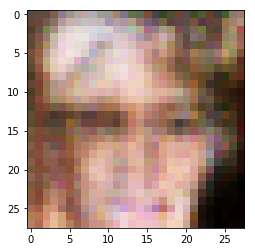

Epoch 1/1... Discriminator Loss: 1.2407... Generator Loss: 0.6502
Epoch 1/1... Discriminator Loss: 1.2896... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.2060... Generator Loss: 0.8085
Epoch 1/1... Discriminator Loss: 0.8459... Generator Loss: 1.1867
Epoch 1/1... Discriminator Loss: 1.5212... Generator Loss: 0.3922
Epoch 1/1... Discriminator Loss: 1.3365... Generator Loss: 0.5595
Epoch 1/1... Discriminator Loss: 1.6080... Generator Loss: 0.4872
Epoch 1/1... Discriminator Loss: 1.1261... Generator Loss: 0.8529
Epoch 1/1... Discriminator Loss: 1.0084... Generator Loss: 1.1689
Epoch 1/1... Discriminator Loss: 0.8762... Generator Loss: 1.8121


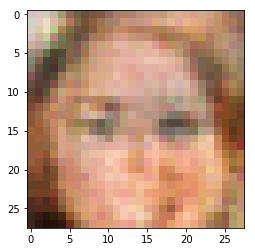

Epoch 1/1... Discriminator Loss: 0.5656... Generator Loss: 2.1688
Epoch 1/1... Discriminator Loss: 1.6892... Generator Loss: 0.3099
Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 0.7309
Epoch 1/1... Discriminator Loss: 1.2387... Generator Loss: 1.7135
Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.6284
Epoch 1/1... Discriminator Loss: 1.2626... Generator Loss: 0.6967
Epoch 1/1... Discriminator Loss: 0.9567... Generator Loss: 1.3932
Epoch 1/1... Discriminator Loss: 0.8819... Generator Loss: 1.0796
Epoch 1/1... Discriminator Loss: 1.0475... Generator Loss: 0.9399
Epoch 1/1... Discriminator Loss: 1.4612... Generator Loss: 0.6511


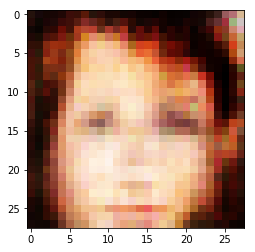

Epoch 1/1... Discriminator Loss: 1.4773... Generator Loss: 0.5439
Epoch 1/1... Discriminator Loss: 1.6698... Generator Loss: 0.5782
Epoch 1/1... Discriminator Loss: 1.0474... Generator Loss: 0.9529
Epoch 1/1... Discriminator Loss: 1.5648... Generator Loss: 0.6473
Epoch 1/1... Discriminator Loss: 1.1686... Generator Loss: 0.8627
Epoch 1/1... Discriminator Loss: 1.8538... Generator Loss: 0.5405
Epoch 1/1... Discriminator Loss: 1.1866... Generator Loss: 0.7453
Epoch 1/1... Discriminator Loss: 0.9774... Generator Loss: 0.9964
Epoch 1/1... Discriminator Loss: 1.4538... Generator Loss: 0.5438
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.7263


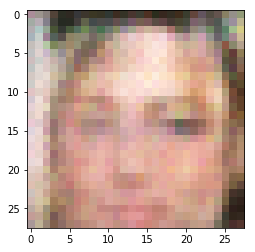

Epoch 1/1... Discriminator Loss: 0.7925... Generator Loss: 1.3913
Epoch 1/1... Discriminator Loss: 1.2564... Generator Loss: 0.7184
Epoch 1/1... Discriminator Loss: 1.0738... Generator Loss: 0.7677
Epoch 1/1... Discriminator Loss: 1.3622... Generator Loss: 0.8287
Epoch 1/1... Discriminator Loss: 1.5946... Generator Loss: 0.3973
Epoch 1/1... Discriminator Loss: 1.0558... Generator Loss: 1.2478
Epoch 1/1... Discriminator Loss: 1.4987... Generator Loss: 0.9793
Epoch 1/1... Discriminator Loss: 0.9229... Generator Loss: 1.2021
Epoch 1/1... Discriminator Loss: 1.2016... Generator Loss: 0.9882
Epoch 1/1... Discriminator Loss: 1.0593... Generator Loss: 0.9394


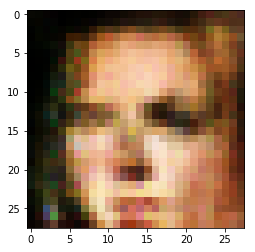

Epoch 1/1... Discriminator Loss: 1.1998... Generator Loss: 1.4692
Epoch 1/1... Discriminator Loss: 1.3812... Generator Loss: 0.7208
Epoch 1/1... Discriminator Loss: 0.9625... Generator Loss: 0.9657
Epoch 1/1... Discriminator Loss: 1.3849... Generator Loss: 0.5396
Epoch 1/1... Discriminator Loss: 1.1964... Generator Loss: 0.6328
Epoch 1/1... Discriminator Loss: 1.7661... Generator Loss: 0.4286
Epoch 1/1... Discriminator Loss: 1.4076... Generator Loss: 0.5505
Epoch 1/1... Discriminator Loss: 1.0890... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.6471... Generator Loss: 0.3915
Epoch 1/1... Discriminator Loss: 1.4160... Generator Loss: 0.4738


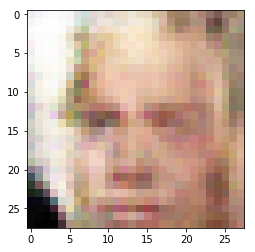

Epoch 1/1... Discriminator Loss: 1.1866... Generator Loss: 0.8263
Epoch 1/1... Discriminator Loss: 1.1599... Generator Loss: 0.8271
Epoch 1/1... Discriminator Loss: 0.9950... Generator Loss: 1.2172
Epoch 1/1... Discriminator Loss: 1.5592... Generator Loss: 0.9963
Epoch 1/1... Discriminator Loss: 1.3487... Generator Loss: 0.8092
Epoch 1/1... Discriminator Loss: 1.4092... Generator Loss: 0.6112
Epoch 1/1... Discriminator Loss: 1.3815... Generator Loss: 0.4757
Epoch 1/1... Discriminator Loss: 1.3237... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 1.2793... Generator Loss: 0.5640
Epoch 1/1... Discriminator Loss: 0.9130... Generator Loss: 1.0103


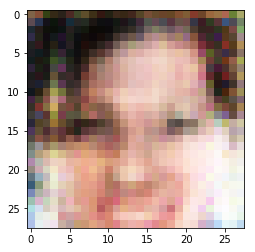

Epoch 1/1... Discriminator Loss: 1.1290... Generator Loss: 1.4440
Epoch 1/1... Discriminator Loss: 1.1722... Generator Loss: 1.1327
Epoch 1/1... Discriminator Loss: 1.2280... Generator Loss: 1.2425
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.8059
Epoch 1/1... Discriminator Loss: 1.5260... Generator Loss: 0.4177
Epoch 1/1... Discriminator Loss: 1.2498... Generator Loss: 0.6401
Epoch 1/1... Discriminator Loss: 1.5914... Generator Loss: 0.7799
Epoch 1/1... Discriminator Loss: 1.5342... Generator Loss: 0.4621
Epoch 1/1... Discriminator Loss: 0.9411... Generator Loss: 1.3526
Epoch 1/1... Discriminator Loss: 1.1513... Generator Loss: 0.8547


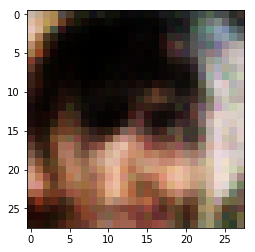

Epoch 1/1... Discriminator Loss: 0.9973... Generator Loss: 0.9870
Epoch 1/1... Discriminator Loss: 1.1651... Generator Loss: 0.7868
Epoch 1/1... Discriminator Loss: 0.9169... Generator Loss: 1.3434
Epoch 1/1... Discriminator Loss: 0.9754... Generator Loss: 1.1955
Epoch 1/1... Discriminator Loss: 1.3502... Generator Loss: 0.5179
Epoch 1/1... Discriminator Loss: 1.2858... Generator Loss: 0.6914
Epoch 1/1... Discriminator Loss: 0.8429... Generator Loss: 1.0422
Epoch 1/1... Discriminator Loss: 1.0060... Generator Loss: 1.4603
Epoch 1/1... Discriminator Loss: 0.6848... Generator Loss: 2.7372
Epoch 1/1... Discriminator Loss: 1.9335... Generator Loss: 1.7372


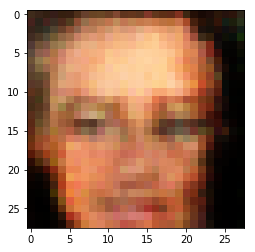

Epoch 1/1... Discriminator Loss: 1.5313... Generator Loss: 0.4501
Epoch 1/1... Discriminator Loss: 1.1273... Generator Loss: 0.6448
Epoch 1/1... Discriminator Loss: 0.7228... Generator Loss: 2.0724
Epoch 1/1... Discriminator Loss: 0.6280... Generator Loss: 2.1693
Epoch 1/1... Discriminator Loss: 0.6528... Generator Loss: 1.6192
Epoch 1/1... Discriminator Loss: 1.2079... Generator Loss: 1.3159
Epoch 1/1... Discriminator Loss: 1.9506... Generator Loss: 0.2468
Epoch 1/1... Discriminator Loss: 0.9990... Generator Loss: 0.7746
Epoch 1/1... Discriminator Loss: 0.5952... Generator Loss: 2.3008
Epoch 1/1... Discriminator Loss: 1.2856... Generator Loss: 0.5937


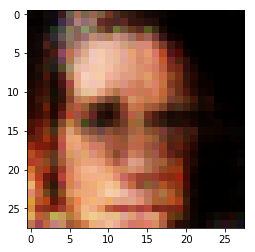

Epoch 1/1... Discriminator Loss: 0.7759... Generator Loss: 1.6098
Epoch 1/1... Discriminator Loss: 1.1446... Generator Loss: 0.8262
Epoch 1/1... Discriminator Loss: 0.8207... Generator Loss: 1.3584
Epoch 1/1... Discriminator Loss: 0.9298... Generator Loss: 2.0704
Epoch 1/1... Discriminator Loss: 1.3038... Generator Loss: 1.7827
Epoch 1/1... Discriminator Loss: 1.5003... Generator Loss: 0.4369
Epoch 1/1... Discriminator Loss: 0.7361... Generator Loss: 1.5115
Epoch 1/1... Discriminator Loss: 0.6226... Generator Loss: 1.7809
Epoch 1/1... Discriminator Loss: 0.8376... Generator Loss: 1.0906
Epoch 1/1... Discriminator Loss: 1.1967... Generator Loss: 0.5998


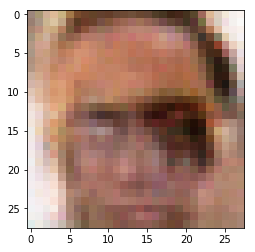

Epoch 1/1... Discriminator Loss: 0.9936... Generator Loss: 0.7972
Epoch 1/1... Discriminator Loss: 0.9500... Generator Loss: 1.0990
Epoch 1/1... Discriminator Loss: 0.9229... Generator Loss: 1.2215
Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.4993
Epoch 1/1... Discriminator Loss: 1.3186... Generator Loss: 0.5406
Epoch 1/1... Discriminator Loss: 0.9351... Generator Loss: 1.1464
Epoch 1/1... Discriminator Loss: 0.6854... Generator Loss: 1.9770
Epoch 1/1... Discriminator Loss: 1.4278... Generator Loss: 0.4831
Epoch 1/1... Discriminator Loss: 0.6843... Generator Loss: 1.7125
Epoch 1/1... Discriminator Loss: 0.7992... Generator Loss: 1.8250


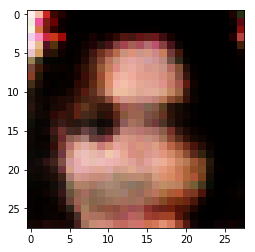

Epoch 1/1... Discriminator Loss: 0.7669... Generator Loss: 1.2481
Epoch 1/1... Discriminator Loss: 1.8782... Generator Loss: 0.2522
Epoch 1/1... Discriminator Loss: 1.1008... Generator Loss: 0.8453
Epoch 1/1... Discriminator Loss: 0.8806... Generator Loss: 1.2195
Epoch 1/1... Discriminator Loss: 1.3061... Generator Loss: 0.5637
Epoch 1/1... Discriminator Loss: 0.4115... Generator Loss: 3.1907
Epoch 1/1... Discriminator Loss: 0.7298... Generator Loss: 1.2524
Epoch 1/1... Discriminator Loss: 1.7922... Generator Loss: 0.2925
Epoch 1/1... Discriminator Loss: 0.4581... Generator Loss: 2.8450
Epoch 1/1... Discriminator Loss: 1.3905... Generator Loss: 0.5090


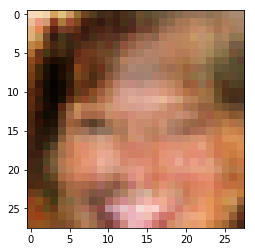

Epoch 1/1... Discriminator Loss: 1.0244... Generator Loss: 1.7511
Epoch 1/1... Discriminator Loss: 1.3204... Generator Loss: 0.6342
Epoch 1/1... Discriminator Loss: 1.2372... Generator Loss: 0.8039
Epoch 1/1... Discriminator Loss: 0.5921... Generator Loss: 2.4959
Epoch 1/1... Discriminator Loss: 1.2987... Generator Loss: 1.5172
Epoch 1/1... Discriminator Loss: 1.0573... Generator Loss: 0.7722
Epoch 1/1... Discriminator Loss: 1.5921... Generator Loss: 0.4443
Epoch 1/1... Discriminator Loss: 0.9267... Generator Loss: 0.9632
Epoch 1/1... Discriminator Loss: 1.2898... Generator Loss: 0.5421
Epoch 1/1... Discriminator Loss: 1.1088... Generator Loss: 0.7469


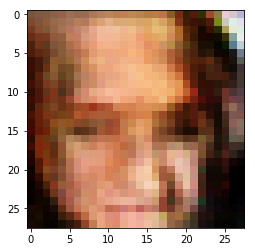

Epoch 1/1... Discriminator Loss: 0.7246... Generator Loss: 1.5912
Epoch 1/1... Discriminator Loss: 1.4167... Generator Loss: 0.5271
Epoch 1/1... Discriminator Loss: 1.3068... Generator Loss: 0.5313
Epoch 1/1... Discriminator Loss: 0.8950... Generator Loss: 1.2979
Epoch 1/1... Discriminator Loss: 1.8001... Generator Loss: 0.2842
Epoch 1/1... Discriminator Loss: 0.7217... Generator Loss: 3.5410
Epoch 1/1... Discriminator Loss: 0.8706... Generator Loss: 1.1897
Epoch 1/1... Discriminator Loss: 1.3242... Generator Loss: 0.6794
Epoch 1/1... Discriminator Loss: 1.4528... Generator Loss: 0.5138
Epoch 1/1... Discriminator Loss: 1.2544... Generator Loss: 0.6302


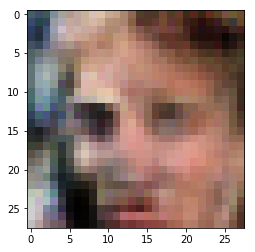

Epoch 1/1... Discriminator Loss: 1.0532... Generator Loss: 0.9838
Epoch 1/1... Discriminator Loss: 1.3929... Generator Loss: 0.6022
Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.5405
Epoch 1/1... Discriminator Loss: 1.1613... Generator Loss: 0.7652
Epoch 1/1... Discriminator Loss: 1.3073... Generator Loss: 0.6992
Epoch 1/1... Discriminator Loss: 1.0619... Generator Loss: 0.8974
Epoch 1/1... Discriminator Loss: 1.3787... Generator Loss: 0.7693
Epoch 1/1... Discriminator Loss: 1.1123... Generator Loss: 0.8189
Epoch 1/1... Discriminator Loss: 1.0679... Generator Loss: 0.8164
Epoch 1/1... Discriminator Loss: 1.8951... Generator Loss: 0.2493


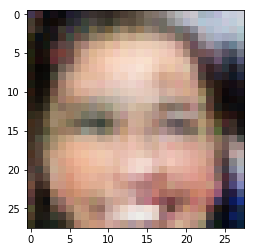

Epoch 1/1... Discriminator Loss: 1.2046... Generator Loss: 1.1255
Epoch 1/1... Discriminator Loss: 1.0040... Generator Loss: 1.2949
Epoch 1/1... Discriminator Loss: 1.5600... Generator Loss: 0.4169
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.5383
Epoch 1/1... Discriminator Loss: 1.1538... Generator Loss: 0.6368
Epoch 1/1... Discriminator Loss: 2.2353... Generator Loss: 0.1714
Epoch 1/1... Discriminator Loss: 1.1851... Generator Loss: 0.8236
Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 1.4395... Generator Loss: 0.4918
Epoch 1/1... Discriminator Loss: 1.5221... Generator Loss: 0.4380


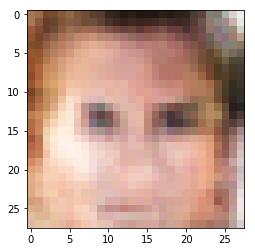

Epoch 1/1... Discriminator Loss: 1.0109... Generator Loss: 1.2166
Epoch 1/1... Discriminator Loss: 0.9305... Generator Loss: 1.0476
Epoch 1/1... Discriminator Loss: 1.5861... Generator Loss: 0.4970
Epoch 1/1... Discriminator Loss: 1.0196... Generator Loss: 0.9208
Epoch 1/1... Discriminator Loss: 1.3395... Generator Loss: 0.5032
Epoch 1/1... Discriminator Loss: 1.2082... Generator Loss: 0.7372
Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 0.5426
Epoch 1/1... Discriminator Loss: 0.9338... Generator Loss: 1.0099
Epoch 1/1... Discriminator Loss: 0.9053... Generator Loss: 1.6113
Epoch 1/1... Discriminator Loss: 1.2384... Generator Loss: 0.6260


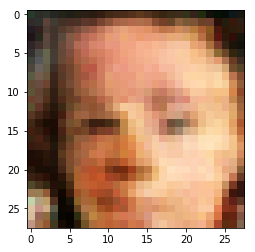

Epoch 1/1... Discriminator Loss: 1.9274... Generator Loss: 0.2508
Epoch 1/1... Discriminator Loss: 1.5828... Generator Loss: 0.3902
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 1.0574
Epoch 1/1... Discriminator Loss: 1.3369... Generator Loss: 0.6821
Epoch 1/1... Discriminator Loss: 1.5703... Generator Loss: 0.3815
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.5013
Epoch 1/1... Discriminator Loss: 1.2653... Generator Loss: 0.6590
Epoch 1/1... Discriminator Loss: 1.1785... Generator Loss: 0.8242
Epoch 1/1... Discriminator Loss: 1.1443... Generator Loss: 0.9012
Epoch 1/1... Discriminator Loss: 1.0548... Generator Loss: 1.0792


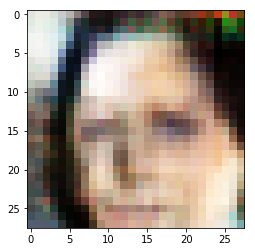

Epoch 1/1... Discriminator Loss: 1.7744... Generator Loss: 0.3022
Epoch 1/1... Discriminator Loss: 1.5723... Generator Loss: 0.3915
Epoch 1/1... Discriminator Loss: 1.1548... Generator Loss: 1.1819
Epoch 1/1... Discriminator Loss: 1.0904... Generator Loss: 0.7404
Epoch 1/1... Discriminator Loss: 1.6942... Generator Loss: 0.4385
Epoch 1/1... Discriminator Loss: 1.4611... Generator Loss: 0.4739
Epoch 1/1... Discriminator Loss: 1.2426... Generator Loss: 0.8057
Epoch 1/1... Discriminator Loss: 1.8390... Generator Loss: 0.2854
Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.6116
Epoch 1/1... Discriminator Loss: 1.4335... Generator Loss: 0.6679


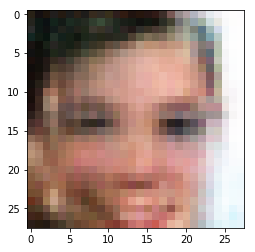

Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.7756
Epoch 1/1... Discriminator Loss: 1.4827... Generator Loss: 0.4326
Epoch 1/1... Discriminator Loss: 1.1571... Generator Loss: 0.8571
Epoch 1/1... Discriminator Loss: 1.2893... Generator Loss: 0.7132
Epoch 1/1... Discriminator Loss: 0.6538... Generator Loss: 1.5527
Epoch 1/1... Discriminator Loss: 1.2625... Generator Loss: 0.7482
Epoch 1/1... Discriminator Loss: 1.1962... Generator Loss: 1.0067
Epoch 1/1... Discriminator Loss: 1.0466... Generator Loss: 1.3082
Epoch 1/1... Discriminator Loss: 1.1069... Generator Loss: 0.9343
Epoch 1/1... Discriminator Loss: 0.8789... Generator Loss: 1.2068


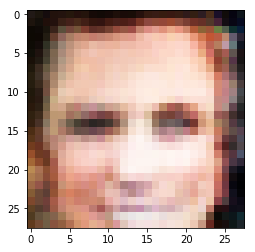

Epoch 1/1... Discriminator Loss: 1.0085... Generator Loss: 1.2337
Epoch 1/1... Discriminator Loss: 1.1539... Generator Loss: 0.9657
Epoch 1/1... Discriminator Loss: 1.1498... Generator Loss: 0.7564
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.6266
Epoch 1/1... Discriminator Loss: 1.1105... Generator Loss: 0.8063
Epoch 1/1... Discriminator Loss: 1.1261... Generator Loss: 0.7574
Epoch 1/1... Discriminator Loss: 1.1676... Generator Loss: 0.6710
Epoch 1/1... Discriminator Loss: 1.1286... Generator Loss: 0.8455
Epoch 1/1... Discriminator Loss: 1.2292... Generator Loss: 0.6844
Epoch 1/1... Discriminator Loss: 0.9069... Generator Loss: 1.1941


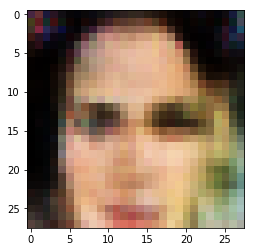

Epoch 1/1... Discriminator Loss: 1.5657... Generator Loss: 0.6147
Epoch 1/1... Discriminator Loss: 1.2041... Generator Loss: 0.6741
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.5551
Epoch 1/1... Discriminator Loss: 1.2250... Generator Loss: 0.8065
Epoch 1/1... Discriminator Loss: 1.2133... Generator Loss: 0.6627
Epoch 1/1... Discriminator Loss: 1.6461... Generator Loss: 0.3816
Epoch 1/1... Discriminator Loss: 1.2099... Generator Loss: 1.0215
Epoch 1/1... Discriminator Loss: 1.3244... Generator Loss: 0.7588
Epoch 1/1... Discriminator Loss: 1.1873... Generator Loss: 0.9140
Epoch 1/1... Discriminator Loss: 0.9089... Generator Loss: 1.4282


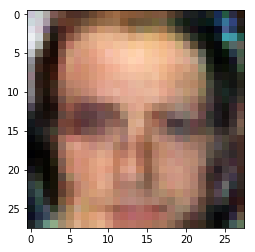

Epoch 1/1... Discriminator Loss: 1.3036... Generator Loss: 0.5773
Epoch 1/1... Discriminator Loss: 1.2606... Generator Loss: 0.9385
Epoch 1/1... Discriminator Loss: 1.1771... Generator Loss: 1.1247
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.6147
Epoch 1/1... Discriminator Loss: 1.4442... Generator Loss: 0.5828
Epoch 1/1... Discriminator Loss: 1.2954... Generator Loss: 0.9465
Epoch 1/1... Discriminator Loss: 1.2059... Generator Loss: 0.7846
Epoch 1/1... Discriminator Loss: 1.2716... Generator Loss: 0.8144
Epoch 1/1... Discriminator Loss: 1.1884... Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.5935


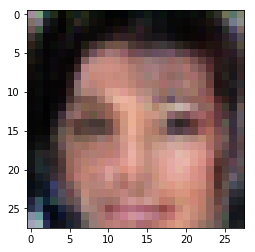

Epoch 1/1... Discriminator Loss: 1.6379... Generator Loss: 0.3745
Epoch 1/1... Discriminator Loss: 1.4892... Generator Loss: 0.8211
Epoch 1/1... Discriminator Loss: 1.4301... Generator Loss: 0.5680
Epoch 1/1... Discriminator Loss: 1.2979... Generator Loss: 0.6427
Epoch 1/1... Discriminator Loss: 1.5664... Generator Loss: 0.6544
Epoch 1/1... Discriminator Loss: 1.6496... Generator Loss: 0.4303
Epoch 1/1... Discriminator Loss: 1.0395... Generator Loss: 0.8628
Epoch 1/1... Discriminator Loss: 1.0480... Generator Loss: 0.9877
Epoch 1/1... Discriminator Loss: 1.0331... Generator Loss: 1.1581
Epoch 1/1... Discriminator Loss: 1.3537... Generator Loss: 0.5822


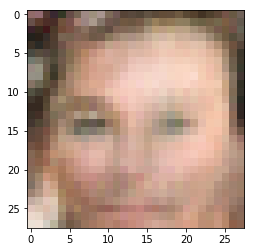

Epoch 1/1... Discriminator Loss: 1.3443... Generator Loss: 0.5267
Epoch 1/1... Discriminator Loss: 1.2197... Generator Loss: 0.7911
Epoch 1/1... Discriminator Loss: 0.9445... Generator Loss: 1.1298
Epoch 1/1... Discriminator Loss: 1.2286... Generator Loss: 0.5545
Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.8222
Epoch 1/1... Discriminator Loss: 1.6196... Generator Loss: 0.4763
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.5388
Epoch 1/1... Discriminator Loss: 1.4071... Generator Loss: 0.7871
Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.6560
Epoch 1/1... Discriminator Loss: 1.6335... Generator Loss: 0.5980


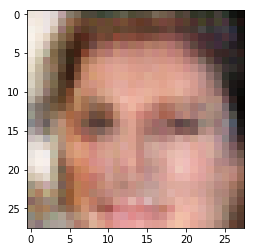

Epoch 1/1... Discriminator Loss: 1.2567... Generator Loss: 0.8237
Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 0.6491
Epoch 1/1... Discriminator Loss: 1.1282... Generator Loss: 0.8158
Epoch 1/1... Discriminator Loss: 1.3265... Generator Loss: 0.5100
Epoch 1/1... Discriminator Loss: 0.9652... Generator Loss: 0.9485
Epoch 1/1... Discriminator Loss: 1.2466... Generator Loss: 0.8051
Epoch 1/1... Discriminator Loss: 1.2471... Generator Loss: 0.6780
Epoch 1/1... Discriminator Loss: 1.2195... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 1.5509... Generator Loss: 0.4322
Epoch 1/1... Discriminator Loss: 1.5278... Generator Loss: 0.4829


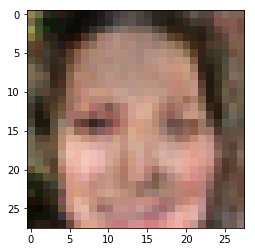

Epoch 1/1... Discriminator Loss: 1.1482... Generator Loss: 0.7082
Epoch 1/1... Discriminator Loss: 1.1600... Generator Loss: 0.8127
Epoch 1/1... Discriminator Loss: 1.3321... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.1165... Generator Loss: 0.8244
Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 0.8174
Epoch 1/1... Discriminator Loss: 1.3425... Generator Loss: 0.5741
Epoch 1/1... Discriminator Loss: 1.2464... Generator Loss: 0.8529
Epoch 1/1... Discriminator Loss: 1.0199... Generator Loss: 0.8530
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.5016
Epoch 1/1... Discriminator Loss: 1.7256... Generator Loss: 0.3191


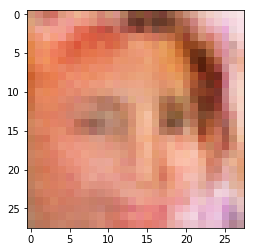

Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.5818
Epoch 1/1... Discriminator Loss: 1.2705... Generator Loss: 0.6788
Epoch 1/1... Discriminator Loss: 1.4096... Generator Loss: 0.7038
Epoch 1/1... Discriminator Loss: 1.2663... Generator Loss: 0.6507
Epoch 1/1... Discriminator Loss: 1.4271... Generator Loss: 0.5150
Epoch 1/1... Discriminator Loss: 1.1753... Generator Loss: 1.0162
Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 0.9315
Epoch 1/1... Discriminator Loss: 1.1297... Generator Loss: 0.9239
Epoch 1/1... Discriminator Loss: 1.2015... Generator Loss: 0.7801
Epoch 1/1... Discriminator Loss: 1.1179... Generator Loss: 0.6893


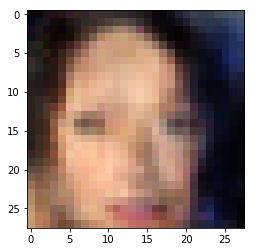

Epoch 1/1... Discriminator Loss: 1.3103... Generator Loss: 0.8765
Epoch 1/1... Discriminator Loss: 1.5378... Generator Loss: 0.6998
Epoch 1/1... Discriminator Loss: 1.3148... Generator Loss: 0.6346
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 0.7619
Epoch 1/1... Discriminator Loss: 1.4944... Generator Loss: 0.7214
Epoch 1/1... Discriminator Loss: 1.3172... Generator Loss: 0.5993
Epoch 1/1... Discriminator Loss: 1.7140... Generator Loss: 0.3388
Epoch 1/1... Discriminator Loss: 1.0292... Generator Loss: 1.1213
Epoch 1/1... Discriminator Loss: 1.4354... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.4749... Generator Loss: 0.6749


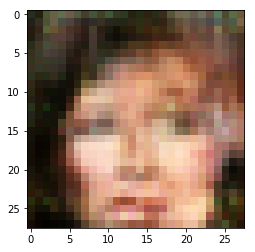

Epoch 1/1... Discriminator Loss: 0.9246... Generator Loss: 1.0611
Epoch 1/1... Discriminator Loss: 1.6806... Generator Loss: 0.3180
Epoch 1/1... Discriminator Loss: 1.2334... Generator Loss: 0.8946
Epoch 1/1... Discriminator Loss: 1.3438... Generator Loss: 0.5878
Epoch 1/1... Discriminator Loss: 1.1665... Generator Loss: 0.8305
Epoch 1/1... Discriminator Loss: 1.1392... Generator Loss: 0.8078
Epoch 1/1... Discriminator Loss: 1.1615... Generator Loss: 0.7787
Epoch 1/1... Discriminator Loss: 1.4036... Generator Loss: 0.5078
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 0.5404
Epoch 1/1... Discriminator Loss: 1.2910... Generator Loss: 0.6968


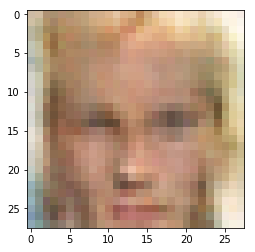

Epoch 1/1... Discriminator Loss: 1.2200... Generator Loss: 0.6999
Epoch 1/1... Discriminator Loss: 1.2550... Generator Loss: 0.8781
Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 0.6679
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 1.3448
Epoch 1/1... Discriminator Loss: 1.6841... Generator Loss: 0.5428
Epoch 1/1... Discriminator Loss: 1.2553... Generator Loss: 0.6008
Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.5760
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 0.6432
Epoch 1/1... Discriminator Loss: 1.0273... Generator Loss: 0.9848
Epoch 1/1... Discriminator Loss: 1.5130... Generator Loss: 0.4667


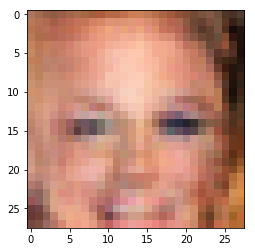

Epoch 1/1... Discriminator Loss: 1.3938... Generator Loss: 0.9981
Epoch 1/1... Discriminator Loss: 1.0819... Generator Loss: 0.9169
Epoch 1/1... Discriminator Loss: 1.3089... Generator Loss: 0.7546
Epoch 1/1... Discriminator Loss: 1.4060... Generator Loss: 0.8086
Epoch 1/1... Discriminator Loss: 1.3222... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 1.6049... Generator Loss: 0.4375
Epoch 1/1... Discriminator Loss: 1.1720... Generator Loss: 0.8101
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.6960
Epoch 1/1... Discriminator Loss: 1.1151... Generator Loss: 0.8923


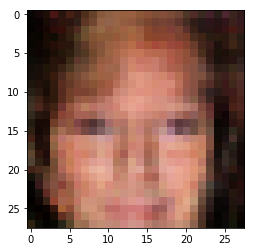

Epoch 1/1... Discriminator Loss: 1.1698... Generator Loss: 0.7201
Epoch 1/1... Discriminator Loss: 1.0555... Generator Loss: 1.0586
Epoch 1/1... Discriminator Loss: 1.2431... Generator Loss: 0.7971
Epoch 1/1... Discriminator Loss: 1.1650... Generator Loss: 0.7313
Epoch 1/1... Discriminator Loss: 1.3842... Generator Loss: 0.4955
Epoch 1/1... Discriminator Loss: 1.1329... Generator Loss: 0.9870
Epoch 1/1... Discriminator Loss: 1.2038... Generator Loss: 0.8112
Epoch 1/1... Discriminator Loss: 1.3406... Generator Loss: 0.9052
Epoch 1/1... Discriminator Loss: 1.2444... Generator Loss: 0.7053
Epoch 1/1... Discriminator Loss: 1.2295... Generator Loss: 0.7529


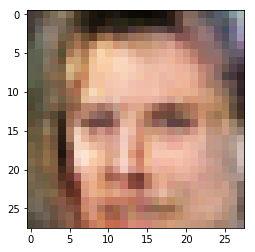

Epoch 1/1... Discriminator Loss: 1.4478... Generator Loss: 0.6285
Epoch 1/1... Discriminator Loss: 1.1869... Generator Loss: 0.7251
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 0.7934
Epoch 1/1... Discriminator Loss: 1.3136... Generator Loss: 0.7569
Epoch 1/1... Discriminator Loss: 1.3591... Generator Loss: 0.6748
Epoch 1/1... Discriminator Loss: 1.1514... Generator Loss: 0.7309
Epoch 1/1... Discriminator Loss: 1.4880... Generator Loss: 0.5911
Epoch 1/1... Discriminator Loss: 1.1727... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 1.1573... Generator Loss: 0.7832
Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.7231


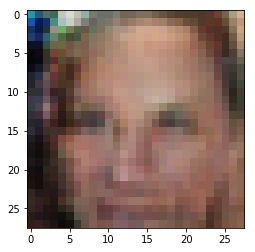

Epoch 1/1... Discriminator Loss: 1.5095... Generator Loss: 0.3901
Epoch 1/1... Discriminator Loss: 1.4250... Generator Loss: 0.5239
Epoch 1/1... Discriminator Loss: 1.6161... Generator Loss: 0.5321
Epoch 1/1... Discriminator Loss: 1.4328... Generator Loss: 0.5270
Epoch 1/1... Discriminator Loss: 1.2947... Generator Loss: 0.6410
Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.7489
Epoch 1/1... Discriminator Loss: 1.0928... Generator Loss: 0.7328
Epoch 1/1... Discriminator Loss: 1.2727... Generator Loss: 0.6591
Epoch 1/1... Discriminator Loss: 1.1982... Generator Loss: 0.8752
Epoch 1/1... Discriminator Loss: 1.2281... Generator Loss: 0.7518


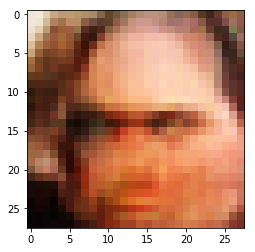

Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.8825
Epoch 1/1... Discriminator Loss: 1.3231... Generator Loss: 0.5800
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.4674
Epoch 1/1... Discriminator Loss: 1.0446... Generator Loss: 0.8515
Epoch 1/1... Discriminator Loss: 1.4609... Generator Loss: 0.8065
Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.5702
Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.5555
Epoch 1/1... Discriminator Loss: 1.1931... Generator Loss: 0.8687
Epoch 1/1... Discriminator Loss: 1.2762... Generator Loss: 0.6640
Epoch 1/1... Discriminator Loss: 1.2234... Generator Loss: 0.7787


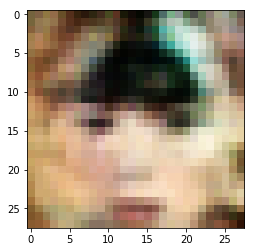

Epoch 1/1... Discriminator Loss: 1.1721... Generator Loss: 0.7811
Epoch 1/1... Discriminator Loss: 1.2651... Generator Loss: 0.7276
Epoch 1/1... Discriminator Loss: 1.0677... Generator Loss: 0.7179
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.5907
Epoch 1/1... Discriminator Loss: 1.3527... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.0335... Generator Loss: 1.0337
Epoch 1/1... Discriminator Loss: 1.2958... Generator Loss: 0.6941
Epoch 1/1... Discriminator Loss: 1.3919... Generator Loss: 0.5414
Epoch 1/1... Discriminator Loss: 1.0430... Generator Loss: 1.0788
Epoch 1/1... Discriminator Loss: 1.5242... Generator Loss: 0.5075


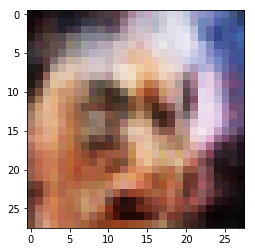

Epoch 1/1... Discriminator Loss: 1.2597... Generator Loss: 0.6184
Epoch 1/1... Discriminator Loss: 1.3479... Generator Loss: 0.5438
Epoch 1/1... Discriminator Loss: 1.1605... Generator Loss: 0.7713
Epoch 1/1... Discriminator Loss: 1.2335... Generator Loss: 0.6230
Epoch 1/1... Discriminator Loss: 1.1071... Generator Loss: 0.7403
Epoch 1/1... Discriminator Loss: 1.4031... Generator Loss: 0.5343
Epoch 1/1... Discriminator Loss: 1.1924... Generator Loss: 0.7383
Epoch 1/1... Discriminator Loss: 1.4044... Generator Loss: 0.4931
Epoch 1/1... Discriminator Loss: 1.2408... Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 1.0179... Generator Loss: 0.8795


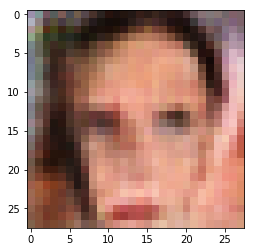

Epoch 1/1... Discriminator Loss: 1.1871... Generator Loss: 0.8942
Epoch 1/1... Discriminator Loss: 1.0037... Generator Loss: 0.8425
Epoch 1/1... Discriminator Loss: 1.4783... Generator Loss: 0.4561
Epoch 1/1... Discriminator Loss: 1.4374... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.1822... Generator Loss: 0.8745
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.9287
Epoch 1/1... Discriminator Loss: 1.2652... Generator Loss: 0.5794
Epoch 1/1... Discriminator Loss: 1.4228... Generator Loss: 1.1396
Epoch 1/1... Discriminator Loss: 1.3244... Generator Loss: 0.6413
Epoch 1/1... Discriminator Loss: 1.1965... Generator Loss: 0.7786


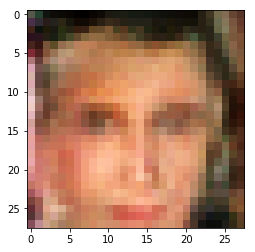

Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 0.6331
Epoch 1/1... Discriminator Loss: 1.4406... Generator Loss: 0.4687
Epoch 1/1... Discriminator Loss: 0.9592... Generator Loss: 1.1010
Epoch 1/1... Discriminator Loss: 1.4291... Generator Loss: 0.5601
Epoch 1/1... Discriminator Loss: 1.1289... Generator Loss: 0.9954
Epoch 1/1... Discriminator Loss: 1.6328... Generator Loss: 0.4794
Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.5688
Epoch 1/1... Discriminator Loss: 1.4644... Generator Loss: 0.5115
Epoch 1/1... Discriminator Loss: 1.3393... Generator Loss: 0.6042
Epoch 1/1... Discriminator Loss: 1.1190... Generator Loss: 0.8518


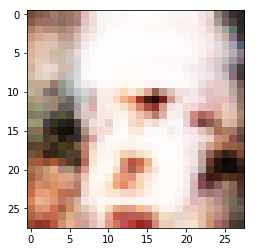

Epoch 1/1... Discriminator Loss: 1.3316... Generator Loss: 0.5449
Epoch 1/1... Discriminator Loss: 1.1788... Generator Loss: 0.7582
Epoch 1/1... Discriminator Loss: 1.1605... Generator Loss: 0.6825
Epoch 1/1... Discriminator Loss: 0.9072... Generator Loss: 1.2146
Epoch 1/1... Discriminator Loss: 1.1497... Generator Loss: 0.6632
Epoch 1/1... Discriminator Loss: 1.5238... Generator Loss: 0.5781
Epoch 1/1... Discriminator Loss: 1.2860... Generator Loss: 0.5306
Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 0.4901
Epoch 1/1... Discriminator Loss: 1.0712... Generator Loss: 0.9774
Epoch 1/1... Discriminator Loss: 1.2143... Generator Loss: 0.9038


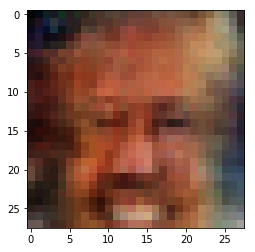

Epoch 1/1... Discriminator Loss: 1.0191... Generator Loss: 0.7991
Epoch 1/1... Discriminator Loss: 1.0108... Generator Loss: 1.3856
Epoch 1/1... Discriminator Loss: 1.2782... Generator Loss: 0.8252
Epoch 1/1... Discriminator Loss: 1.2979... Generator Loss: 0.9214
Epoch 1/1... Discriminator Loss: 1.2938... Generator Loss: 0.7770
Epoch 1/1... Discriminator Loss: 0.9355... Generator Loss: 1.1104
Epoch 1/1... Discriminator Loss: 1.3908... Generator Loss: 0.4848
Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.8739
Epoch 1/1... Discriminator Loss: 1.2535... Generator Loss: 0.6521
Epoch 1/1... Discriminator Loss: 1.3606... Generator Loss: 0.5008


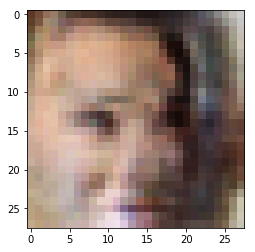

Epoch 1/1... Discriminator Loss: 1.0474... Generator Loss: 1.0481
Epoch 1/1... Discriminator Loss: 1.4757... Generator Loss: 0.4819
Epoch 1/1... Discriminator Loss: 1.1246... Generator Loss: 0.7063
Epoch 1/1... Discriminator Loss: 1.1441... Generator Loss: 0.7758
Epoch 1/1... Discriminator Loss: 1.0479... Generator Loss: 0.8173
Epoch 1/1... Discriminator Loss: 1.5061... Generator Loss: 0.7047
Epoch 1/1... Discriminator Loss: 1.5753... Generator Loss: 0.4163
Epoch 1/1... Discriminator Loss: 1.4744... Generator Loss: 0.6350
Epoch 1/1... Discriminator Loss: 1.2166... Generator Loss: 0.8293
Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 0.4691


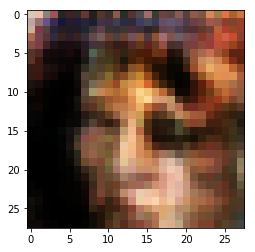

Epoch 1/1... Discriminator Loss: 1.2539... Generator Loss: 0.6891
Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.8026
Epoch 1/1... Discriminator Loss: 1.1523... Generator Loss: 0.7676
Epoch 1/1... Discriminator Loss: 1.2712... Generator Loss: 0.5935
Epoch 1/1... Discriminator Loss: 1.2687... Generator Loss: 0.6565
Epoch 1/1... Discriminator Loss: 1.2150... Generator Loss: 0.6692
Epoch 1/1... Discriminator Loss: 1.4088... Generator Loss: 0.4989
Epoch 1/1... Discriminator Loss: 1.6204... Generator Loss: 0.3767
Epoch 1/1... Discriminator Loss: 1.3200... Generator Loss: 0.7148


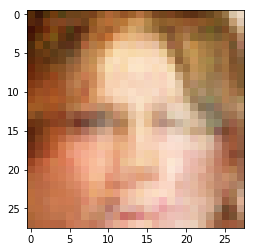

Epoch 1/1... Discriminator Loss: 0.9286... Generator Loss: 0.9242
Epoch 1/1... Discriminator Loss: 1.2235... Generator Loss: 0.6426
Epoch 1/1... Discriminator Loss: 1.0614... Generator Loss: 0.8944
Epoch 1/1... Discriminator Loss: 1.4475... Generator Loss: 0.7496
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.5317
Epoch 1/1... Discriminator Loss: 1.1755... Generator Loss: 0.6681
Epoch 1/1... Discriminator Loss: 1.1232... Generator Loss: 0.8778
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.5583
Epoch 1/1... Discriminator Loss: 1.6084... Generator Loss: 0.4254
Epoch 1/1... Discriminator Loss: 1.5263... Generator Loss: 0.5382


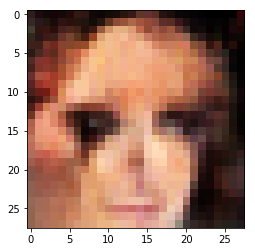

Epoch 1/1... Discriminator Loss: 1.4254... Generator Loss: 0.4712
Epoch 1/1... Discriminator Loss: 1.3071... Generator Loss: 0.6999
Epoch 1/1... Discriminator Loss: 1.3515... Generator Loss: 0.6158
Epoch 1/1... Discriminator Loss: 1.4389... Generator Loss: 0.4960
Epoch 1/1... Discriminator Loss: 1.5693... Generator Loss: 0.6296
Epoch 1/1... Discriminator Loss: 1.5082... Generator Loss: 0.4949
Epoch 1/1... Discriminator Loss: 1.6475... Generator Loss: 0.3933
Epoch 1/1... Discriminator Loss: 1.0355... Generator Loss: 1.0369
Epoch 1/1... Discriminator Loss: 1.2779... Generator Loss: 0.6167
Epoch 1/1... Discriminator Loss: 1.0778... Generator Loss: 0.9610


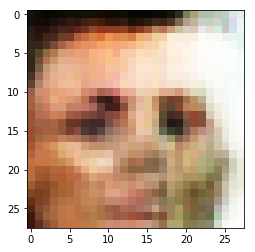

Epoch 1/1... Discriminator Loss: 1.3240... Generator Loss: 0.5300
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.8348
Epoch 1/1... Discriminator Loss: 1.4925... Generator Loss: 0.4876
Epoch 1/1... Discriminator Loss: 1.4158... Generator Loss: 0.6678
Epoch 1/1... Discriminator Loss: 1.2919... Generator Loss: 0.7002
Epoch 1/1... Discriminator Loss: 1.1539... Generator Loss: 0.6778
Epoch 1/1... Discriminator Loss: 1.0477... Generator Loss: 0.8584
Epoch 1/1... Discriminator Loss: 1.2140... Generator Loss: 1.1142
Epoch 1/1... Discriminator Loss: 1.6415... Generator Loss: 0.3965
Epoch 1/1... Discriminator Loss: 1.2666... Generator Loss: 0.7023


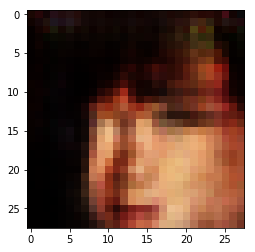

Epoch 1/1... Discriminator Loss: 1.1403... Generator Loss: 0.9806
Epoch 1/1... Discriminator Loss: 1.4237... Generator Loss: 0.5666
Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 0.5270
Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 0.7186
Epoch 1/1... Discriminator Loss: 1.6972... Generator Loss: 0.3470
Epoch 1/1... Discriminator Loss: 1.3426... Generator Loss: 0.6449
Epoch 1/1... Discriminator Loss: 1.4269... Generator Loss: 0.4953
Epoch 1/1... Discriminator Loss: 1.5082... Generator Loss: 0.8700
Epoch 1/1... Discriminator Loss: 1.1088... Generator Loss: 0.7086
Epoch 1/1... Discriminator Loss: 0.9402... Generator Loss: 1.3447


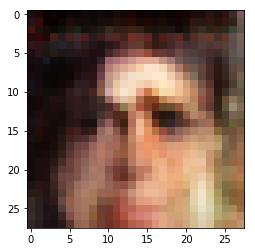

Epoch 1/1... Discriminator Loss: 1.2195... Generator Loss: 0.6553
Epoch 1/1... Discriminator Loss: 1.6823... Generator Loss: 0.4321
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.7527
Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 0.8274
Epoch 1/1... Discriminator Loss: 1.4063... Generator Loss: 0.5595
Epoch 1/1... Discriminator Loss: 1.1308... Generator Loss: 0.8261
Epoch 1/1... Discriminator Loss: 1.1932... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 1.3821... Generator Loss: 0.6145
Epoch 1/1... Discriminator Loss: 1.1386... Generator Loss: 0.7456
Epoch 1/1... Discriminator Loss: 1.3840... Generator Loss: 0.5048


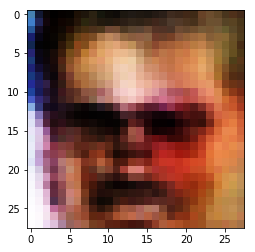

Epoch 1/1... Discriminator Loss: 1.5356... Generator Loss: 0.5078
Epoch 1/1... Discriminator Loss: 1.5557... Generator Loss: 0.4166
Epoch 1/1... Discriminator Loss: 1.2017... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.1593... Generator Loss: 0.7209
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.4926
Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.5982
Epoch 1/1... Discriminator Loss: 1.2070... Generator Loss: 0.6454
Epoch 1/1... Discriminator Loss: 1.3286... Generator Loss: 0.5539
Epoch 1/1... Discriminator Loss: 1.5162... Generator Loss: 0.4621
Epoch 1/1... Discriminator Loss: 1.1682... Generator Loss: 0.7310


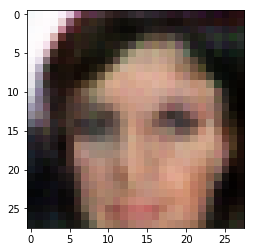

Epoch 1/1... Discriminator Loss: 1.2359... Generator Loss: 0.6486
Epoch 1/1... Discriminator Loss: 1.3493... Generator Loss: 0.5253
Epoch 1/1... Discriminator Loss: 1.5452... Generator Loss: 0.5191
Epoch 1/1... Discriminator Loss: 1.3237... Generator Loss: 0.5539
Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.3214... Generator Loss: 0.6726
Epoch 1/1... Discriminator Loss: 1.2111... Generator Loss: 0.6261
Epoch 1/1... Discriminator Loss: 1.6254... Generator Loss: 0.4255
Epoch 1/1... Discriminator Loss: 1.1612... Generator Loss: 0.7013
Epoch 1/1... Discriminator Loss: 1.3248... Generator Loss: 0.6758


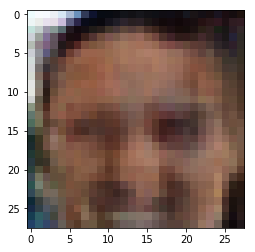

Epoch 1/1... Discriminator Loss: 1.0463... Generator Loss: 0.9699
Epoch 1/1... Discriminator Loss: 1.1066... Generator Loss: 0.7692
Epoch 1/1... Discriminator Loss: 1.5688... Generator Loss: 0.5837
Epoch 1/1... Discriminator Loss: 1.1559... Generator Loss: 0.7443
Epoch 1/1... Discriminator Loss: 1.2312... Generator Loss: 1.0126
Epoch 1/1... Discriminator Loss: 1.1977... Generator Loss: 0.9268
Epoch 1/1... Discriminator Loss: 1.2306... Generator Loss: 0.7334
Epoch 1/1... Discriminator Loss: 1.5021... Generator Loss: 0.5989
Epoch 1/1... Discriminator Loss: 1.5296... Generator Loss: 0.4399
Epoch 1/1... Discriminator Loss: 1.3544... Generator Loss: 0.5683


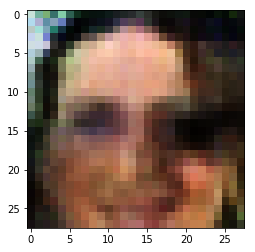

Epoch 1/1... Discriminator Loss: 1.4361... Generator Loss: 0.5198
Epoch 1/1... Discriminator Loss: 1.4887... Generator Loss: 0.4855
Epoch 1/1... Discriminator Loss: 1.2984... Generator Loss: 0.8242
Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.8520
Epoch 1/1... Discriminator Loss: 0.9588... Generator Loss: 1.1914
Epoch 1/1... Discriminator Loss: 1.4343... Generator Loss: 0.5304
Epoch 1/1... Discriminator Loss: 1.7313... Generator Loss: 0.4070
Epoch 1/1... Discriminator Loss: 1.4394... Generator Loss: 0.5315
Epoch 1/1... Discriminator Loss: 1.6228... Generator Loss: 0.5389
Epoch 1/1... Discriminator Loss: 1.4778... Generator Loss: 0.5717


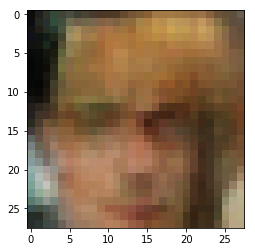

Epoch 1/1... Discriminator Loss: 1.3298... Generator Loss: 0.6519
Epoch 1/1... Discriminator Loss: 1.1195... Generator Loss: 1.0416
Epoch 1/1... Discriminator Loss: 1.5191... Generator Loss: 0.4373
Epoch 1/1... Discriminator Loss: 1.4484... Generator Loss: 0.8595
Epoch 1/1... Discriminator Loss: 1.3405... Generator Loss: 0.6696
Epoch 1/1... Discriminator Loss: 1.6907... Generator Loss: 0.3780
Epoch 1/1... Discriminator Loss: 1.3653... Generator Loss: 0.6036
Epoch 1/1... Discriminator Loss: 1.0177... Generator Loss: 0.8623
Epoch 1/1... Discriminator Loss: 1.1302... Generator Loss: 0.8310
Epoch 1/1... Discriminator Loss: 1.3007... Generator Loss: 0.7144


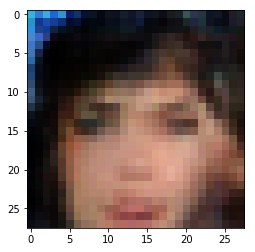

Epoch 1/1... Discriminator Loss: 0.8035... Generator Loss: 1.3705
Epoch 1/1... Discriminator Loss: 1.3967... Generator Loss: 0.6814
Epoch 1/1... Discriminator Loss: 1.1618... Generator Loss: 0.8652
Epoch 1/1... Discriminator Loss: 1.3011... Generator Loss: 0.6879
Epoch 1/1... Discriminator Loss: 1.2083... Generator Loss: 0.8385
Epoch 1/1... Discriminator Loss: 1.2048... Generator Loss: 0.9783
Epoch 1/1... Discriminator Loss: 1.4585... Generator Loss: 0.4730
Epoch 1/1... Discriminator Loss: 1.4777... Generator Loss: 0.4888
Epoch 1/1... Discriminator Loss: 1.1407... Generator Loss: 0.7007
Epoch 1/1... Discriminator Loss: 1.4915... Generator Loss: 0.7192


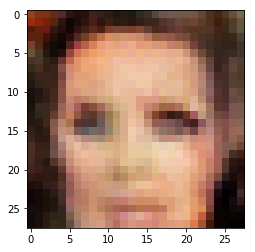

Epoch 1/1... Discriminator Loss: 0.9186... Generator Loss: 1.0530
Epoch 1/1... Discriminator Loss: 1.2515... Generator Loss: 1.0904
Epoch 1/1... Discriminator Loss: 1.2085... Generator Loss: 0.8138
Epoch 1/1... Discriminator Loss: 1.3380... Generator Loss: 0.5490
Epoch 1/1... Discriminator Loss: 1.6143... Generator Loss: 0.4952
Epoch 1/1... Discriminator Loss: 1.6046... Generator Loss: 0.7871
Epoch 1/1... Discriminator Loss: 1.2351... Generator Loss: 0.6550
Epoch 1/1... Discriminator Loss: 1.2637... Generator Loss: 0.5547
Epoch 1/1... Discriminator Loss: 1.3244... Generator Loss: 0.6428
Epoch 1/1... Discriminator Loss: 1.7848... Generator Loss: 0.2961


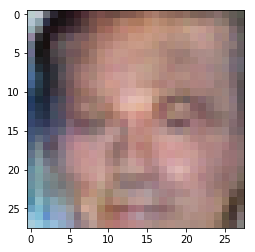

Epoch 1/1... Discriminator Loss: 1.3186... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.0801... Generator Loss: 0.8143
Epoch 1/1... Discriminator Loss: 1.3952... Generator Loss: 1.0796
Epoch 1/1... Discriminator Loss: 1.3516... Generator Loss: 0.5899
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.6917
Epoch 1/1... Discriminator Loss: 1.2299... Generator Loss: 0.6990
Epoch 1/1... Discriminator Loss: 1.0230... Generator Loss: 0.9458
Epoch 1/1... Discriminator Loss: 1.2115... Generator Loss: 0.8918
Epoch 1/1... Discriminator Loss: 1.2060... Generator Loss: 0.7981
Epoch 1/1... Discriminator Loss: 1.1260... Generator Loss: 1.0410


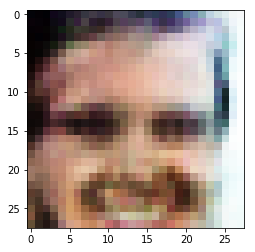

Epoch 1/1... Discriminator Loss: 1.5467... Generator Loss: 0.4301
Epoch 1/1... Discriminator Loss: 1.2342... Generator Loss: 0.6700
Epoch 1/1... Discriminator Loss: 1.1919... Generator Loss: 0.7696
Epoch 1/1... Discriminator Loss: 1.5224... Generator Loss: 0.4701
Epoch 1/1... Discriminator Loss: 1.3065... Generator Loss: 0.6482
Epoch 1/1... Discriminator Loss: 1.3473... Generator Loss: 0.8233
Epoch 1/1... Discriminator Loss: 1.4359... Generator Loss: 0.5477
Epoch 1/1... Discriminator Loss: 1.5762... Generator Loss: 0.4393
Epoch 1/1... Discriminator Loss: 1.4217... Generator Loss: 0.4945
Epoch 1/1... Discriminator Loss: 1.8345... Generator Loss: 0.4084


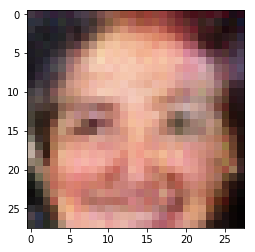

Epoch 1/1... Discriminator Loss: 1.2394... Generator Loss: 0.8591
Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 0.7551
Epoch 1/1... Discriminator Loss: 1.5977... Generator Loss: 0.4955
Epoch 1/1... Discriminator Loss: 0.8221... Generator Loss: 1.3407
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.5801
Epoch 1/1... Discriminator Loss: 1.4925... Generator Loss: 0.5779
Epoch 1/1... Discriminator Loss: 1.4456... Generator Loss: 0.4820
Epoch 1/1... Discriminator Loss: 0.9193... Generator Loss: 1.1697
Epoch 1/1... Discriminator Loss: 1.0029... Generator Loss: 0.9576


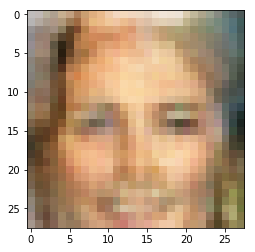

Epoch 1/1... Discriminator Loss: 1.4114... Generator Loss: 0.8016
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.8458
Epoch 1/1... Discriminator Loss: 1.2212... Generator Loss: 0.7488
Epoch 1/1... Discriminator Loss: 1.2975... Generator Loss: 1.0453
Epoch 1/1... Discriminator Loss: 1.1736... Generator Loss: 0.7364
Epoch 1/1... Discriminator Loss: 1.4761... Generator Loss: 0.5369
Epoch 1/1... Discriminator Loss: 1.2765... Generator Loss: 0.7997
Epoch 1/1... Discriminator Loss: 1.5028... Generator Loss: 0.4511
Epoch 1/1... Discriminator Loss: 1.3422... Generator Loss: 0.5542
Epoch 1/1... Discriminator Loss: 1.3290... Generator Loss: 0.5639


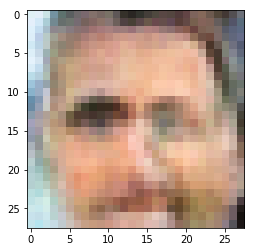

Epoch 1/1... Discriminator Loss: 1.4527... Generator Loss: 0.6420
Epoch 1/1... Discriminator Loss: 1.4291... Generator Loss: 0.6747
Epoch 1/1... Discriminator Loss: 1.1694... Generator Loss: 0.7260
Epoch 1/1... Discriminator Loss: 1.3357... Generator Loss: 0.6382
Epoch 1/1... Discriminator Loss: 1.3274... Generator Loss: 0.6834
Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.5935
Epoch 1/1... Discriminator Loss: 1.2125... Generator Loss: 0.7146
Epoch 1/1... Discriminator Loss: 1.3694... Generator Loss: 0.5500
Epoch 1/1... Discriminator Loss: 1.5207... Generator Loss: 0.4522
Epoch 1/1... Discriminator Loss: 1.2037... Generator Loss: 0.6996


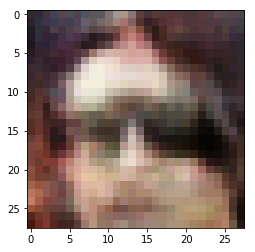

Epoch 1/1... Discriminator Loss: 1.3251... Generator Loss: 0.9667
Epoch 1/1... Discriminator Loss: 1.2392... Generator Loss: 0.7323
Epoch 1/1... Discriminator Loss: 1.1678... Generator Loss: 0.9539
Epoch 1/1... Discriminator Loss: 1.2330... Generator Loss: 0.8592
Epoch 1/1... Discriminator Loss: 1.3368... Generator Loss: 0.6443
Epoch 1/1... Discriminator Loss: 1.0625... Generator Loss: 0.8409
Epoch 1/1... Discriminator Loss: 1.4152... Generator Loss: 0.5482
Epoch 1/1... Discriminator Loss: 1.1542... Generator Loss: 0.8462
Epoch 1/1... Discriminator Loss: 1.3072... Generator Loss: 0.8159
Epoch 1/1... Discriminator Loss: 1.1576... Generator Loss: 0.7011


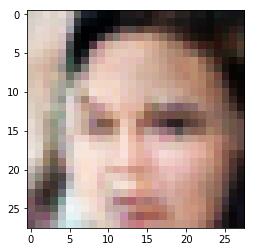

Epoch 1/1... Discriminator Loss: 1.4122... Generator Loss: 0.6263
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.7161
Epoch 1/1... Discriminator Loss: 1.2177... Generator Loss: 0.6546
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.5739
Epoch 1/1... Discriminator Loss: 1.6703... Generator Loss: 0.3880
Epoch 1/1... Discriminator Loss: 1.2752... Generator Loss: 0.7770
Epoch 1/1... Discriminator Loss: 1.2739... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.0247... Generator Loss: 1.0226
Epoch 1/1... Discriminator Loss: 1.4990... Generator Loss: 0.5866
Epoch 1/1... Discriminator Loss: 1.1189... Generator Loss: 0.8959


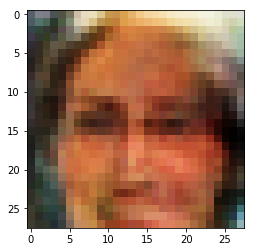

Epoch 1/1... Discriminator Loss: 1.4415... Generator Loss: 0.8354
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 1.3185... Generator Loss: 0.5221
Epoch 1/1... Discriminator Loss: 1.4357... Generator Loss: 0.6078
Epoch 1/1... Discriminator Loss: 1.1058... Generator Loss: 0.7436
Epoch 1/1... Discriminator Loss: 1.5159... Generator Loss: 0.4724
Epoch 1/1... Discriminator Loss: 1.6269... Generator Loss: 0.4579
Epoch 1/1... Discriminator Loss: 1.4314... Generator Loss: 0.8063
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 1.8541... Generator Loss: 0.4537


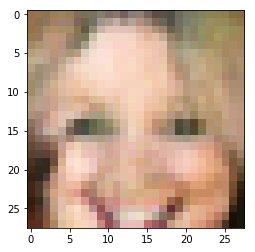

Epoch 1/1... Discriminator Loss: 1.3001... Generator Loss: 0.6456
Epoch 1/1... Discriminator Loss: 1.2742... Generator Loss: 0.8706
Epoch 1/1... Discriminator Loss: 1.4349... Generator Loss: 0.6748
Epoch 1/1... Discriminator Loss: 1.5250... Generator Loss: 0.4202
Epoch 1/1... Discriminator Loss: 1.2563... Generator Loss: 0.7861
Epoch 1/1... Discriminator Loss: 1.5161... Generator Loss: 0.4661
Epoch 1/1... Discriminator Loss: 1.2289... Generator Loss: 0.6285
Epoch 1/1... Discriminator Loss: 1.2158... Generator Loss: 0.7380
Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.5732
Epoch 1/1... Discriminator Loss: 1.2595... Generator Loss: 0.6878


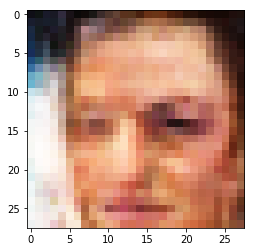

Epoch 1/1... Discriminator Loss: 1.3551... Generator Loss: 0.5961
Epoch 1/1... Discriminator Loss: 1.5409... Generator Loss: 0.8784
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.6093
Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 0.7057
Epoch 1/1... Discriminator Loss: 0.9523... Generator Loss: 1.0838
Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.6573
Epoch 1/1... Discriminator Loss: 1.2336... Generator Loss: 0.7595
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.5072
Epoch 1/1... Discriminator Loss: 1.3443... Generator Loss: 0.8812
Epoch 1/1... Discriminator Loss: 1.2046... Generator Loss: 0.8044


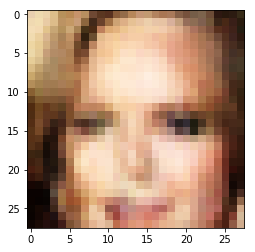

Epoch 1/1... Discriminator Loss: 1.4821... Generator Loss: 0.5178
Epoch 1/1... Discriminator Loss: 1.2572... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.1616... Generator Loss: 0.8147
Epoch 1/1... Discriminator Loss: 1.2305... Generator Loss: 0.5623
Epoch 1/1... Discriminator Loss: 1.0781... Generator Loss: 0.9373
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.3668... Generator Loss: 0.5504
Epoch 1/1... Discriminator Loss: 1.2080... Generator Loss: 1.0122
Epoch 1/1... Discriminator Loss: 1.2154... Generator Loss: 0.8445
Epoch 1/1... Discriminator Loss: 1.7236... Generator Loss: 0.3784


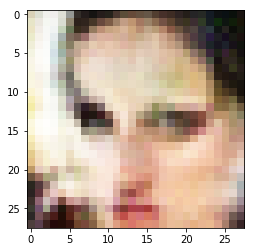

Epoch 1/1... Discriminator Loss: 1.6048... Generator Loss: 0.5536
Epoch 1/1... Discriminator Loss: 1.3577... Generator Loss: 0.5884
Epoch 1/1... Discriminator Loss: 1.5688... Generator Loss: 0.5727
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.5287
Epoch 1/1... Discriminator Loss: 1.3006... Generator Loss: 0.7957
Epoch 1/1... Discriminator Loss: 1.1678... Generator Loss: 0.8198
Epoch 1/1... Discriminator Loss: 1.5333... Generator Loss: 0.4414
Epoch 1/1... Discriminator Loss: 1.2510... Generator Loss: 0.6554
Epoch 1/1... Discriminator Loss: 1.2542... Generator Loss: 0.8739
Epoch 1/1... Discriminator Loss: 1.2258... Generator Loss: 0.7070


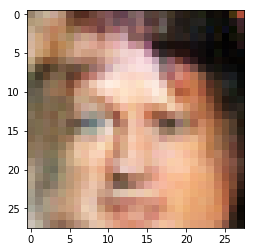

Epoch 1/1... Discriminator Loss: 1.2978... Generator Loss: 0.9134
Epoch 1/1... Discriminator Loss: 1.4263... Generator Loss: 0.5432
Epoch 1/1... Discriminator Loss: 0.9752... Generator Loss: 1.0336
Epoch 1/1... Discriminator Loss: 1.5432... Generator Loss: 0.5543
Epoch 1/1... Discriminator Loss: 1.2659... Generator Loss: 0.7955
Epoch 1/1... Discriminator Loss: 1.1044... Generator Loss: 0.7646
Epoch 1/1... Discriminator Loss: 1.3040... Generator Loss: 0.7297
Epoch 1/1... Discriminator Loss: 1.7163... Generator Loss: 0.4004
Epoch 1/1... Discriminator Loss: 1.3673... Generator Loss: 0.5809
Epoch 1/1... Discriminator Loss: 1.0792... Generator Loss: 0.8935


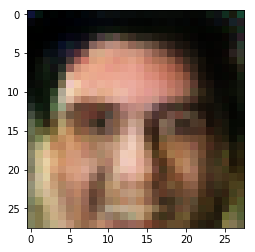

Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.6443
Epoch 1/1... Discriminator Loss: 1.3688... Generator Loss: 0.5229
Epoch 1/1... Discriminator Loss: 1.3635... Generator Loss: 0.5370
Epoch 1/1... Discriminator Loss: 1.6651... Generator Loss: 0.4585
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.5407
Epoch 1/1... Discriminator Loss: 1.0987... Generator Loss: 0.7768
Epoch 1/1... Discriminator Loss: 1.3652... Generator Loss: 0.6431
Epoch 1/1... Discriminator Loss: 1.2160... Generator Loss: 0.9289
Epoch 1/1... Discriminator Loss: 1.5944... Generator Loss: 0.7059
Epoch 1/1... Discriminator Loss: 1.6379... Generator Loss: 0.5937


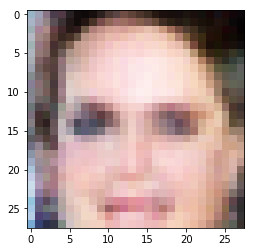

Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 0.6021
Epoch 1/1... Discriminator Loss: 1.4675... Generator Loss: 0.5398
Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.6035
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.6858
Epoch 1/1... Discriminator Loss: 1.2840... Generator Loss: 0.6747
Epoch 1/1... Discriminator Loss: 1.2793... Generator Loss: 0.6508
Epoch 1/1... Discriminator Loss: 1.2905... Generator Loss: 0.8509
Epoch 1/1... Discriminator Loss: 1.1364... Generator Loss: 0.8908
Epoch 1/1... Discriminator Loss: 1.2431... Generator Loss: 0.7315
Epoch 1/1... Discriminator Loss: 1.3726... Generator Loss: 0.6051


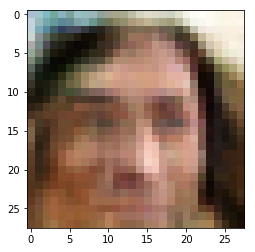

Epoch 1/1... Discriminator Loss: 1.1372... Generator Loss: 0.8450
Epoch 1/1... Discriminator Loss: 1.1363... Generator Loss: 0.9255
Epoch 1/1... Discriminator Loss: 1.2708... Generator Loss: 0.8824
Epoch 1/1... Discriminator Loss: 1.2858... Generator Loss: 0.6363
Epoch 1/1... Discriminator Loss: 1.5284... Generator Loss: 0.6233
Epoch 1/1... Discriminator Loss: 1.5234... Generator Loss: 0.6207
Epoch 1/1... Discriminator Loss: 1.3495... Generator Loss: 0.7183
Epoch 1/1... Discriminator Loss: 1.1770... Generator Loss: 0.9173
Epoch 1/1... Discriminator Loss: 1.2703... Generator Loss: 0.7107
Epoch 1/1... Discriminator Loss: 0.8335... Generator Loss: 1.1673


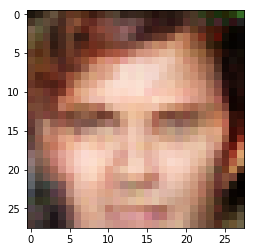

Epoch 1/1... Discriminator Loss: 1.1757... Generator Loss: 0.6816
Epoch 1/1... Discriminator Loss: 1.4506... Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 1.6301... Generator Loss: 0.4961
Epoch 1/1... Discriminator Loss: 1.3506... Generator Loss: 0.6476
Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.5580
Epoch 1/1... Discriminator Loss: 1.0812... Generator Loss: 1.0740
Epoch 1/1... Discriminator Loss: 1.1260... Generator Loss: 0.7481
Epoch 1/1... Discriminator Loss: 1.2583... Generator Loss: 0.6221
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 0.8242
Epoch 1/1... Discriminator Loss: 1.5297... Generator Loss: 0.5350


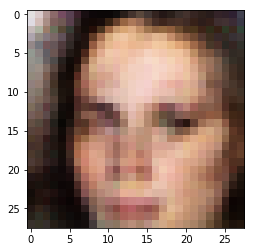

Epoch 1/1... Discriminator Loss: 1.4972... Generator Loss: 0.6829
Epoch 1/1... Discriminator Loss: 1.4242... Generator Loss: 0.5540
Epoch 1/1... Discriminator Loss: 1.1595... Generator Loss: 0.9898
Epoch 1/1... Discriminator Loss: 1.2548... Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 1.4569... Generator Loss: 0.4753
Epoch 1/1... Discriminator Loss: 1.2718... Generator Loss: 0.6690
Epoch 1/1... Discriminator Loss: 1.2657... Generator Loss: 0.8538
Epoch 1/1... Discriminator Loss: 1.4856... Generator Loss: 0.5772
Epoch 1/1... Discriminator Loss: 1.4499... Generator Loss: 0.7618
Epoch 1/1... Discriminator Loss: 1.1843... Generator Loss: 0.6744


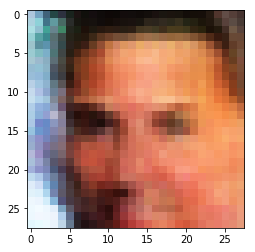

Epoch 1/1... Discriminator Loss: 1.3356... Generator Loss: 0.5660
Epoch 1/1... Discriminator Loss: 1.4780... Generator Loss: 0.5588
Epoch 1/1... Discriminator Loss: 1.0831... Generator Loss: 0.9223
Epoch 1/1... Discriminator Loss: 1.7852... Generator Loss: 0.4086
Epoch 1/1... Discriminator Loss: 1.3775... Generator Loss: 0.5850
Epoch 1/1... Discriminator Loss: 1.1409... Generator Loss: 0.7631
Epoch 1/1... Discriminator Loss: 1.3914... Generator Loss: 0.6337
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.5381
Epoch 1/1... Discriminator Loss: 1.2617... Generator Loss: 0.6548
Epoch 1/1... Discriminator Loss: 0.9945... Generator Loss: 1.0428


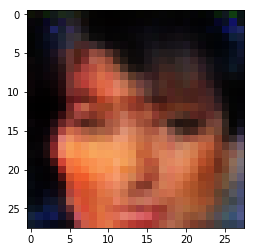

Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 0.5933
Epoch 1/1... Discriminator Loss: 1.5692... Generator Loss: 0.5655
Epoch 1/1... Discriminator Loss: 1.2604... Generator Loss: 0.6263
Epoch 1/1... Discriminator Loss: 1.5364... Generator Loss: 0.4411
Epoch 1/1... Discriminator Loss: 1.1793... Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 1.2468... Generator Loss: 0.6306
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.5736
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.6404
Epoch 1/1... Discriminator Loss: 1.4656... Generator Loss: 0.6124
Epoch 1/1... Discriminator Loss: 1.3849... Generator Loss: 0.5744


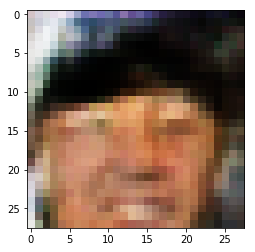

Epoch 1/1... Discriminator Loss: 1.0963... Generator Loss: 0.7534
Epoch 1/1... Discriminator Loss: 0.9803... Generator Loss: 1.0210
Epoch 1/1... Discriminator Loss: 1.3976... Generator Loss: 0.5679
Epoch 1/1... Discriminator Loss: 1.1099... Generator Loss: 0.8339
Epoch 1/1... Discriminator Loss: 1.5339... Generator Loss: 0.7975
Epoch 1/1... Discriminator Loss: 1.0880... Generator Loss: 0.8544
Epoch 1/1... Discriminator Loss: 1.4678... Generator Loss: 0.4537
Epoch 1/1... Discriminator Loss: 1.3015... Generator Loss: 0.6984
Epoch 1/1... Discriminator Loss: 0.8922... Generator Loss: 1.0488
Epoch 1/1... Discriminator Loss: 0.9625... Generator Loss: 1.0411


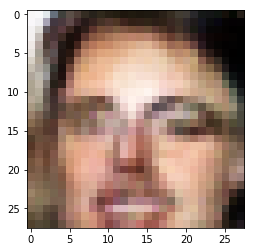

Epoch 1/1... Discriminator Loss: 1.2965... Generator Loss: 0.5759
Epoch 1/1... Discriminator Loss: 1.4219... Generator Loss: 0.5829
Epoch 1/1... Discriminator Loss: 1.4491... Generator Loss: 0.6415
Epoch 1/1... Discriminator Loss: 1.4581... Generator Loss: 0.5634
Epoch 1/1... Discriminator Loss: 1.1429... Generator Loss: 0.8281
Epoch 1/1... Discriminator Loss: 1.2596... Generator Loss: 0.7786
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.6551
Epoch 1/1... Discriminator Loss: 1.0476... Generator Loss: 0.8108
Epoch 1/1... Discriminator Loss: 1.3675... Generator Loss: 0.5443
Epoch 1/1... Discriminator Loss: 1.2919... Generator Loss: 0.7599


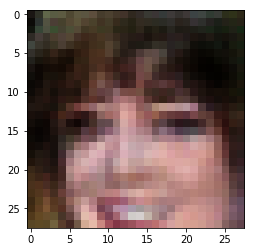

Epoch 1/1... Discriminator Loss: 1.2838... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 1.3017... Generator Loss: 0.7449
Epoch 1/1... Discriminator Loss: 1.2796... Generator Loss: 0.6628
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 0.4392
Epoch 1/1... Discriminator Loss: 1.5171... Generator Loss: 0.5821
Epoch 1/1... Discriminator Loss: 1.5209... Generator Loss: 0.4744
Epoch 1/1... Discriminator Loss: 1.2316... Generator Loss: 0.6987
Epoch 1/1... Discriminator Loss: 1.2664... Generator Loss: 0.6741
Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.5888
Epoch 1/1... Discriminator Loss: 0.8092... Generator Loss: 1.3918


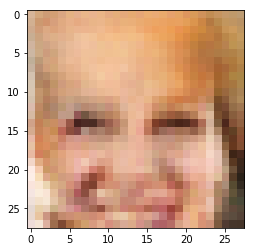

Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.8015
Epoch 1/1... Discriminator Loss: 1.1682... Generator Loss: 0.6959
Epoch 1/1... Discriminator Loss: 1.3507... Generator Loss: 0.5630
Epoch 1/1... Discriminator Loss: 1.1012... Generator Loss: 0.9247
Epoch 1/1... Discriminator Loss: 1.0448... Generator Loss: 0.8715
Epoch 1/1... Discriminator Loss: 1.3511... Generator Loss: 0.6380
Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 0.5908
Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.7005
Epoch 1/1... Discriminator Loss: 1.4726... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 1.2141... Generator Loss: 0.9735


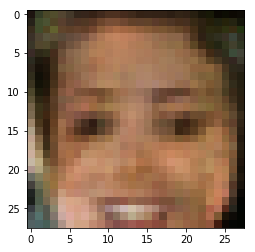

Epoch 1/1... Discriminator Loss: 1.1813... Generator Loss: 0.6802
Epoch 1/1... Discriminator Loss: 1.1353... Generator Loss: 0.7382
Epoch 1/1... Discriminator Loss: 1.2833... Generator Loss: 0.6206
Epoch 1/1... Discriminator Loss: 1.4168... Generator Loss: 0.5226
Epoch 1/1... Discriminator Loss: 1.4316... Generator Loss: 0.6041
Epoch 1/1... Discriminator Loss: 1.2957... Generator Loss: 0.7430
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.5477
Epoch 1/1... Discriminator Loss: 1.4323... Generator Loss: 0.5844
Epoch 1/1... Discriminator Loss: 1.3060... Generator Loss: 0.7376
Epoch 1/1... Discriminator Loss: 1.2832... Generator Loss: 0.8106


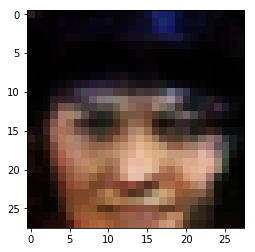

Epoch 1/1... Discriminator Loss: 1.1460... Generator Loss: 1.0506
Epoch 1/1... Discriminator Loss: 1.3242... Generator Loss: 0.6410
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.5067
Epoch 1/1... Discriminator Loss: 1.4884... Generator Loss: 0.4497
Epoch 1/1... Discriminator Loss: 1.1704... Generator Loss: 0.7302
Epoch 1/1... Discriminator Loss: 1.1378... Generator Loss: 0.8712
Epoch 1/1... Discriminator Loss: 1.2902... Generator Loss: 0.6162
Epoch 1/1... Discriminator Loss: 1.5441... Generator Loss: 0.5380
Epoch 1/1... Discriminator Loss: 1.1604... Generator Loss: 0.6748
Epoch 1/1... Discriminator Loss: 1.5037... Generator Loss: 0.5192


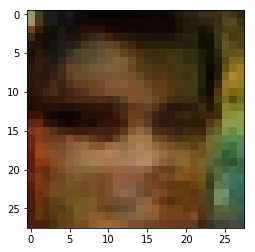

Epoch 1/1... Discriminator Loss: 1.4082... Generator Loss: 0.6689
Epoch 1/1... Discriminator Loss: 1.4610... Generator Loss: 0.5596
Epoch 1/1... Discriminator Loss: 1.5975... Generator Loss: 0.4125
Epoch 1/1... Discriminator Loss: 1.1928... Generator Loss: 0.7283
Epoch 1/1... Discriminator Loss: 1.2611... Generator Loss: 0.7207
Epoch 1/1... Discriminator Loss: 1.2345... Generator Loss: 0.7190
Epoch 1/1... Discriminator Loss: 1.2090... Generator Loss: 0.7986
Epoch 1/1... Discriminator Loss: 1.5437... Generator Loss: 0.4020
Epoch 1/1... Discriminator Loss: 1.1639... Generator Loss: 0.7547
Epoch 1/1... Discriminator Loss: 1.4943... Generator Loss: 0.6519


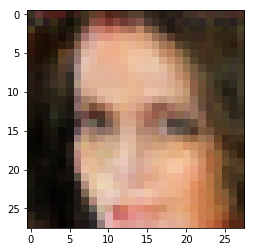

Epoch 1/1... Discriminator Loss: 1.2637... Generator Loss: 0.8115
Epoch 1/1... Discriminator Loss: 1.6641... Generator Loss: 0.4965
Epoch 1/1... Discriminator Loss: 1.3019... Generator Loss: 0.6713
Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 0.7399
Epoch 1/1... Discriminator Loss: 1.2186... Generator Loss: 0.7134
Epoch 1/1... Discriminator Loss: 1.7405... Generator Loss: 0.4224
Epoch 1/1... Discriminator Loss: 1.2349... Generator Loss: 0.6251
Epoch 1/1... Discriminator Loss: 1.2070... Generator Loss: 0.6621
Epoch 1/1... Discriminator Loss: 1.4843... Generator Loss: 0.6237
Epoch 1/1... Discriminator Loss: 1.1128... Generator Loss: 0.8359


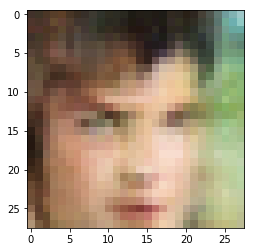

Epoch 1/1... Discriminator Loss: 1.3680... Generator Loss: 0.5715
Epoch 1/1... Discriminator Loss: 1.5297... Generator Loss: 0.4562
Epoch 1/1... Discriminator Loss: 1.3565... Generator Loss: 0.6041
Epoch 1/1... Discriminator Loss: 1.0212... Generator Loss: 0.9611
Epoch 1/1... Discriminator Loss: 1.8438... Generator Loss: 0.4682
Epoch 1/1... Discriminator Loss: 0.9244... Generator Loss: 1.0948
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.5367
Epoch 1/1... Discriminator Loss: 1.1881... Generator Loss: 0.7134
Epoch 1/1... Discriminator Loss: 1.2362... Generator Loss: 0.6478
Epoch 1/1... Discriminator Loss: 1.6807... Generator Loss: 0.5430


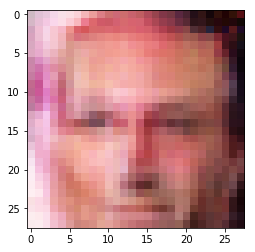

Epoch 1/1... Discriminator Loss: 1.3087... Generator Loss: 0.6464
Epoch 1/1... Discriminator Loss: 1.3065... Generator Loss: 0.8156
Epoch 1/1... Discriminator Loss: 1.4514... Generator Loss: 0.5076
Epoch 1/1... Discriminator Loss: 1.2490... Generator Loss: 0.7397
Epoch 1/1... Discriminator Loss: 1.2243... Generator Loss: 0.6272
Epoch 1/1... Discriminator Loss: 1.1376... Generator Loss: 0.7887
Epoch 1/1... Discriminator Loss: 1.1908... Generator Loss: 0.8473
Epoch 1/1... Discriminator Loss: 1.3856... Generator Loss: 0.5648
Epoch 1/1... Discriminator Loss: 1.0851... Generator Loss: 0.9638
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 0.7704


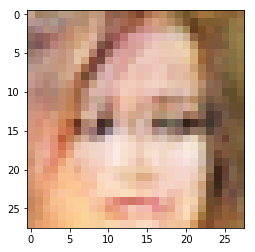

Epoch 1/1... Discriminator Loss: 1.6237... Generator Loss: 0.5216
Epoch 1/1... Discriminator Loss: 1.0967... Generator Loss: 0.8474
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.5321
Epoch 1/1... Discriminator Loss: 1.4094... Generator Loss: 0.6138
Epoch 1/1... Discriminator Loss: 1.2878... Generator Loss: 0.6269
Epoch 1/1... Discriminator Loss: 1.2917... Generator Loss: 0.5878
Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 0.6816
Epoch 1/1... Discriminator Loss: 1.0714... Generator Loss: 0.7600
Epoch 1/1... Discriminator Loss: 1.4504... Generator Loss: 0.4933
Epoch 1/1... Discriminator Loss: 1.2887... Generator Loss: 0.7088


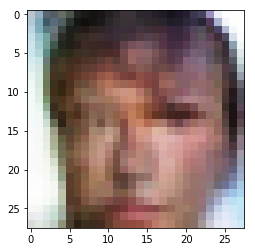

Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.5431
Epoch 1/1... Discriminator Loss: 1.1933... Generator Loss: 0.6153
Epoch 1/1... Discriminator Loss: 1.4713... Generator Loss: 0.4973
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.1990... Generator Loss: 0.7219
Epoch 1/1... Discriminator Loss: 1.0803... Generator Loss: 0.9265
Epoch 1/1... Discriminator Loss: 1.4092... Generator Loss: 0.8125
Epoch 1/1... Discriminator Loss: 1.1546... Generator Loss: 1.1331
Epoch 1/1... Discriminator Loss: 0.9960... Generator Loss: 1.0224
Epoch 1/1... Discriminator Loss: 1.5162... Generator Loss: 0.5163


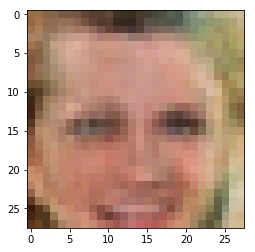

Epoch 1/1... Discriminator Loss: 1.2710... Generator Loss: 0.6145
Epoch 1/1... Discriminator Loss: 1.3313... Generator Loss: 0.6536
Epoch 1/1... Discriminator Loss: 1.4534... Generator Loss: 0.5404
Epoch 1/1... Discriminator Loss: 1.2734... Generator Loss: 0.7157
Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 0.7546
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.6066
Epoch 1/1... Discriminator Loss: 1.3983... Generator Loss: 0.6090
Epoch 1/1... Discriminator Loss: 1.4324... Generator Loss: 0.5550
Epoch 1/1... Discriminator Loss: 1.4465... Generator Loss: 0.7195
Epoch 1/1... Discriminator Loss: 1.0333... Generator Loss: 0.9460


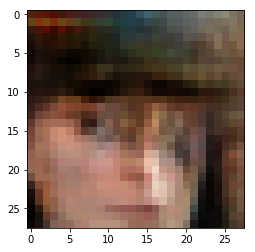

Epoch 1/1... Discriminator Loss: 1.5601... Generator Loss: 0.5488
Epoch 1/1... Discriminator Loss: 1.1003... Generator Loss: 0.8756
Epoch 1/1... Discriminator Loss: 1.4141... Generator Loss: 0.6322
Epoch 1/1... Discriminator Loss: 1.6478... Generator Loss: 0.6296
Epoch 1/1... Discriminator Loss: 1.2981... Generator Loss: 0.6002
Epoch 1/1... Discriminator Loss: 1.2307... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.1704... Generator Loss: 0.8156
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.5775
Epoch 1/1... Discriminator Loss: 1.2241... Generator Loss: 0.6609
Epoch 1/1... Discriminator Loss: 1.4570... Generator Loss: 0.5307


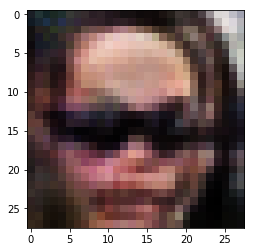

Epoch 1/1... Discriminator Loss: 1.2282... Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.2619... Generator Loss: 0.6631
Epoch 1/1... Discriminator Loss: 0.7637... Generator Loss: 1.2613
Epoch 1/1... Discriminator Loss: 1.6945... Generator Loss: 0.4844
Epoch 1/1... Discriminator Loss: 1.1830... Generator Loss: 0.8084
Epoch 1/1... Discriminator Loss: 1.2684... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 1.1027... Generator Loss: 0.8009
Epoch 1/1... Discriminator Loss: 0.8584... Generator Loss: 1.1044
Epoch 1/1... Discriminator Loss: 1.3991... Generator Loss: 0.5726
Epoch 1/1... Discriminator Loss: 1.1003... Generator Loss: 0.7299


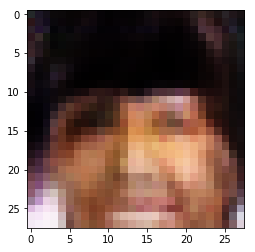

Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.5486
Epoch 1/1... Discriminator Loss: 1.4079... Generator Loss: 0.6083
Epoch 1/1... Discriminator Loss: 1.2010... Generator Loss: 0.7564
Epoch 1/1... Discriminator Loss: 1.1145... Generator Loss: 0.7823
Epoch 1/1... Discriminator Loss: 1.6713... Generator Loss: 0.4314
Epoch 1/1... Discriminator Loss: 1.3209... Generator Loss: 0.7119
Epoch 1/1... Discriminator Loss: 1.0925... Generator Loss: 0.9133
Epoch 1/1... Discriminator Loss: 1.6289... Generator Loss: 0.4459
Epoch 1/1... Discriminator Loss: 1.2589... Generator Loss: 0.7243
Epoch 1/1... Discriminator Loss: 1.5038... Generator Loss: 0.5275


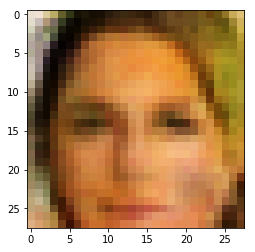

Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 0.6042
Epoch 1/1... Discriminator Loss: 1.3184... Generator Loss: 0.5916
Epoch 1/1... Discriminator Loss: 1.3101... Generator Loss: 0.7934
Epoch 1/1... Discriminator Loss: 1.3871... Generator Loss: 0.5705
Epoch 1/1... Discriminator Loss: 1.3265... Generator Loss: 0.6451
Epoch 1/1... Discriminator Loss: 1.1439... Generator Loss: 0.8600
Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.6192
Epoch 1/1... Discriminator Loss: 1.3759... Generator Loss: 0.7517
Epoch 1/1... Discriminator Loss: 1.2795... Generator Loss: 0.7584
Epoch 1/1... Discriminator Loss: 1.4304... Generator Loss: 0.5595


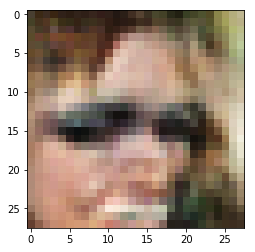

Epoch 1/1... Discriminator Loss: 1.4638... Generator Loss: 0.6550
Epoch 1/1... Discriminator Loss: 1.1181... Generator Loss: 0.9770
Epoch 1/1... Discriminator Loss: 1.0950... Generator Loss: 0.7879
Epoch 1/1... Discriminator Loss: 1.4383... Generator Loss: 0.5486
Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 0.6360
Epoch 1/1... Discriminator Loss: 1.4560... Generator Loss: 0.6084
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.4811... Generator Loss: 0.5880
Epoch 1/1... Discriminator Loss: 1.2185... Generator Loss: 0.8410
Epoch 1/1... Discriminator Loss: 0.9400... Generator Loss: 1.1392


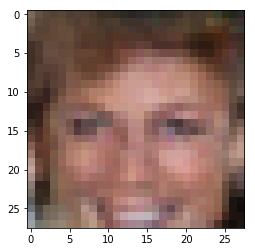

Epoch 1/1... Discriminator Loss: 0.8863... Generator Loss: 1.1048
Epoch 1/1... Discriminator Loss: 1.2414... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.4139... Generator Loss: 0.4767
Epoch 1/1... Discriminator Loss: 1.4639... Generator Loss: 0.5216
Epoch 1/1... Discriminator Loss: 1.4392... Generator Loss: 0.6983
Epoch 1/1... Discriminator Loss: 1.2728... Generator Loss: 0.7866
Epoch 1/1... Discriminator Loss: 1.2393... Generator Loss: 0.7713
Epoch 1/1... Discriminator Loss: 1.5949... Generator Loss: 0.5010
Epoch 1/1... Discriminator Loss: 1.3412... Generator Loss: 0.5769
Epoch 1/1... Discriminator Loss: 1.5419... Generator Loss: 0.4505


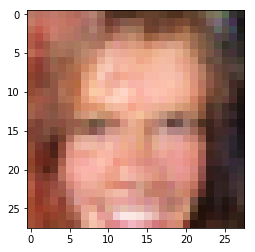

Epoch 1/1... Discriminator Loss: 1.6310... Generator Loss: 0.3746
Epoch 1/1... Discriminator Loss: 1.4174... Generator Loss: 0.5344
Epoch 1/1... Discriminator Loss: 1.1730... Generator Loss: 0.8142
Epoch 1/1... Discriminator Loss: 1.3522... Generator Loss: 0.8198
Epoch 1/1... Discriminator Loss: 1.2413... Generator Loss: 1.0358
Epoch 1/1... Discriminator Loss: 1.3843... Generator Loss: 0.6386
Epoch 1/1... Discriminator Loss: 1.5613... Generator Loss: 0.6484
Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.5331
Epoch 1/1... Discriminator Loss: 1.4060... Generator Loss: 0.5885
Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.7890


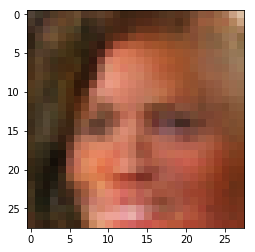

Epoch 1/1... Discriminator Loss: 1.1664... Generator Loss: 0.7276
Epoch 1/1... Discriminator Loss: 1.3296... Generator Loss: 0.8295
Epoch 1/1... Discriminator Loss: 1.4337... Generator Loss: 0.5520
Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 0.4964
Epoch 1/1... Discriminator Loss: 1.1300... Generator Loss: 0.9421
Epoch 1/1... Discriminator Loss: 1.1657... Generator Loss: 0.9622
Epoch 1/1... Discriminator Loss: 1.1999... Generator Loss: 0.8504
Epoch 1/1... Discriminator Loss: 1.3668... Generator Loss: 0.6432
Epoch 1/1... Discriminator Loss: 1.5367... Generator Loss: 0.4866
Epoch 1/1... Discriminator Loss: 1.1983... Generator Loss: 0.6414


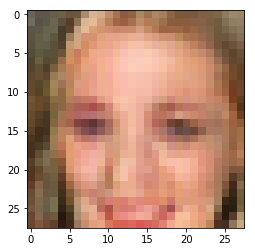

Epoch 1/1... Discriminator Loss: 1.2127... Generator Loss: 0.6812
Epoch 1/1... Discriminator Loss: 1.2728... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 1.1598... Generator Loss: 0.7196
Epoch 1/1... Discriminator Loss: 1.4190... Generator Loss: 0.6335
Epoch 1/1... Discriminator Loss: 1.3617... Generator Loss: 0.5647
Epoch 1/1... Discriminator Loss: 1.2612... Generator Loss: 0.8184
Epoch 1/1... Discriminator Loss: 1.2224... Generator Loss: 0.8991
Epoch 1/1... Discriminator Loss: 1.6600... Generator Loss: 0.4938
Epoch 1/1... Discriminator Loss: 1.4008... Generator Loss: 0.6396
Epoch 1/1... Discriminator Loss: 1.5526... Generator Loss: 0.5221


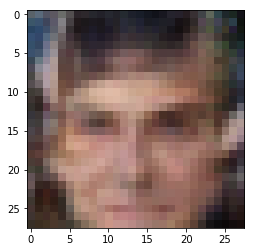

Epoch 1/1... Discriminator Loss: 1.4786... Generator Loss: 0.5095
Epoch 1/1... Discriminator Loss: 1.7294... Generator Loss: 0.4660
Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 0.8690
Epoch 1/1... Discriminator Loss: 1.2691... Generator Loss: 0.7006
Epoch 1/1... Discriminator Loss: 1.2597... Generator Loss: 0.6160
Epoch 1/1... Discriminator Loss: 1.6192... Generator Loss: 0.4891
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 0.5288
Epoch 1/1... Discriminator Loss: 1.2941... Generator Loss: 0.6931
Epoch 1/1... Discriminator Loss: 1.6539... Generator Loss: 0.4135
Epoch 1/1... Discriminator Loss: 1.2704... Generator Loss: 0.7383


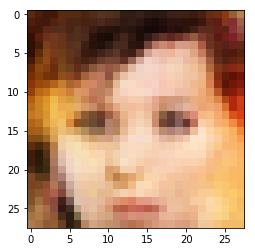

Epoch 1/1... Discriminator Loss: 1.0077... Generator Loss: 1.0077
Epoch 1/1... Discriminator Loss: 1.2583... Generator Loss: 0.7270
Epoch 1/1... Discriminator Loss: 1.3262... Generator Loss: 0.6484
Epoch 1/1... Discriminator Loss: 1.6429... Generator Loss: 0.4411
Epoch 1/1... Discriminator Loss: 1.3755... Generator Loss: 0.7140
Epoch 1/1... Discriminator Loss: 1.3546... Generator Loss: 0.5668
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.5742
Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.5881
Epoch 1/1... Discriminator Loss: 1.2120... Generator Loss: 0.7702
Epoch 1/1... Discriminator Loss: 1.4787... Generator Loss: 0.6025


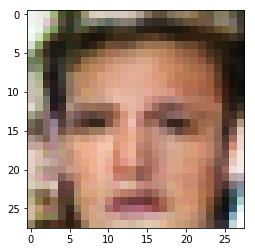

Epoch 1/1... Discriminator Loss: 1.2752... Generator Loss: 0.8087
Epoch 1/1... Discriminator Loss: 1.2235... Generator Loss: 0.6965
Epoch 1/1... Discriminator Loss: 1.1163... Generator Loss: 0.7140
Epoch 1/1... Discriminator Loss: 1.2490... Generator Loss: 0.8461
Epoch 1/1... Discriminator Loss: 1.4003... Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.4991... Generator Loss: 0.5843
Epoch 1/1... Discriminator Loss: 1.0428... Generator Loss: 0.8066
Epoch 1/1... Discriminator Loss: 1.0861... Generator Loss: 0.7248
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.5494
Epoch 1/1... Discriminator Loss: 1.2316... Generator Loss: 0.6963


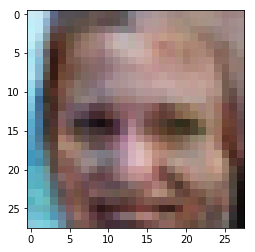

Epoch 1/1... Discriminator Loss: 1.2363... Generator Loss: 0.6283
Epoch 1/1... Discriminator Loss: 1.2557... Generator Loss: 0.6641
Epoch 1/1... Discriminator Loss: 1.4046... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 1.6499... Generator Loss: 0.4016
Epoch 1/1... Discriminator Loss: 1.5119... Generator Loss: 0.4971
Epoch 1/1... Discriminator Loss: 1.2403... Generator Loss: 0.7620
Epoch 1/1... Discriminator Loss: 1.5114... Generator Loss: 0.5217
Epoch 1/1... Discriminator Loss: 1.3817... Generator Loss: 0.5552
Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.7765
Epoch 1/1... Discriminator Loss: 1.2053... Generator Loss: 0.7153


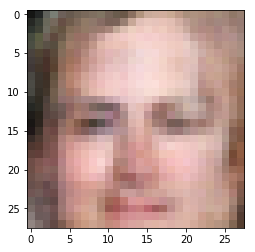

Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.5977
Epoch 1/1... Discriminator Loss: 1.2577... Generator Loss: 0.6641
Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.5921
Epoch 1/1... Discriminator Loss: 1.4605... Generator Loss: 0.5724
Epoch 1/1... Discriminator Loss: 1.2436... Generator Loss: 0.7432
Epoch 1/1... Discriminator Loss: 1.6646... Generator Loss: 0.4025
Epoch 1/1... Discriminator Loss: 1.4251... Generator Loss: 0.5927
Epoch 1/1... Discriminator Loss: 1.2562... Generator Loss: 0.6576
Epoch 1/1... Discriminator Loss: 1.5364... Generator Loss: 0.5194
Epoch 1/1... Discriminator Loss: 1.3063... Generator Loss: 0.7585


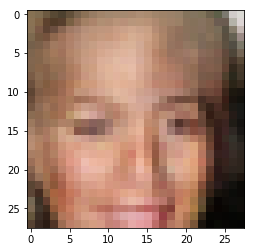

Epoch 1/1... Discriminator Loss: 1.3752... Generator Loss: 0.6134
Epoch 1/1... Discriminator Loss: 1.1955... Generator Loss: 0.7704
Epoch 1/1... Discriminator Loss: 1.2489... Generator Loss: 0.5987
Epoch 1/1... Discriminator Loss: 1.3264... Generator Loss: 0.7722
Epoch 1/1... Discriminator Loss: 1.2954... Generator Loss: 0.6992
Epoch 1/1... Discriminator Loss: 1.3587... Generator Loss: 0.6123
Epoch 1/1... Discriminator Loss: 1.0550... Generator Loss: 0.8658
Epoch 1/1... Discriminator Loss: 1.1466... Generator Loss: 0.7427
Epoch 1/1... Discriminator Loss: 1.4154... Generator Loss: 0.6972
Epoch 1/1... Discriminator Loss: 1.4974... Generator Loss: 0.6692


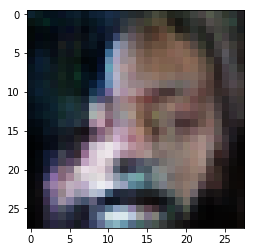

Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 0.5454
Epoch 1/1... Discriminator Loss: 1.0573... Generator Loss: 1.1079
Epoch 1/1... Discriminator Loss: 1.3316... Generator Loss: 0.6871
Epoch 1/1... Discriminator Loss: 1.3299... Generator Loss: 0.7688
Epoch 1/1... Discriminator Loss: 1.2576... Generator Loss: 0.6384
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.6639
Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 0.5352
Epoch 1/1... Discriminator Loss: 1.1807... Generator Loss: 0.8218
Epoch 1/1... Discriminator Loss: 1.3144... Generator Loss: 0.6523
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.6855


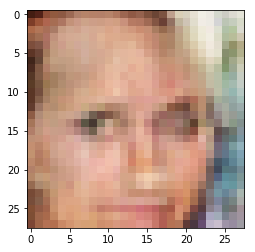

Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.3034... Generator Loss: 0.7797
Epoch 1/1... Discriminator Loss: 1.3053... Generator Loss: 0.6984
Epoch 1/1... Discriminator Loss: 1.3184... Generator Loss: 0.5811
Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.5760
Epoch 1/1... Discriminator Loss: 1.2754... Generator Loss: 0.6829
Epoch 1/1... Discriminator Loss: 1.0703... Generator Loss: 0.9345
Epoch 1/1... Discriminator Loss: 1.2002... Generator Loss: 0.7045
Epoch 1/1... Discriminator Loss: 1.1863... Generator Loss: 0.7672
Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.6403


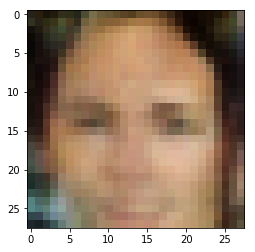

Epoch 1/1... Discriminator Loss: 1.3018... Generator Loss: 0.7656
Epoch 1/1... Discriminator Loss: 1.4728... Generator Loss: 0.5258
Epoch 1/1... Discriminator Loss: 1.5924... Generator Loss: 0.5211
Epoch 1/1... Discriminator Loss: 1.2985... Generator Loss: 0.5693
Epoch 1/1... Discriminator Loss: 1.3799... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.6317
Epoch 1/1... Discriminator Loss: 0.9971... Generator Loss: 0.9594
Epoch 1/1... Discriminator Loss: 1.4612... Generator Loss: 0.8512
Epoch 1/1... Discriminator Loss: 1.4245... Generator Loss: 0.5895
Epoch 1/1... Discriminator Loss: 1.1558... Generator Loss: 0.8945


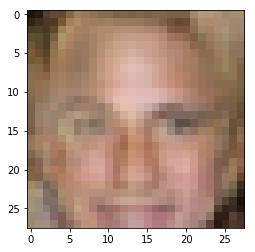

Epoch 1/1... Discriminator Loss: 1.1435... Generator Loss: 0.7584
Epoch 1/1... Discriminator Loss: 1.4923... Generator Loss: 0.4947
Epoch 1/1... Discriminator Loss: 1.2676... Generator Loss: 0.6998
Epoch 1/1... Discriminator Loss: 1.1370... Generator Loss: 0.8230
Epoch 1/1... Discriminator Loss: 1.5053... Generator Loss: 0.5509
Epoch 1/1... Discriminator Loss: 1.2591... Generator Loss: 0.8904
Epoch 1/1... Discriminator Loss: 1.3316... Generator Loss: 0.6556
Epoch 1/1... Discriminator Loss: 1.2653... Generator Loss: 0.6570
Epoch 1/1... Discriminator Loss: 1.3022... Generator Loss: 0.5810
Epoch 1/1... Discriminator Loss: 1.3444... Generator Loss: 0.5999


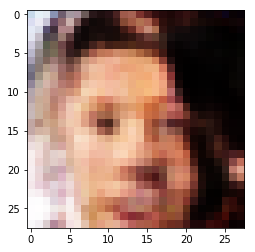

Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 0.9556
Epoch 1/1... Discriminator Loss: 1.2915... Generator Loss: 0.6647
Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 0.6594
Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 0.8017
Epoch 1/1... Discriminator Loss: 1.1606... Generator Loss: 0.8157
Epoch 1/1... Discriminator Loss: 1.2249... Generator Loss: 1.0141
Epoch 1/1... Discriminator Loss: 1.4260... Generator Loss: 0.5056
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 0.6678
Epoch 1/1... Discriminator Loss: 1.2192... Generator Loss: 0.6293
Epoch 1/1... Discriminator Loss: 1.4930... Generator Loss: 0.5695


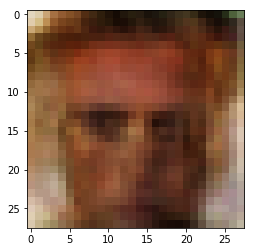

Epoch 1/1... Discriminator Loss: 0.9870... Generator Loss: 1.1570
Epoch 1/1... Discriminator Loss: 1.0790... Generator Loss: 0.9506
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.5611
Epoch 1/1... Discriminator Loss: 1.2553... Generator Loss: 0.7195
Epoch 1/1... Discriminator Loss: 1.1369... Generator Loss: 0.9618
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.5424
Epoch 1/1... Discriminator Loss: 1.1875... Generator Loss: 0.9675
Epoch 1/1... Discriminator Loss: 1.7996... Generator Loss: 0.3830
Epoch 1/1... Discriminator Loss: 1.2814... Generator Loss: 0.6250
Epoch 1/1... Discriminator Loss: 1.5248... Generator Loss: 0.4427


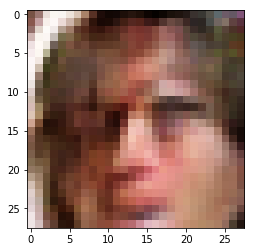

Epoch 1/1... Discriminator Loss: 1.3324... Generator Loss: 0.5940
Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 0.5945
Epoch 1/1... Discriminator Loss: 1.2142... Generator Loss: 0.6717
Epoch 1/1... Discriminator Loss: 1.2906... Generator Loss: 0.6005
Epoch 1/1... Discriminator Loss: 1.2262... Generator Loss: 0.7350
Epoch 1/1... Discriminator Loss: 1.1774... Generator Loss: 0.6703
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.6455
Epoch 1/1... Discriminator Loss: 1.2729... Generator Loss: 0.7120
Epoch 1/1... Discriminator Loss: 1.3701... Generator Loss: 0.7058
Epoch 1/1... Discriminator Loss: 1.5879... Generator Loss: 0.3635


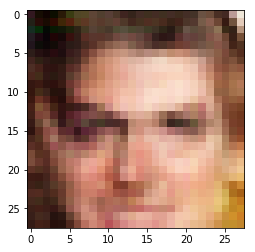

Epoch 1/1... Discriminator Loss: 1.4361... Generator Loss: 0.8494
Epoch 1/1... Discriminator Loss: 1.4243... Generator Loss: 0.6189
Epoch 1/1... Discriminator Loss: 1.2576... Generator Loss: 0.7952
Epoch 1/1... Discriminator Loss: 1.0260... Generator Loss: 0.9469
Epoch 1/1... Discriminator Loss: 1.5263... Generator Loss: 0.5434
Epoch 1/1... Discriminator Loss: 1.5285... Generator Loss: 0.4526
Epoch 1/1... Discriminator Loss: 1.5495... Generator Loss: 0.4282
Epoch 1/1... Discriminator Loss: 1.4577... Generator Loss: 0.5661
Epoch 1/1... Discriminator Loss: 1.2084... Generator Loss: 0.7151
Epoch 1/1... Discriminator Loss: 1.2161... Generator Loss: 0.7556


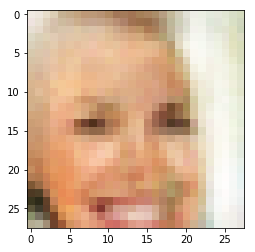

Epoch 1/1... Discriminator Loss: 1.1208... Generator Loss: 0.7805
Epoch 1/1... Discriminator Loss: 1.3206... Generator Loss: 0.5940
Epoch 1/1... Discriminator Loss: 1.6069... Generator Loss: 0.4624
Epoch 1/1... Discriminator Loss: 1.3999... Generator Loss: 0.5529
Epoch 1/1... Discriminator Loss: 1.3488... Generator Loss: 0.7121
Epoch 1/1... Discriminator Loss: 1.2697... Generator Loss: 0.5678
Epoch 1/1... Discriminator Loss: 0.9604... Generator Loss: 0.8487
Epoch 1/1... Discriminator Loss: 1.6052... Generator Loss: 0.5300
Epoch 1/1... Discriminator Loss: 1.4241... Generator Loss: 0.4685
Epoch 1/1... Discriminator Loss: 1.5586... Generator Loss: 0.6123


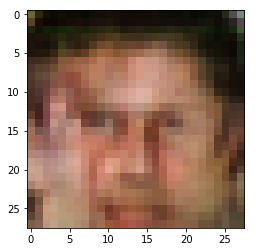

Epoch 1/1... Discriminator Loss: 1.1088... Generator Loss: 0.8367
Epoch 1/1... Discriminator Loss: 1.2275... Generator Loss: 0.5692
Epoch 1/1... Discriminator Loss: 1.2620... Generator Loss: 0.5919
Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.6992
Epoch 1/1... Discriminator Loss: 1.2451... Generator Loss: 0.7307
Epoch 1/1... Discriminator Loss: 1.2552... Generator Loss: 0.7722
Epoch 1/1... Discriminator Loss: 1.1798... Generator Loss: 0.8767
Epoch 1/1... Discriminator Loss: 1.4676... Generator Loss: 0.7094
Epoch 1/1... Discriminator Loss: 1.4507... Generator Loss: 0.6002
Epoch 1/1... Discriminator Loss: 1.1236... Generator Loss: 1.1168


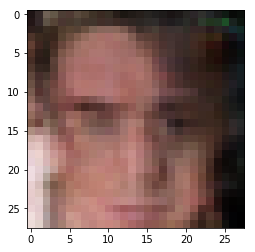

Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 0.6560
Epoch 1/1... Discriminator Loss: 1.3047... Generator Loss: 0.8215
Epoch 1/1... Discriminator Loss: 1.2298... Generator Loss: 0.6959
Epoch 1/1... Discriminator Loss: 1.2295... Generator Loss: 0.6645
Epoch 1/1... Discriminator Loss: 1.1586... Generator Loss: 0.7791
Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.6580
Epoch 1/1... Discriminator Loss: 1.5326... Generator Loss: 0.5685
Epoch 1/1... Discriminator Loss: 1.0045... Generator Loss: 0.9656
Epoch 1/1... Discriminator Loss: 1.2448... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 1.5976... Generator Loss: 0.5013


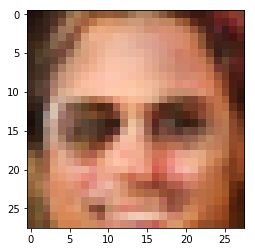

Epoch 1/1... Discriminator Loss: 0.9789... Generator Loss: 1.1040
Epoch 1/1... Discriminator Loss: 1.1871... Generator Loss: 0.7027
Epoch 1/1... Discriminator Loss: 1.4932... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.2784... Generator Loss: 0.8542
Epoch 1/1... Discriminator Loss: 1.0774... Generator Loss: 0.9594
Epoch 1/1... Discriminator Loss: 1.4252... Generator Loss: 0.5862
Epoch 1/1... Discriminator Loss: 1.5618... Generator Loss: 0.4603
Epoch 1/1... Discriminator Loss: 1.2746... Generator Loss: 0.6794
Epoch 1/1... Discriminator Loss: 1.1559... Generator Loss: 0.8450
Epoch 1/1... Discriminator Loss: 1.5484... Generator Loss: 0.5079


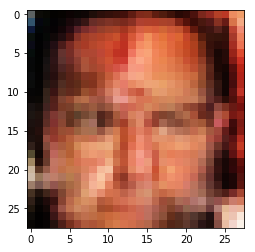

Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.5577
Epoch 1/1... Discriminator Loss: 1.2606... Generator Loss: 0.6442
Epoch 1/1... Discriminator Loss: 1.3264... Generator Loss: 0.8706
Epoch 1/1... Discriminator Loss: 1.4331... Generator Loss: 0.6971
Epoch 1/1... Discriminator Loss: 1.1207... Generator Loss: 0.8493
Epoch 1/1... Discriminator Loss: 1.0817... Generator Loss: 0.8171
Epoch 1/1... Discriminator Loss: 1.1325... Generator Loss: 0.8579
Epoch 1/1... Discriminator Loss: 1.3158... Generator Loss: 0.7209
Epoch 1/1... Discriminator Loss: 1.2703... Generator Loss: 0.8441
Epoch 1/1... Discriminator Loss: 1.4282... Generator Loss: 0.5157


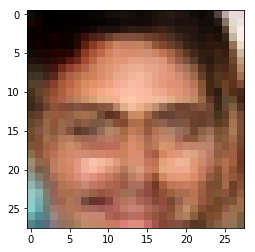

Epoch 1/1... Discriminator Loss: 1.1442... Generator Loss: 0.8654
Epoch 1/1... Discriminator Loss: 1.4231... Generator Loss: 0.5920
Epoch 1/1... Discriminator Loss: 1.2933... Generator Loss: 0.7266
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 0.5777
Epoch 1/1... Discriminator Loss: 1.6796... Generator Loss: 0.4174
Epoch 1/1... Discriminator Loss: 1.2774... Generator Loss: 0.6051
Epoch 1/1... Discriminator Loss: 1.2241... Generator Loss: 0.9204
Epoch 1/1... Discriminator Loss: 1.0424... Generator Loss: 0.8885
Epoch 1/1... Discriminator Loss: 1.3311... Generator Loss: 0.6001
Epoch 1/1... Discriminator Loss: 1.3385... Generator Loss: 0.7365


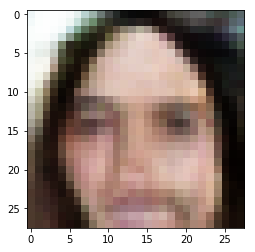

Epoch 1/1... Discriminator Loss: 1.4240... Generator Loss: 0.6413
Epoch 1/1... Discriminator Loss: 0.9967... Generator Loss: 1.1639
Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 0.6108
Epoch 1/1... Discriminator Loss: 1.2816... Generator Loss: 0.6702
Epoch 1/1... Discriminator Loss: 1.5678... Generator Loss: 0.5311
Epoch 1/1... Discriminator Loss: 1.3161... Generator Loss: 0.6065
Epoch 1/1... Discriminator Loss: 1.3061... Generator Loss: 0.7313
Epoch 1/1... Discriminator Loss: 1.2233... Generator Loss: 0.7491
Epoch 1/1... Discriminator Loss: 1.4224... Generator Loss: 0.5279
Epoch 1/1... Discriminator Loss: 1.2066... Generator Loss: 0.8051


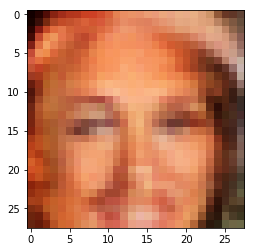

Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.6754
Epoch 1/1... Discriminator Loss: 1.1082... Generator Loss: 1.0571
Epoch 1/1... Discriminator Loss: 1.3214... Generator Loss: 0.5548
Epoch 1/1... Discriminator Loss: 1.2532... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.1097... Generator Loss: 0.9970
Epoch 1/1... Discriminator Loss: 1.1118... Generator Loss: 0.7932
Epoch 1/1... Discriminator Loss: 1.2578... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 0.9545... Generator Loss: 0.9907
Epoch 1/1... Discriminator Loss: 1.5276... Generator Loss: 0.4649
Epoch 1/1... Discriminator Loss: 1.1890... Generator Loss: 0.7572


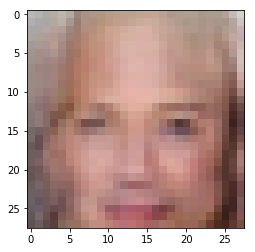

Epoch 1/1... Discriminator Loss: 1.0186... Generator Loss: 1.1273
Epoch 1/1... Discriminator Loss: 1.2446... Generator Loss: 0.7389
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.5395
Epoch 1/1... Discriminator Loss: 1.1955... Generator Loss: 0.7184
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.4899
Epoch 1/1... Discriminator Loss: 1.4746... Generator Loss: 0.5859
Epoch 1/1... Discriminator Loss: 1.2937... Generator Loss: 0.7729
Epoch 1/1... Discriminator Loss: 1.1863... Generator Loss: 0.8296
Epoch 1/1... Discriminator Loss: 1.3405... Generator Loss: 0.6421
Epoch 1/1... Discriminator Loss: 1.1331... Generator Loss: 0.9419


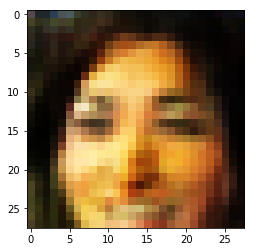

Epoch 1/1... Discriminator Loss: 1.1254... Generator Loss: 0.8939
Epoch 1/1... Discriminator Loss: 1.2876... Generator Loss: 0.7767
Epoch 1/1... Discriminator Loss: 1.8192... Generator Loss: 0.3878
Epoch 1/1... Discriminator Loss: 1.2215... Generator Loss: 0.8731
Epoch 1/1... Discriminator Loss: 1.2739... Generator Loss: 0.7085
Epoch 1/1... Discriminator Loss: 1.2682... Generator Loss: 0.6905
Epoch 1/1... Discriminator Loss: 1.0670... Generator Loss: 0.7882
Epoch 1/1... Discriminator Loss: 1.2875... Generator Loss: 0.6328
Epoch 1/1... Discriminator Loss: 1.1002... Generator Loss: 0.8087
Epoch 1/1... Discriminator Loss: 1.7396... Generator Loss: 0.3527


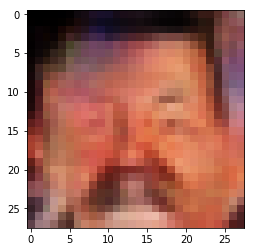

Epoch 1/1... Discriminator Loss: 1.1251... Generator Loss: 0.7259
Epoch 1/1... Discriminator Loss: 1.2738... Generator Loss: 0.6518
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.5692
Epoch 1/1... Discriminator Loss: 1.1223... Generator Loss: 0.9624
Epoch 1/1... Discriminator Loss: 1.2993... Generator Loss: 0.7959
Epoch 1/1... Discriminator Loss: 1.1737... Generator Loss: 0.8328
Epoch 1/1... Discriminator Loss: 1.3027... Generator Loss: 0.5324
Epoch 1/1... Discriminator Loss: 1.1567... Generator Loss: 0.7349
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.5696
Epoch 1/1... Discriminator Loss: 1.2481... Generator Loss: 0.8300


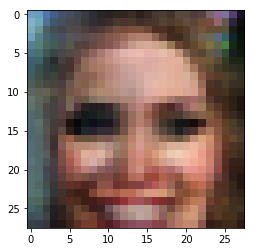

Epoch 1/1... Discriminator Loss: 1.4839... Generator Loss: 0.5048
Epoch 1/1... Discriminator Loss: 1.1157... Generator Loss: 1.0548
Epoch 1/1... Discriminator Loss: 1.5556... Generator Loss: 0.4646
Epoch 1/1... Discriminator Loss: 1.3296... Generator Loss: 0.5343
Epoch 1/1... Discriminator Loss: 1.2284... Generator Loss: 0.6980
Epoch 1/1... Discriminator Loss: 1.1259... Generator Loss: 0.9993
Epoch 1/1... Discriminator Loss: 1.4454... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.2678... Generator Loss: 0.7109
Epoch 1/1... Discriminator Loss: 0.9538... Generator Loss: 1.0110
Epoch 1/1... Discriminator Loss: 0.9996... Generator Loss: 0.9565


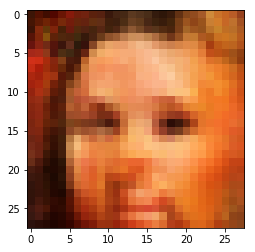

Epoch 1/1... Discriminator Loss: 1.3188... Generator Loss: 0.5931
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.5099
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.7104
Epoch 1/1... Discriminator Loss: 1.3369... Generator Loss: 0.5684
Epoch 1/1... Discriminator Loss: 1.3769... Generator Loss: 0.6247
Epoch 1/1... Discriminator Loss: 1.4944... Generator Loss: 0.6412
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.6158
Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 0.8119
Epoch 1/1... Discriminator Loss: 1.6472... Generator Loss: 0.3686
Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.7716


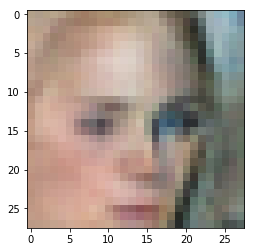

Epoch 1/1... Discriminator Loss: 1.2436... Generator Loss: 0.6784
Epoch 1/1... Discriminator Loss: 1.2467... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.2124... Generator Loss: 0.6448
Epoch 1/1... Discriminator Loss: 1.1770... Generator Loss: 0.6724
Epoch 1/1... Discriminator Loss: 1.2994... Generator Loss: 0.7178
Epoch 1/1... Discriminator Loss: 1.0732... Generator Loss: 0.8202
Epoch 1/1... Discriminator Loss: 1.1915... Generator Loss: 0.8812
Epoch 1/1... Discriminator Loss: 1.1241... Generator Loss: 0.9953
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.6487


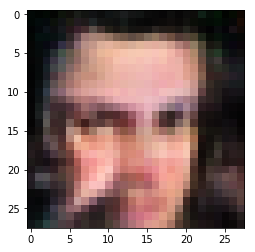

Epoch 1/1... Discriminator Loss: 1.4781... Generator Loss: 0.5055
Epoch 1/1... Discriminator Loss: 1.1417... Generator Loss: 0.7939
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.7458
Epoch 1/1... Discriminator Loss: 1.3726... Generator Loss: 0.5388
Epoch 1/1... Discriminator Loss: 1.2371... Generator Loss: 0.6300
Epoch 1/1... Discriminator Loss: 1.5406... Generator Loss: 0.4452
Epoch 1/1... Discriminator Loss: 0.9611... Generator Loss: 0.9655
Epoch 1/1... Discriminator Loss: 1.2422... Generator Loss: 0.6033
Epoch 1/1... Discriminator Loss: 1.4839... Generator Loss: 0.5890
Epoch 1/1... Discriminator Loss: 1.2240... Generator Loss: 0.7250


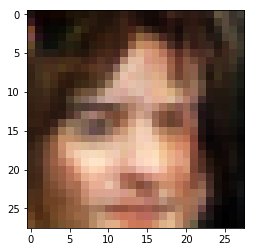

Epoch 1/1... Discriminator Loss: 0.7766... Generator Loss: 1.3751
Epoch 1/1... Discriminator Loss: 1.3099... Generator Loss: 0.5595
Epoch 1/1... Discriminator Loss: 1.1461... Generator Loss: 0.9266
Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 0.6181
Epoch 1/1... Discriminator Loss: 1.2341... Generator Loss: 0.5956
Epoch 1/1... Discriminator Loss: 1.1703... Generator Loss: 0.6176
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.5900
Epoch 1/1... Discriminator Loss: 0.9616... Generator Loss: 1.0118
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.6567
Epoch 1/1... Discriminator Loss: 1.1663... Generator Loss: 0.7973


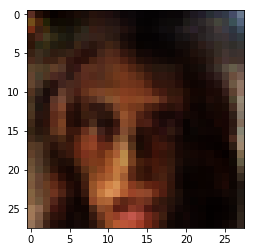

Epoch 1/1... Discriminator Loss: 1.0927... Generator Loss: 0.9548
Epoch 1/1... Discriminator Loss: 1.2357... Generator Loss: 0.6940
Epoch 1/1... Discriminator Loss: 1.2319... Generator Loss: 0.6991
Epoch 1/1... Discriminator Loss: 1.3536... Generator Loss: 0.6456
Epoch 1/1... Discriminator Loss: 1.2995... Generator Loss: 0.5921
Epoch 1/1... Discriminator Loss: 1.7882... Generator Loss: 0.4480
Epoch 1/1... Discriminator Loss: 1.3072... Generator Loss: 0.5649
Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 0.6173
Epoch 1/1... Discriminator Loss: 1.1257... Generator Loss: 0.7972
Epoch 1/1... Discriminator Loss: 1.2627... Generator Loss: 0.6589


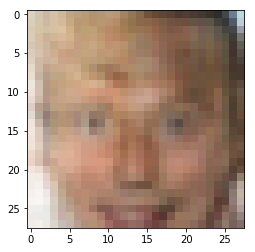

Epoch 1/1... Discriminator Loss: 1.3258... Generator Loss: 0.5954
Epoch 1/1... Discriminator Loss: 1.1068... Generator Loss: 0.8796
Epoch 1/1... Discriminator Loss: 1.0526... Generator Loss: 0.9024
Epoch 1/1... Discriminator Loss: 1.1598... Generator Loss: 0.9657
Epoch 1/1... Discriminator Loss: 1.2523... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.1605... Generator Loss: 0.7239
Epoch 1/1... Discriminator Loss: 1.2368... Generator Loss: 0.6710
Epoch 1/1... Discriminator Loss: 1.2186... Generator Loss: 0.7420
Epoch 1/1... Discriminator Loss: 1.4506... Generator Loss: 0.4467
Epoch 1/1... Discriminator Loss: 1.4305... Generator Loss: 0.6584


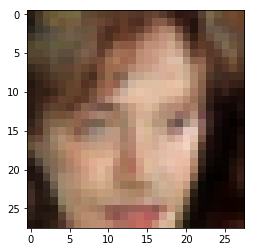

Epoch 1/1... Discriminator Loss: 1.3046... Generator Loss: 0.6191
Epoch 1/1... Discriminator Loss: 1.3787... Generator Loss: 0.6530
Epoch 1/1... Discriminator Loss: 1.1111... Generator Loss: 1.0984
Epoch 1/1... Discriminator Loss: 1.3973... Generator Loss: 0.6082
Epoch 1/1... Discriminator Loss: 1.2987... Generator Loss: 0.5340
Epoch 1/1... Discriminator Loss: 1.2194... Generator Loss: 0.7879
Epoch 1/1... Discriminator Loss: 1.7036... Generator Loss: 0.4090
Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.6522
Epoch 1/1... Discriminator Loss: 1.0486... Generator Loss: 0.9869
Epoch 1/1... Discriminator Loss: 1.1518... Generator Loss: 0.8461


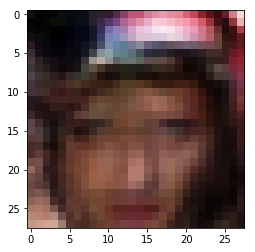

Epoch 1/1... Discriminator Loss: 1.1157... Generator Loss: 0.8705
Epoch 1/1... Discriminator Loss: 1.1414... Generator Loss: 0.8345
Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 0.6039
Epoch 1/1... Discriminator Loss: 1.3364... Generator Loss: 0.5977
Epoch 1/1... Discriminator Loss: 1.2881... Generator Loss: 0.9984
Epoch 1/1... Discriminator Loss: 0.8952... Generator Loss: 1.2258
Epoch 1/1... Discriminator Loss: 1.3443... Generator Loss: 0.5968
Epoch 1/1... Discriminator Loss: 1.5452... Generator Loss: 0.5982
Epoch 1/1... Discriminator Loss: 1.3500... Generator Loss: 0.5698
Epoch 1/1... Discriminator Loss: 1.3450... Generator Loss: 0.5447


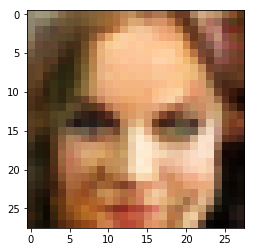

Epoch 1/1... Discriminator Loss: 1.4778... Generator Loss: 0.5433
Epoch 1/1... Discriminator Loss: 1.2920... Generator Loss: 0.7881
Epoch 1/1... Discriminator Loss: 1.3941... Generator Loss: 0.6001
Epoch 1/1... Discriminator Loss: 1.1673... Generator Loss: 1.0243
Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.3032... Generator Loss: 0.7806
Epoch 1/1... Discriminator Loss: 1.4334... Generator Loss: 0.4639
Epoch 1/1... Discriminator Loss: 1.6034... Generator Loss: 0.4254
Epoch 1/1... Discriminator Loss: 1.3269... Generator Loss: 0.5923
Epoch 1/1... Discriminator Loss: 1.0771... Generator Loss: 0.8182


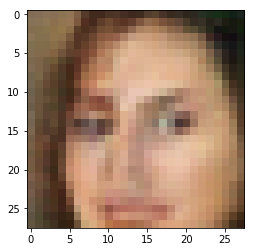

Epoch 1/1... Discriminator Loss: 1.1157... Generator Loss: 0.7890
Epoch 1/1... Discriminator Loss: 1.2588... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.6440
Epoch 1/1... Discriminator Loss: 1.2513... Generator Loss: 0.6870
Epoch 1/1... Discriminator Loss: 1.1434... Generator Loss: 0.7138
Epoch 1/1... Discriminator Loss: 1.2630... Generator Loss: 0.7141
Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 0.6645
Epoch 1/1... Discriminator Loss: 1.1068... Generator Loss: 0.7926
Epoch 1/1... Discriminator Loss: 2.0811... Generator Loss: 0.2728
Epoch 1/1... Discriminator Loss: 1.3388... Generator Loss: 0.5459


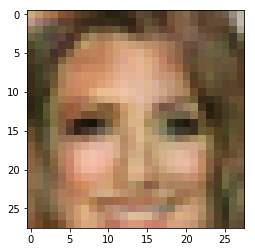

Epoch 1/1... Discriminator Loss: 1.0749... Generator Loss: 0.8327
Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 0.9512
Epoch 1/1... Discriminator Loss: 1.3026... Generator Loss: 0.5830
Epoch 1/1... Discriminator Loss: 1.2408... Generator Loss: 0.6423
Epoch 1/1... Discriminator Loss: 1.4871... Generator Loss: 0.4492
Epoch 1/1... Discriminator Loss: 1.1864... Generator Loss: 0.6747
Epoch 1/1... Discriminator Loss: 1.3305... Generator Loss: 0.6156
Epoch 1/1... Discriminator Loss: 1.1515... Generator Loss: 0.8759
Epoch 1/1... Discriminator Loss: 0.9347... Generator Loss: 0.9451
Epoch 1/1... Discriminator Loss: 1.2339... Generator Loss: 0.7151


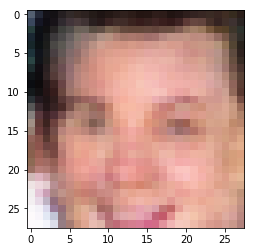

Epoch 1/1... Discriminator Loss: 0.9733... Generator Loss: 0.8096
Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 0.5153
Epoch 1/1... Discriminator Loss: 1.4697... Generator Loss: 0.4823
Epoch 1/1... Discriminator Loss: 1.4008... Generator Loss: 0.5410
Epoch 1/1... Discriminator Loss: 1.1353... Generator Loss: 0.9737
Epoch 1/1... Discriminator Loss: 1.0710... Generator Loss: 1.0044
Epoch 1/1... Discriminator Loss: 1.1655... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 1.4640... Generator Loss: 0.4869
Epoch 1/1... Discriminator Loss: 1.3516... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 1.1291... Generator Loss: 0.8130


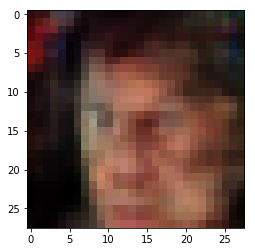

Epoch 1/1... Discriminator Loss: 1.0878... Generator Loss: 1.1864
Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.5541
Epoch 1/1... Discriminator Loss: 1.3057... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.1029... Generator Loss: 0.8814
Epoch 1/1... Discriminator Loss: 0.8537... Generator Loss: 1.2635
Epoch 1/1... Discriminator Loss: 1.3997... Generator Loss: 0.5742
Epoch 1/1... Discriminator Loss: 1.4806... Generator Loss: 0.6154
Epoch 1/1... Discriminator Loss: 1.3881... Generator Loss: 0.6566
Epoch 1/1... Discriminator Loss: 1.1738... Generator Loss: 0.8105
Epoch 1/1... Discriminator Loss: 1.3031... Generator Loss: 0.6015


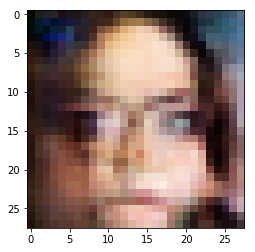

Epoch 1/1... Discriminator Loss: 1.2594... Generator Loss: 0.6242
Epoch 1/1... Discriminator Loss: 1.1645... Generator Loss: 0.7475
Epoch 1/1... Discriminator Loss: 1.2137... Generator Loss: 0.5677
Epoch 1/1... Discriminator Loss: 1.0831... Generator Loss: 0.7498
Epoch 1/1... Discriminator Loss: 1.4725... Generator Loss: 0.4257
Epoch 1/1... Discriminator Loss: 1.1220... Generator Loss: 0.8145
Epoch 1/1... Discriminator Loss: 1.5841... Generator Loss: 0.4833
Epoch 1/1... Discriminator Loss: 1.2086... Generator Loss: 0.7288
Epoch 1/1... Discriminator Loss: 1.6172... Generator Loss: 0.3763
Epoch 1/1... Discriminator Loss: 1.0658... Generator Loss: 0.9512


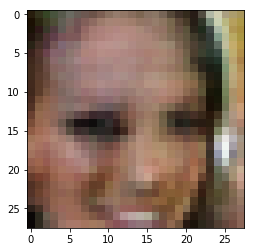

Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.5991
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.5528
Epoch 1/1... Discriminator Loss: 1.2882... Generator Loss: 0.7039
Epoch 1/1... Discriminator Loss: 1.3447... Generator Loss: 0.5715
Epoch 1/1... Discriminator Loss: 1.3082... Generator Loss: 0.6553
Epoch 1/1... Discriminator Loss: 1.2671... Generator Loss: 0.7020
Epoch 1/1... Discriminator Loss: 1.1675... Generator Loss: 0.6300
Epoch 1/1... Discriminator Loss: 0.9970... Generator Loss: 1.1912
Epoch 1/1... Discriminator Loss: 1.4895... Generator Loss: 0.4435
Epoch 1/1... Discriminator Loss: 1.1179... Generator Loss: 0.6928


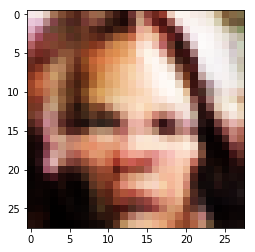

Epoch 1/1... Discriminator Loss: 1.2358... Generator Loss: 0.6099
Epoch 1/1... Discriminator Loss: 1.0777... Generator Loss: 0.9191
Epoch 1/1... Discriminator Loss: 1.2251... Generator Loss: 0.6038
Epoch 1/1... Discriminator Loss: 1.5002... Generator Loss: 0.5085
Epoch 1/1... Discriminator Loss: 1.1602... Generator Loss: 0.7252
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.5406
Epoch 1/1... Discriminator Loss: 1.3960... Generator Loss: 0.4980
Epoch 1/1... Discriminator Loss: 1.2726... Generator Loss: 0.7547
Epoch 1/1... Discriminator Loss: 1.1787... Generator Loss: 0.5919
Epoch 1/1... Discriminator Loss: 1.0642... Generator Loss: 0.8444


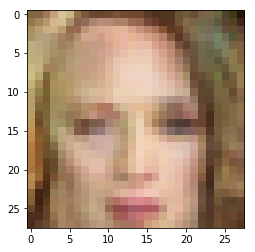

Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.5751
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.5644
Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 0.5000
Epoch 1/1... Discriminator Loss: 1.5997... Generator Loss: 0.3961
Epoch 1/1... Discriminator Loss: 1.3568... Generator Loss: 0.5324
Epoch 1/1... Discriminator Loss: 1.4337... Generator Loss: 0.5312
Epoch 1/1... Discriminator Loss: 1.3167... Generator Loss: 0.5790
Epoch 1/1... Discriminator Loss: 0.9587... Generator Loss: 0.9085
Epoch 1/1... Discriminator Loss: 1.2575... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 1.1342... Generator Loss: 0.7677


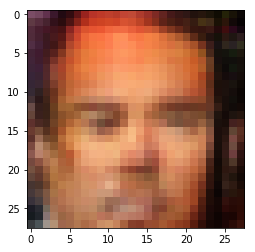

Epoch 1/1... Discriminator Loss: 1.1714... Generator Loss: 1.0009
Epoch 1/1... Discriminator Loss: 0.9682... Generator Loss: 1.1967
Epoch 1/1... Discriminator Loss: 1.4479... Generator Loss: 0.5053
Epoch 1/1... Discriminator Loss: 1.2563... Generator Loss: 0.5878
Epoch 1/1... Discriminator Loss: 1.2020... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.0167... Generator Loss: 0.9638
Epoch 1/1... Discriminator Loss: 1.0048... Generator Loss: 0.9046
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.6587
Epoch 1/1... Discriminator Loss: 1.2241... Generator Loss: 0.6934
Epoch 1/1... Discriminator Loss: 1.2296... Generator Loss: 0.6669


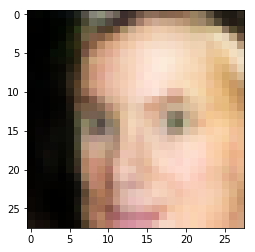

Epoch 1/1... Discriminator Loss: 1.0753... Generator Loss: 0.8738
Epoch 1/1... Discriminator Loss: 1.2189... Generator Loss: 0.6978
Epoch 1/1... Discriminator Loss: 0.9172... Generator Loss: 1.0014
Epoch 1/1... Discriminator Loss: 1.4855... Generator Loss: 0.5130
Epoch 1/1... Discriminator Loss: 1.3635... Generator Loss: 0.7827
Epoch 1/1... Discriminator Loss: 1.4487... Generator Loss: 0.4690
Epoch 1/1... Discriminator Loss: 0.9818... Generator Loss: 1.1316
Epoch 1/1... Discriminator Loss: 1.1717... Generator Loss: 0.7783
Epoch 1/1... Discriminator Loss: 1.4375... Generator Loss: 0.4660
Epoch 1/1... Discriminator Loss: 1.2810... Generator Loss: 0.5783


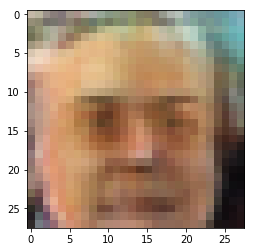

Epoch 1/1... Discriminator Loss: 1.1800... Generator Loss: 0.7791
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.5313
Epoch 1/1... Discriminator Loss: 1.2746... Generator Loss: 0.5932
Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.5756
Epoch 1/1... Discriminator Loss: 1.0857... Generator Loss: 0.9713
Epoch 1/1... Discriminator Loss: 1.3195... Generator Loss: 0.6233
Epoch 1/1... Discriminator Loss: 1.4295... Generator Loss: 0.7292
Epoch 1/1... Discriminator Loss: 1.2352... Generator Loss: 0.6645
Epoch 1/1... Discriminator Loss: 1.4141... Generator Loss: 0.7083
Epoch 1/1... Discriminator Loss: 1.2895... Generator Loss: 1.0027


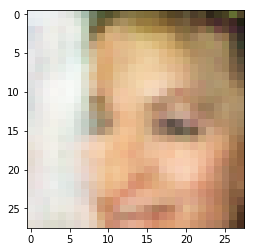

Epoch 1/1... Discriminator Loss: 1.3250... Generator Loss: 0.5001
Epoch 1/1... Discriminator Loss: 1.0653... Generator Loss: 0.8593
Epoch 1/1... Discriminator Loss: 1.5358... Generator Loss: 0.4573
Epoch 1/1... Discriminator Loss: 1.1612... Generator Loss: 0.7473
Epoch 1/1... Discriminator Loss: 1.4896... Generator Loss: 0.4388
Epoch 1/1... Discriminator Loss: 1.1704... Generator Loss: 0.8090
Epoch 1/1... Discriminator Loss: 1.3669... Generator Loss: 0.6003
Epoch 1/1... Discriminator Loss: 1.0642... Generator Loss: 0.8879
Epoch 1/1... Discriminator Loss: 1.0987... Generator Loss: 0.9071
Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 0.8512


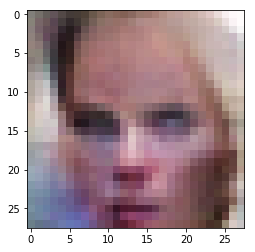

Epoch 1/1... Discriminator Loss: 1.1029... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 1.5925... Generator Loss: 0.4133
Epoch 1/1... Discriminator Loss: 1.6255... Generator Loss: 0.4106
Epoch 1/1... Discriminator Loss: 1.3579... Generator Loss: 0.6693
Epoch 1/1... Discriminator Loss: 1.2831... Generator Loss: 0.7127
Epoch 1/1... Discriminator Loss: 1.0743... Generator Loss: 0.8898
Epoch 1/1... Discriminator Loss: 1.0625... Generator Loss: 0.7763
Epoch 1/1... Discriminator Loss: 1.0444... Generator Loss: 0.9218
Epoch 1/1... Discriminator Loss: 1.1901... Generator Loss: 0.8541
Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 0.5665


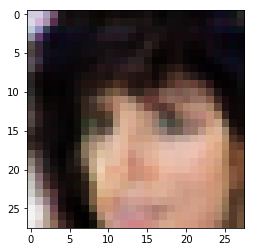

Epoch 1/1... Discriminator Loss: 1.4622... Generator Loss: 0.4585
Epoch 1/1... Discriminator Loss: 1.4434... Generator Loss: 0.4969
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.6727
Epoch 1/1... Discriminator Loss: 1.4270... Generator Loss: 0.5603
Epoch 1/1... Discriminator Loss: 1.1969... Generator Loss: 0.6597
Epoch 1/1... Discriminator Loss: 1.2537... Generator Loss: 0.7339
Epoch 1/1... Discriminator Loss: 1.3422... Generator Loss: 0.6410
Epoch 1/1... Discriminator Loss: 1.0855... Generator Loss: 0.9280
Epoch 1/1... Discriminator Loss: 1.0550... Generator Loss: 0.9084
Epoch 1/1... Discriminator Loss: 1.1021... Generator Loss: 0.6815


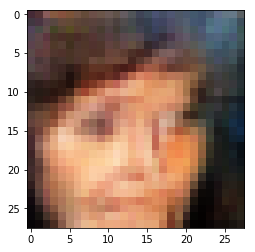

Epoch 1/1... Discriminator Loss: 1.3524... Generator Loss: 0.5559
Epoch 1/1... Discriminator Loss: 1.7041... Generator Loss: 0.4033
Epoch 1/1... Discriminator Loss: 1.1217... Generator Loss: 0.7879
Epoch 1/1... Discriminator Loss: 1.1424... Generator Loss: 0.7313
Epoch 1/1... Discriminator Loss: 1.2659... Generator Loss: 0.5989
Epoch 1/1... Discriminator Loss: 1.3697... Generator Loss: 0.6552
Epoch 1/1... Discriminator Loss: 1.1782... Generator Loss: 0.6804
Epoch 1/1... Discriminator Loss: 1.5417... Generator Loss: 0.5985
Epoch 1/1... Discriminator Loss: 1.1564... Generator Loss: 0.7360
Epoch 1/1... Discriminator Loss: 1.2339... Generator Loss: 0.7217


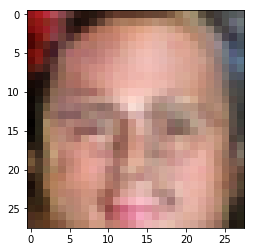

Epoch 1/1... Discriminator Loss: 1.3138... Generator Loss: 0.5777
Epoch 1/1... Discriminator Loss: 1.3057... Generator Loss: 0.5646
Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.5178
Epoch 1/1... Discriminator Loss: 1.2372... Generator Loss: 0.8397
Epoch 1/1... Discriminator Loss: 1.4425... Generator Loss: 0.5723
Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 0.7385
Epoch 1/1... Discriminator Loss: 1.1231... Generator Loss: 0.8176
Epoch 1/1... Discriminator Loss: 1.1905... Generator Loss: 0.8394
Epoch 1/1... Discriminator Loss: 1.1798... Generator Loss: 0.6345
Epoch 1/1... Discriminator Loss: 1.0617... Generator Loss: 0.7938


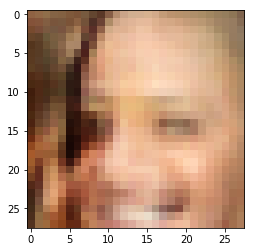

Epoch 1/1... Discriminator Loss: 1.1369... Generator Loss: 0.7975
Epoch 1/1... Discriminator Loss: 1.1503... Generator Loss: 1.0139
Epoch 1/1... Discriminator Loss: 1.0885... Generator Loss: 0.7346
Epoch 1/1... Discriminator Loss: 1.1307... Generator Loss: 0.6822
Epoch 1/1... Discriminator Loss: 1.0450... Generator Loss: 0.7344
Epoch 1/1... Discriminator Loss: 1.4254... Generator Loss: 0.5051
Epoch 1/1... Discriminator Loss: 1.2222... Generator Loss: 0.6814
Epoch 1/1... Discriminator Loss: 0.8440... Generator Loss: 1.2728
Epoch 1/1... Discriminator Loss: 0.9602... Generator Loss: 1.0191
Epoch 1/1... Discriminator Loss: 1.1442... Generator Loss: 0.7214


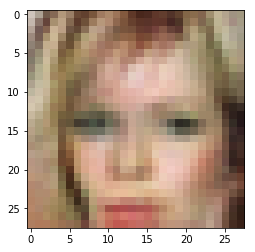

Epoch 1/1... Discriminator Loss: 1.1494... Generator Loss: 0.8535
Epoch 1/1... Discriminator Loss: 1.0977... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 1.2416... Generator Loss: 0.7658
Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.5377
Epoch 1/1... Discriminator Loss: 1.1833... Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 1.4807... Generator Loss: 0.4766
Epoch 1/1... Discriminator Loss: 0.9330... Generator Loss: 0.8954
Epoch 1/1... Discriminator Loss: 1.1128... Generator Loss: 0.7205
Epoch 1/1... Discriminator Loss: 1.2347... Generator Loss: 0.6170
Epoch 1/1... Discriminator Loss: 1.1150... Generator Loss: 0.6978


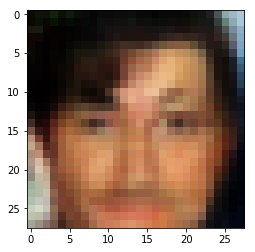

Epoch 1/1... Discriminator Loss: 1.1957... Generator Loss: 0.8065
Epoch 1/1... Discriminator Loss: 1.5260... Generator Loss: 0.4428
Epoch 1/1... Discriminator Loss: 1.9322... Generator Loss: 0.3011
Epoch 1/1... Discriminator Loss: 1.0339... Generator Loss: 0.8987
Epoch 1/1... Discriminator Loss: 1.1339... Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.2775... Generator Loss: 0.6285
Epoch 1/1... Discriminator Loss: 1.4720... Generator Loss: 0.5181
Epoch 1/1... Discriminator Loss: 1.1884... Generator Loss: 0.9523
Epoch 1/1... Discriminator Loss: 0.8892... Generator Loss: 1.0075
Epoch 1/1... Discriminator Loss: 0.6916... Generator Loss: 1.3274


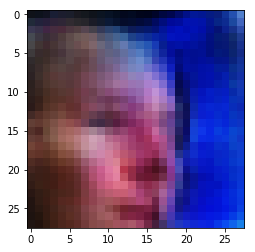

Epoch 1/1... Discriminator Loss: 1.2579... Generator Loss: 0.5909
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.5745
Epoch 1/1... Discriminator Loss: 1.2609... Generator Loss: 0.8700
Epoch 1/1... Discriminator Loss: 0.9929... Generator Loss: 0.8406
Epoch 1/1... Discriminator Loss: 1.0406... Generator Loss: 1.0763
Epoch 1/1... Discriminator Loss: 1.0437... Generator Loss: 0.7835
Epoch 1/1... Discriminator Loss: 1.4562... Generator Loss: 0.4686
Epoch 1/1... Discriminator Loss: 1.5506... Generator Loss: 0.4014
Epoch 1/1... Discriminator Loss: 1.2072... Generator Loss: 0.6244
Epoch 1/1... Discriminator Loss: 1.0726... Generator Loss: 0.8579


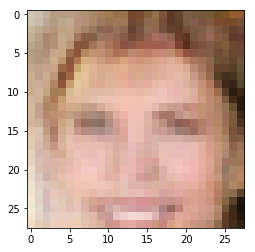

Epoch 1/1... Discriminator Loss: 1.4152... Generator Loss: 0.5840
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.5347
Epoch 1/1... Discriminator Loss: 1.2447... Generator Loss: 0.7593
Epoch 1/1... Discriminator Loss: 1.1352... Generator Loss: 0.8253
Epoch 1/1... Discriminator Loss: 1.4886... Generator Loss: 0.5235
Epoch 1/1... Discriminator Loss: 1.0874... Generator Loss: 0.7438
Epoch 1/1... Discriminator Loss: 1.1062... Generator Loss: 0.9112
Epoch 1/1... Discriminator Loss: 1.1428... Generator Loss: 0.6646
Epoch 1/1... Discriminator Loss: 1.1611... Generator Loss: 0.6787
Epoch 1/1... Discriminator Loss: 1.3098... Generator Loss: 0.6965


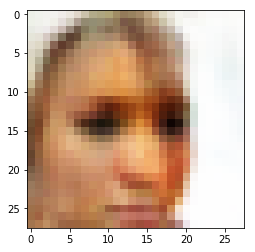

Epoch 1/1... Discriminator Loss: 1.2846... Generator Loss: 0.5896
Epoch 1/1... Discriminator Loss: 1.1054... Generator Loss: 0.8013
Epoch 1/1... Discriminator Loss: 1.2788... Generator Loss: 0.6240
Epoch 1/1... Discriminator Loss: 1.0028... Generator Loss: 0.7971
Epoch 1/1... Discriminator Loss: 1.1780... Generator Loss: 0.8264
Epoch 1/1... Discriminator Loss: 1.1895... Generator Loss: 0.6865
Epoch 1/1... Discriminator Loss: 1.2556... Generator Loss: 0.5795
Epoch 1/1... Discriminator Loss: 1.2373... Generator Loss: 0.7408
Epoch 1/1... Discriminator Loss: 0.8151... Generator Loss: 1.2111
Epoch 1/1... Discriminator Loss: 1.0409... Generator Loss: 0.7924


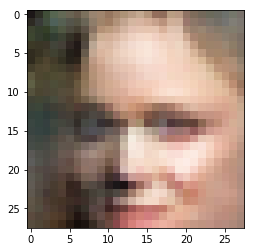

Epoch 1/1... Discriminator Loss: 1.0406... Generator Loss: 0.9071
Epoch 1/1... Discriminator Loss: 0.9775... Generator Loss: 0.9113
Epoch 1/1... Discriminator Loss: 0.9837... Generator Loss: 1.0318
Epoch 1/1... Discriminator Loss: 1.0156... Generator Loss: 0.7988
Epoch 1/1... Discriminator Loss: 1.1561... Generator Loss: 0.7248
Epoch 1/1... Discriminator Loss: 1.5199... Generator Loss: 0.5533
Epoch 1/1... Discriminator Loss: 1.2261... Generator Loss: 0.5644
Epoch 1/1... Discriminator Loss: 1.1721... Generator Loss: 0.7306
Epoch 1/1... Discriminator Loss: 0.9253... Generator Loss: 0.9318
Epoch 1/1... Discriminator Loss: 1.0681... Generator Loss: 0.7765


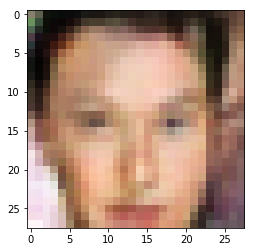

Epoch 1/1... Discriminator Loss: 1.4442... Generator Loss: 0.4846
Epoch 1/1... Discriminator Loss: 1.2587... Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 1.2738... Generator Loss: 0.5875
Epoch 1/1... Discriminator Loss: 0.8637... Generator Loss: 1.2085
Epoch 1/1... Discriminator Loss: 1.2610... Generator Loss: 0.5811
Epoch 1/1... Discriminator Loss: 1.1319... Generator Loss: 0.7886
Epoch 1/1... Discriminator Loss: 1.1697... Generator Loss: 0.6833
Epoch 1/1... Discriminator Loss: 1.0797... Generator Loss: 0.8524
Epoch 1/1... Discriminator Loss: 1.1578... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.3333... Generator Loss: 0.4845


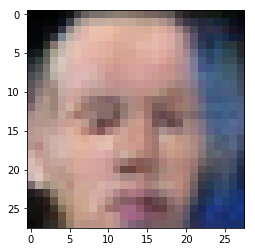

Epoch 1/1... Discriminator Loss: 1.2802... Generator Loss: 0.7457
Epoch 1/1... Discriminator Loss: 1.1904... Generator Loss: 0.6337
Epoch 1/1... Discriminator Loss: 1.2497... Generator Loss: 0.7079
Epoch 1/1... Discriminator Loss: 1.0076... Generator Loss: 0.8568
Epoch 1/1... Discriminator Loss: 1.6814... Generator Loss: 0.3654
Epoch 1/1... Discriminator Loss: 1.1398... Generator Loss: 0.8101
Epoch 1/1... Discriminator Loss: 0.8663... Generator Loss: 1.2283
Epoch 1/1... Discriminator Loss: 1.2439... Generator Loss: 1.0231
Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 0.5026
Epoch 1/1... Discriminator Loss: 0.9089... Generator Loss: 1.3215


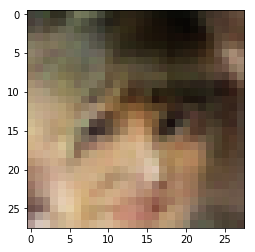

Epoch 1/1... Discriminator Loss: 1.1890... Generator Loss: 0.8300
Epoch 1/1... Discriminator Loss: 0.8287... Generator Loss: 1.0379
Epoch 1/1... Discriminator Loss: 0.9017... Generator Loss: 1.1578
Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 0.5761
Epoch 1/1... Discriminator Loss: 1.2359... Generator Loss: 0.8604
Epoch 1/1... Discriminator Loss: 1.3996... Generator Loss: 0.5793
Epoch 1/1... Discriminator Loss: 1.4185... Generator Loss: 0.5983
Epoch 1/1... Discriminator Loss: 1.1309... Generator Loss: 0.8438
Epoch 1/1... Discriminator Loss: 1.1267... Generator Loss: 0.7600
Epoch 1/1... Discriminator Loss: 1.1962... Generator Loss: 0.6507


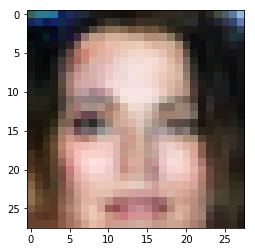

Epoch 1/1... Discriminator Loss: 1.0693... Generator Loss: 1.2579
Epoch 1/1... Discriminator Loss: 1.1673... Generator Loss: 0.8060
Epoch 1/1... Discriminator Loss: 1.3103... Generator Loss: 0.4960
Epoch 1/1... Discriminator Loss: 1.2648... Generator Loss: 0.6600
Epoch 1/1... Discriminator Loss: 1.3693... Generator Loss: 0.6195
Epoch 1/1... Discriminator Loss: 1.1831... Generator Loss: 1.1080
Epoch 1/1... Discriminator Loss: 1.4547... Generator Loss: 0.4303
Epoch 1/1... Discriminator Loss: 1.0972... Generator Loss: 0.7847
Epoch 1/1... Discriminator Loss: 1.2135... Generator Loss: 0.6667
Epoch 1/1... Discriminator Loss: 1.4169... Generator Loss: 0.5484


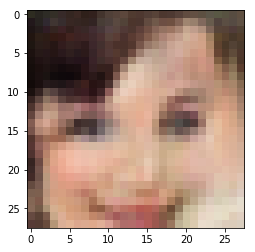

Epoch 1/1... Discriminator Loss: 1.0558... Generator Loss: 0.7276
Epoch 1/1... Discriminator Loss: 0.9326... Generator Loss: 0.8799
Epoch 1/1... Discriminator Loss: 1.7462... Generator Loss: 0.3397
Epoch 1/1... Discriminator Loss: 0.9083... Generator Loss: 0.8680
Epoch 1/1... Discriminator Loss: 1.2699... Generator Loss: 0.5679
Epoch 1/1... Discriminator Loss: 1.1391... Generator Loss: 0.8273
Epoch 1/1... Discriminator Loss: 1.1668... Generator Loss: 0.9121
Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 0.5877
Epoch 1/1... Discriminator Loss: 1.0907... Generator Loss: 0.8474
Epoch 1/1... Discriminator Loss: 1.0499... Generator Loss: 0.9947


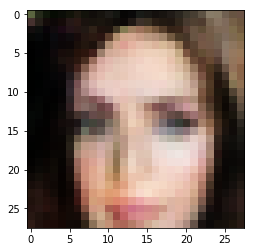

Epoch 1/1... Discriminator Loss: 1.1460... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 1.4264... Generator Loss: 0.4388
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 0.7221
Epoch 1/1... Discriminator Loss: 1.0991... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 1.0065... Generator Loss: 1.1280
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 0.6394
Epoch 1/1... Discriminator Loss: 1.3541... Generator Loss: 0.8015
Epoch 1/1... Discriminator Loss: 1.0493... Generator Loss: 0.8081
Epoch 1/1... Discriminator Loss: 1.0026... Generator Loss: 0.8863
Epoch 1/1... Discriminator Loss: 1.2976... Generator Loss: 0.5341


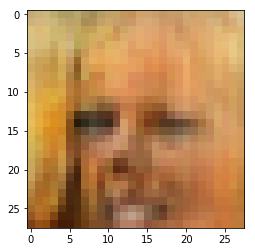

Epoch 1/1... Discriminator Loss: 1.1407... Generator Loss: 0.7311
Epoch 1/1... Discriminator Loss: 1.2034... Generator Loss: 0.7275
Epoch 1/1... Discriminator Loss: 1.5376... Generator Loss: 0.4278
Epoch 1/1... Discriminator Loss: 0.9901... Generator Loss: 0.8902
Epoch 1/1... Discriminator Loss: 0.9303... Generator Loss: 0.9901
Epoch 1/1... Discriminator Loss: 1.1571... Generator Loss: 0.7720
Epoch 1/1... Discriminator Loss: 0.8612... Generator Loss: 0.9798
Epoch 1/1... Discriminator Loss: 1.4083... Generator Loss: 0.8022
Epoch 1/1... Discriminator Loss: 1.2050... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.3189... Generator Loss: 0.6775


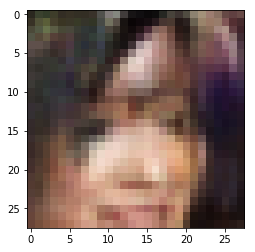

Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.4793
Epoch 1/1... Discriminator Loss: 1.3391... Generator Loss: 0.6817
Epoch 1/1... Discriminator Loss: 1.2112... Generator Loss: 0.8088
Epoch 1/1... Discriminator Loss: 0.9921... Generator Loss: 0.9535
Epoch 1/1... Discriminator Loss: 0.9104... Generator Loss: 1.1271
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.5544
Epoch 1/1... Discriminator Loss: 1.1594... Generator Loss: 0.7021
Epoch 1/1... Discriminator Loss: 1.2915... Generator Loss: 0.5934
Epoch 1/1... Discriminator Loss: 1.0351... Generator Loss: 0.8160
Epoch 1/1... Discriminator Loss: 1.4510... Generator Loss: 0.4675


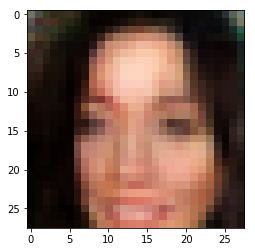

Epoch 1/1... Discriminator Loss: 1.2935... Generator Loss: 0.5273
Epoch 1/1... Discriminator Loss: 1.0578... Generator Loss: 0.8522
Epoch 1/1... Discriminator Loss: 0.8745... Generator Loss: 1.1772
Epoch 1/1... Discriminator Loss: 1.3970... Generator Loss: 0.5499
Epoch 1/1... Discriminator Loss: 1.1675... Generator Loss: 0.6572
Epoch 1/1... Discriminator Loss: 1.0138... Generator Loss: 0.9898
Epoch 1/1... Discriminator Loss: 1.1793... Generator Loss: 0.9278
Epoch 1/1... Discriminator Loss: 1.1168... Generator Loss: 0.7737
Epoch 1/1... Discriminator Loss: 1.0141... Generator Loss: 0.7742
Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.5202


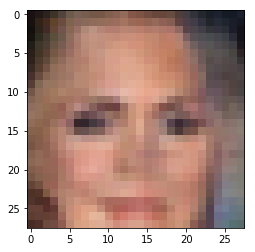

Epoch 1/1... Discriminator Loss: 0.9359... Generator Loss: 1.0709
Epoch 1/1... Discriminator Loss: 1.0874... Generator Loss: 0.8836
Epoch 1/1... Discriminator Loss: 0.9963... Generator Loss: 0.9737
Epoch 1/1... Discriminator Loss: 1.2347... Generator Loss: 0.6184
Epoch 1/1... Discriminator Loss: 2.3071... Generator Loss: 0.3643
Epoch 1/1... Discriminator Loss: 1.0734... Generator Loss: 0.9959
Epoch 1/1... Discriminator Loss: 0.9096... Generator Loss: 0.9505
Epoch 1/1... Discriminator Loss: 0.9745... Generator Loss: 0.9308
Epoch 1/1... Discriminator Loss: 1.0947... Generator Loss: 0.8552
Epoch 1/1... Discriminator Loss: 1.0770... Generator Loss: 0.7245


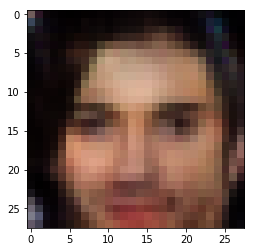

Epoch 1/1... Discriminator Loss: 1.0130... Generator Loss: 0.9305
Epoch 1/1... Discriminator Loss: 1.5675... Generator Loss: 0.5625
Epoch 1/1... Discriminator Loss: 1.1356... Generator Loss: 0.6239
Epoch 1/1... Discriminator Loss: 1.2633... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.2578... Generator Loss: 0.5575
Epoch 1/1... Discriminator Loss: 1.1621... Generator Loss: 0.6325
Epoch 1/1... Discriminator Loss: 1.1198... Generator Loss: 0.7071
Epoch 1/1... Discriminator Loss: 1.2141... Generator Loss: 0.6716
Epoch 1/1... Discriminator Loss: 0.9289... Generator Loss: 1.3058
Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 0.5744


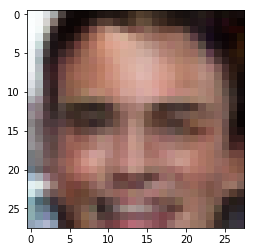

Epoch 1/1... Discriminator Loss: 1.1537... Generator Loss: 0.6115
Epoch 1/1... Discriminator Loss: 1.4250... Generator Loss: 0.4961
Epoch 1/1... Discriminator Loss: 1.1325... Generator Loss: 0.6827
Epoch 1/1... Discriminator Loss: 1.1635... Generator Loss: 0.6542
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.7124
Epoch 1/1... Discriminator Loss: 1.0580... Generator Loss: 0.8744
Epoch 1/1... Discriminator Loss: 1.0895... Generator Loss: 0.7497
Epoch 1/1... Discriminator Loss: 0.9071... Generator Loss: 1.0631
Epoch 1/1... Discriminator Loss: 1.0097... Generator Loss: 0.8570
Epoch 1/1... Discriminator Loss: 1.0742... Generator Loss: 0.7038


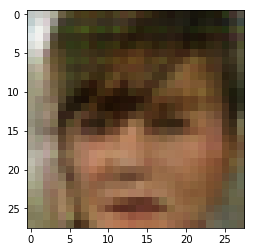

Epoch 1/1... Discriminator Loss: 0.9803... Generator Loss: 0.8217
Epoch 1/1... Discriminator Loss: 1.0682... Generator Loss: 1.0523
Epoch 1/1... Discriminator Loss: 1.3037... Generator Loss: 0.5695
Epoch 1/1... Discriminator Loss: 1.0535... Generator Loss: 0.9086
Epoch 1/1... Discriminator Loss: 0.9978... Generator Loss: 0.9336
Epoch 1/1... Discriminator Loss: 0.8060... Generator Loss: 1.1884
Epoch 1/1... Discriminator Loss: 1.3314... Generator Loss: 0.5552
Epoch 1/1... Discriminator Loss: 0.9705... Generator Loss: 0.8475
Epoch 1/1... Discriminator Loss: 0.9489... Generator Loss: 0.8830
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.4861


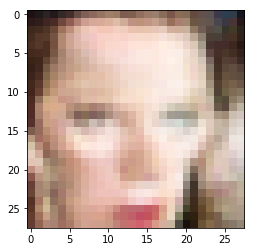

Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 0.6238
Epoch 1/1... Discriminator Loss: 0.7813... Generator Loss: 1.2871
Epoch 1/1... Discriminator Loss: 1.0925... Generator Loss: 0.9073
Epoch 1/1... Discriminator Loss: 1.1006... Generator Loss: 0.9037
Epoch 1/1... Discriminator Loss: 1.1579... Generator Loss: 0.7232
Epoch 1/1... Discriminator Loss: 0.9789... Generator Loss: 0.7923
Epoch 1/1... Discriminator Loss: 0.7699... Generator Loss: 1.6054
Epoch 1/1... Discriminator Loss: 0.7899... Generator Loss: 1.5185
Epoch 1/1... Discriminator Loss: 1.7539... Generator Loss: 0.3045
Epoch 1/1... Discriminator Loss: 1.5422... Generator Loss: 0.4121


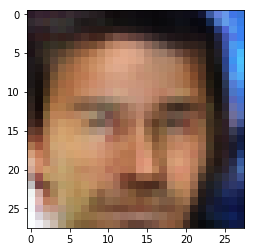

Epoch 1/1... Discriminator Loss: 1.3311... Generator Loss: 0.5271
Epoch 1/1... Discriminator Loss: 1.4427... Generator Loss: 0.4469
Epoch 1/1... Discriminator Loss: 1.1336... Generator Loss: 0.7030
Epoch 1/1... Discriminator Loss: 1.4527... Generator Loss: 0.4750
Epoch 1/1... Discriminator Loss: 1.0120... Generator Loss: 0.8958
Epoch 1/1... Discriminator Loss: 1.4730... Generator Loss: 0.4251
Epoch 1/1... Discriminator Loss: 1.0652... Generator Loss: 0.9482
Epoch 1/1... Discriminator Loss: 1.0799... Generator Loss: 0.9814
Epoch 1/1... Discriminator Loss: 0.7972... Generator Loss: 1.6033
Epoch 1/1... Discriminator Loss: 1.0213... Generator Loss: 0.8187


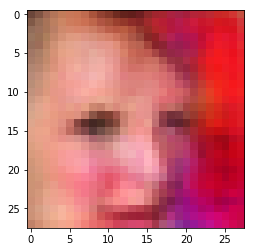

Epoch 1/1... Discriminator Loss: 1.0092... Generator Loss: 0.7586
Epoch 1/1... Discriminator Loss: 1.1911... Generator Loss: 0.8653
Epoch 1/1... Discriminator Loss: 1.0191... Generator Loss: 0.8515
Epoch 1/1... Discriminator Loss: 1.1557... Generator Loss: 0.6184
Epoch 1/1... Discriminator Loss: 1.3417... Generator Loss: 0.6161
Epoch 1/1... Discriminator Loss: 1.0774... Generator Loss: 0.8717
Epoch 1/1... Discriminator Loss: 1.0857... Generator Loss: 1.1305
Epoch 1/1... Discriminator Loss: 1.0364... Generator Loss: 0.8278
Epoch 1/1... Discriminator Loss: 1.1800... Generator Loss: 0.7215
Epoch 1/1... Discriminator Loss: 1.3232... Generator Loss: 0.5851


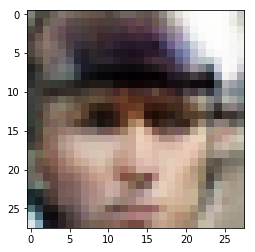

Epoch 1/1... Discriminator Loss: 1.1297... Generator Loss: 0.9156
Epoch 1/1... Discriminator Loss: 1.1635... Generator Loss: 0.5992
Epoch 1/1... Discriminator Loss: 1.0575... Generator Loss: 0.7883
Epoch 1/1... Discriminator Loss: 0.8547... Generator Loss: 1.4251
Epoch 1/1... Discriminator Loss: 0.9517... Generator Loss: 1.1096
Epoch 1/1... Discriminator Loss: 0.9878... Generator Loss: 0.9652
Epoch 1/1... Discriminator Loss: 1.1583... Generator Loss: 0.9830
Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.4961
Epoch 1/1... Discriminator Loss: 0.9664... Generator Loss: 0.8670
Epoch 1/1... Discriminator Loss: 1.0785... Generator Loss: 1.0804


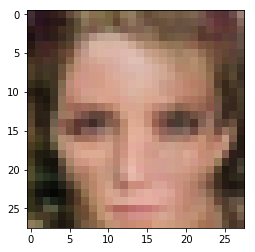

Epoch 1/1... Discriminator Loss: 1.1127... Generator Loss: 0.6740
Epoch 1/1... Discriminator Loss: 0.9094... Generator Loss: 1.0515
Epoch 1/1... Discriminator Loss: 1.1118... Generator Loss: 0.9468
Epoch 1/1... Discriminator Loss: 1.0462... Generator Loss: 0.8045
Epoch 1/1... Discriminator Loss: 1.0387... Generator Loss: 0.8417
Epoch 1/1... Discriminator Loss: 0.9854... Generator Loss: 1.1011
Epoch 1/1... Discriminator Loss: 1.1689... Generator Loss: 0.6427
Epoch 1/1... Discriminator Loss: 1.2935... Generator Loss: 0.5412
Epoch 1/1... Discriminator Loss: 1.1946... Generator Loss: 0.6068
Epoch 1/1... Discriminator Loss: 1.3615... Generator Loss: 0.4705


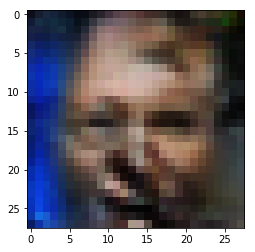

Epoch 1/1... Discriminator Loss: 1.2898... Generator Loss: 0.6299
Epoch 1/1... Discriminator Loss: 1.4145... Generator Loss: 0.4567
Epoch 1/1... Discriminator Loss: 1.6304... Generator Loss: 0.3513
Epoch 1/1... Discriminator Loss: 1.0607... Generator Loss: 0.8864
Epoch 1/1... Discriminator Loss: 1.2311... Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 1.1136... Generator Loss: 0.7135
Epoch 1/1... Discriminator Loss: 0.9390... Generator Loss: 1.0309
Epoch 1/1... Discriminator Loss: 1.1298... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.2938... Generator Loss: 0.6406
Epoch 1/1... Discriminator Loss: 1.0527... Generator Loss: 0.9124


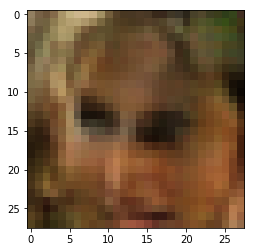

Epoch 1/1... Discriminator Loss: 1.0576... Generator Loss: 0.9128
Epoch 1/1... Discriminator Loss: 1.1521... Generator Loss: 0.6728
Epoch 1/1... Discriminator Loss: 0.8431... Generator Loss: 1.1005
Epoch 1/1... Discriminator Loss: 0.9900... Generator Loss: 0.7874
Epoch 1/1... Discriminator Loss: 1.0494... Generator Loss: 0.9288
Epoch 1/1... Discriminator Loss: 0.7565... Generator Loss: 1.3430
Epoch 1/1... Discriminator Loss: 1.0762... Generator Loss: 0.8515
Epoch 1/1... Discriminator Loss: 1.0844... Generator Loss: 0.8014
Epoch 1/1... Discriminator Loss: 1.0143... Generator Loss: 1.2198
Epoch 1/1... Discriminator Loss: 0.9479... Generator Loss: 0.8890


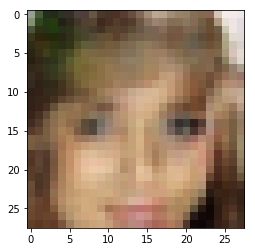

Epoch 1/1... Discriminator Loss: 1.0593... Generator Loss: 0.7650
Epoch 1/1... Discriminator Loss: 0.9418... Generator Loss: 1.2053
Epoch 1/1... Discriminator Loss: 1.2789... Generator Loss: 0.5441
Epoch 1/1... Discriminator Loss: 0.9554... Generator Loss: 1.0963
Epoch 1/1... Discriminator Loss: 0.9654... Generator Loss: 1.0548
Epoch 1/1... Discriminator Loss: 1.3439... Generator Loss: 0.5982
Epoch 1/1... Discriminator Loss: 1.1546... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 0.7851... Generator Loss: 1.2985
Epoch 1/1... Discriminator Loss: 0.7749... Generator Loss: 1.1819
Epoch 1/1... Discriminator Loss: 1.0945... Generator Loss: 0.7353


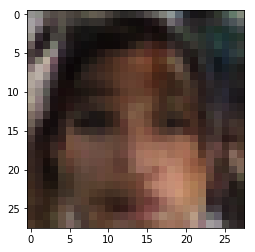

Epoch 1/1... Discriminator Loss: 1.2472... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 0.9925... Generator Loss: 0.8891
Epoch 1/1... Discriminator Loss: 0.7882... Generator Loss: 1.1249
Epoch 1/1... Discriminator Loss: 1.2469... Generator Loss: 0.7659
Epoch 1/1... Discriminator Loss: 1.3493... Generator Loss: 0.4708
Epoch 1/1... Discriminator Loss: 1.1320... Generator Loss: 1.0852
Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.9522
Epoch 1/1... Discriminator Loss: 1.0795... Generator Loss: 0.7574
Epoch 1/1... Discriminator Loss: 0.9593... Generator Loss: 0.8848
Epoch 1/1... Discriminator Loss: 1.0191... Generator Loss: 1.0320


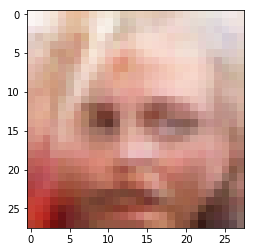

Epoch 1/1... Discriminator Loss: 1.0519... Generator Loss: 0.8062
Epoch 1/1... Discriminator Loss: 0.9376... Generator Loss: 0.9370
Epoch 1/1... Discriminator Loss: 1.2398... Generator Loss: 0.6041
Epoch 1/1... Discriminator Loss: 0.9627... Generator Loss: 0.8525
Epoch 1/1... Discriminator Loss: 1.1045... Generator Loss: 0.8763
Epoch 1/1... Discriminator Loss: 1.0799... Generator Loss: 0.7468
Epoch 1/1... Discriminator Loss: 1.1611... Generator Loss: 0.6306
Epoch 1/1... Discriminator Loss: 0.9765... Generator Loss: 0.9489
Epoch 1/1... Discriminator Loss: 0.9290... Generator Loss: 0.9245
Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.5530


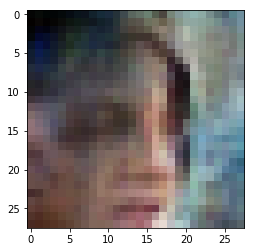

Epoch 1/1... Discriminator Loss: 0.9466... Generator Loss: 0.8533
Epoch 1/1... Discriminator Loss: 1.0387... Generator Loss: 0.7629
Epoch 1/1... Discriminator Loss: 1.3184... Generator Loss: 0.7252
Epoch 1/1... Discriminator Loss: 1.5098... Generator Loss: 0.4222
Epoch 1/1... Discriminator Loss: 1.1148... Generator Loss: 0.6983
Epoch 1/1... Discriminator Loss: 0.7382... Generator Loss: 1.3335
Epoch 1/1... Discriminator Loss: 0.9281... Generator Loss: 0.8775
Epoch 1/1... Discriminator Loss: 0.6775... Generator Loss: 1.4252
Epoch 1/1... Discriminator Loss: 0.8387... Generator Loss: 1.1410
Epoch 1/1... Discriminator Loss: 0.9990... Generator Loss: 0.8537


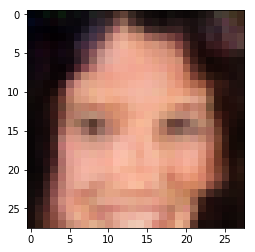

Epoch 1/1... Discriminator Loss: 1.2898... Generator Loss: 0.6384
Epoch 1/1... Discriminator Loss: 1.4448... Generator Loss: 0.4729
Epoch 1/1... Discriminator Loss: 1.1779... Generator Loss: 0.5711
Epoch 1/1... Discriminator Loss: 0.9203... Generator Loss: 1.1148
Epoch 1/1... Discriminator Loss: 1.2016... Generator Loss: 0.5734
Epoch 1/1... Discriminator Loss: 1.2902... Generator Loss: 0.6072
Epoch 1/1... Discriminator Loss: 1.2307... Generator Loss: 0.6879
Epoch 1/1... Discriminator Loss: 1.0938... Generator Loss: 0.7657
Epoch 1/1... Discriminator Loss: 1.5830... Generator Loss: 0.3710
Epoch 1/1... Discriminator Loss: 0.8560... Generator Loss: 1.2077


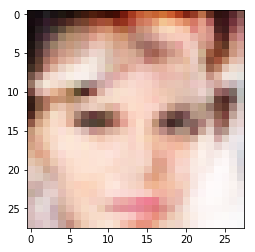

Epoch 1/1... Discriminator Loss: 0.7752... Generator Loss: 1.4352
Epoch 1/1... Discriminator Loss: 1.5245... Generator Loss: 0.5545
Epoch 1/1... Discriminator Loss: 1.2011... Generator Loss: 0.5874
Epoch 1/1... Discriminator Loss: 1.0819... Generator Loss: 0.7951
Epoch 1/1... Discriminator Loss: 0.8641... Generator Loss: 1.2724
Epoch 1/1... Discriminator Loss: 1.1715... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.1466... Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 0.9343... Generator Loss: 0.9455
Epoch 1/1... Discriminator Loss: 1.1091... Generator Loss: 0.6936
Epoch 1/1... Discriminator Loss: 0.8698... Generator Loss: 1.1610


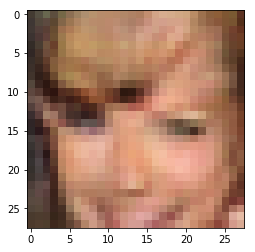

Epoch 1/1... Discriminator Loss: 0.9710... Generator Loss: 1.0664
Epoch 1/1... Discriminator Loss: 0.9240... Generator Loss: 0.9415
Epoch 1/1... Discriminator Loss: 1.2308... Generator Loss: 0.6753
Epoch 1/1... Discriminator Loss: 1.3117... Generator Loss: 0.5197
Epoch 1/1... Discriminator Loss: 0.9226... Generator Loss: 0.9667
Epoch 1/1... Discriminator Loss: 1.0831... Generator Loss: 0.7307
Epoch 1/1... Discriminator Loss: 1.2287... Generator Loss: 0.6188
Epoch 1/1... Discriminator Loss: 1.0729... Generator Loss: 0.8663
Epoch 1/1... Discriminator Loss: 1.2058... Generator Loss: 0.6758
Epoch 1/1... Discriminator Loss: 1.1073... Generator Loss: 0.7402


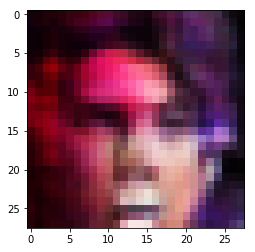

Epoch 1/1... Discriminator Loss: 1.0832... Generator Loss: 0.9692
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.5924
Epoch 1/1... Discriminator Loss: 1.0821... Generator Loss: 0.7067
Epoch 1/1... Discriminator Loss: 0.9762... Generator Loss: 1.0857
Epoch 1/1... Discriminator Loss: 0.8875... Generator Loss: 1.1205
Epoch 1/1... Discriminator Loss: 1.1678... Generator Loss: 0.7475
Epoch 1/1... Discriminator Loss: 0.6155... Generator Loss: 1.8010
Epoch 1/1... Discriminator Loss: 1.2046... Generator Loss: 0.6687
Epoch 1/1... Discriminator Loss: 1.1975... Generator Loss: 0.6589
Epoch 1/1... Discriminator Loss: 0.8572... Generator Loss: 1.0824


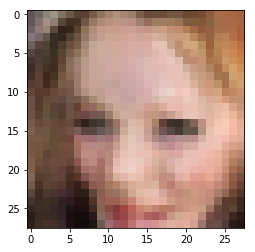

Epoch 1/1... Discriminator Loss: 0.9919... Generator Loss: 1.2231
Epoch 1/1... Discriminator Loss: 0.9664... Generator Loss: 1.2714
Epoch 1/1... Discriminator Loss: 1.2795... Generator Loss: 0.8205
Epoch 1/1... Discriminator Loss: 1.2287... Generator Loss: 0.5418
Epoch 1/1... Discriminator Loss: 1.5278... Generator Loss: 0.4295
Epoch 1/1... Discriminator Loss: 1.2479... Generator Loss: 0.6515
Epoch 1/1... Discriminator Loss: 1.1277... Generator Loss: 0.6609
Epoch 1/1... Discriminator Loss: 0.8521... Generator Loss: 1.2085
Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.5602
Epoch 1/1... Discriminator Loss: 1.8376... Generator Loss: 0.2589


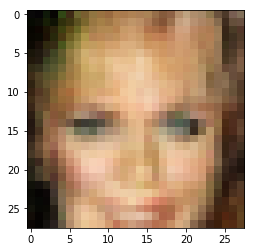

Epoch 1/1... Discriminator Loss: 1.0208... Generator Loss: 0.8910
Epoch 1/1... Discriminator Loss: 1.1133... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 0.7455... Generator Loss: 1.6164
Epoch 1/1... Discriminator Loss: 0.9080... Generator Loss: 1.2977
Epoch 1/1... Discriminator Loss: 1.2815... Generator Loss: 0.5361
Epoch 1/1... Discriminator Loss: 0.9632... Generator Loss: 0.9721
Epoch 1/1... Discriminator Loss: 0.8366... Generator Loss: 1.0136
Epoch 1/1... Discriminator Loss: 1.0714... Generator Loss: 0.9174
Epoch 1/1... Discriminator Loss: 1.3296... Generator Loss: 0.5115
Epoch 1/1... Discriminator Loss: 0.7649... Generator Loss: 1.3924


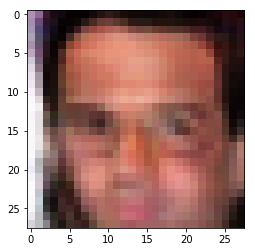

Epoch 1/1... Discriminator Loss: 1.2288... Generator Loss: 0.6283
Epoch 1/1... Discriminator Loss: 0.9665... Generator Loss: 0.9758
Epoch 1/1... Discriminator Loss: 0.8806... Generator Loss: 1.0508
Epoch 1/1... Discriminator Loss: 1.1659... Generator Loss: 0.6874
Epoch 1/1... Discriminator Loss: 1.1301... Generator Loss: 0.6992
Epoch 1/1... Discriminator Loss: 1.2319... Generator Loss: 0.5873
Epoch 1/1... Discriminator Loss: 0.7142... Generator Loss: 1.4543
Epoch 1/1... Discriminator Loss: 0.9926... Generator Loss: 0.8383
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 0.7238
Epoch 1/1... Discriminator Loss: 0.8607... Generator Loss: 1.1941


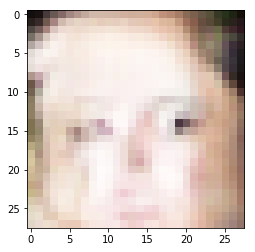

Epoch 1/1... Discriminator Loss: 0.9830... Generator Loss: 0.9498
Epoch 1/1... Discriminator Loss: 1.1508... Generator Loss: 0.9264
Epoch 1/1... Discriminator Loss: 1.4422... Generator Loss: 0.4584
Epoch 1/1... Discriminator Loss: 1.0651... Generator Loss: 0.9263
Epoch 1/1... Discriminator Loss: 0.8781... Generator Loss: 1.0263
Epoch 1/1... Discriminator Loss: 0.9699... Generator Loss: 0.9114
Epoch 1/1... Discriminator Loss: 1.0287... Generator Loss: 0.9927
Epoch 1/1... Discriminator Loss: 0.7984... Generator Loss: 1.2399
Epoch 1/1... Discriminator Loss: 1.1918... Generator Loss: 1.3914
Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 0.7112


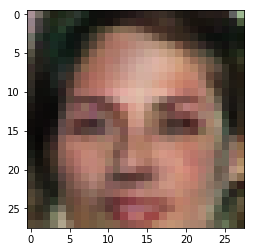

Epoch 1/1... Discriminator Loss: 0.7850... Generator Loss: 1.2043
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.5024
Epoch 1/1... Discriminator Loss: 0.9055... Generator Loss: 0.9603
Epoch 1/1... Discriminator Loss: 1.2168... Generator Loss: 0.6379
Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 0.5463
Epoch 1/1... Discriminator Loss: 1.3023... Generator Loss: 0.5166
Epoch 1/1... Discriminator Loss: 1.7562... Generator Loss: 0.5619
Epoch 1/1... Discriminator Loss: 1.4446... Generator Loss: 0.4368
Epoch 1/1... Discriminator Loss: 1.1530... Generator Loss: 0.6687
Epoch 1/1... Discriminator Loss: 1.4054... Generator Loss: 0.5515


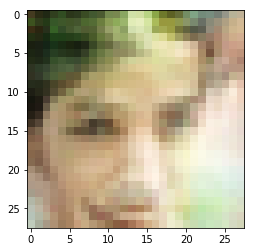

Epoch 1/1... Discriminator Loss: 1.2183... Generator Loss: 0.6990
Epoch 1/1... Discriminator Loss: 1.0800... Generator Loss: 1.1365
Epoch 1/1... Discriminator Loss: 1.0879... Generator Loss: 0.7114
Epoch 1/1... Discriminator Loss: 0.9178... Generator Loss: 2.1611
Epoch 1/1... Discriminator Loss: 0.9989... Generator Loss: 0.9329
Epoch 1/1... Discriminator Loss: 0.9794... Generator Loss: 0.8457
Epoch 1/1... Discriminator Loss: 1.3165... Generator Loss: 0.6280
Epoch 1/1... Discriminator Loss: 1.0500... Generator Loss: 0.7553
Epoch 1/1... Discriminator Loss: 1.0293... Generator Loss: 0.8209
Epoch 1/1... Discriminator Loss: 0.9219... Generator Loss: 0.9493


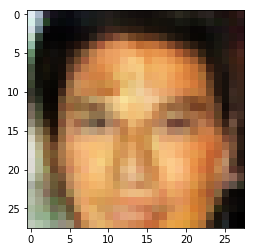

Epoch 1/1... Discriminator Loss: 1.2194... Generator Loss: 0.5829
Epoch 1/1... Discriminator Loss: 1.0440... Generator Loss: 0.7261
Epoch 1/1... Discriminator Loss: 1.3175... Generator Loss: 0.5706
Epoch 1/1... Discriminator Loss: 1.5137... Generator Loss: 0.3904
Epoch 1/1... Discriminator Loss: 0.9735... Generator Loss: 0.8525
Epoch 1/1... Discriminator Loss: 1.0744... Generator Loss: 0.7339
Epoch 1/1... Discriminator Loss: 1.1943... Generator Loss: 0.7695
Epoch 1/1... Discriminator Loss: 1.0237... Generator Loss: 1.0469
Epoch 1/1... Discriminator Loss: 1.1768... Generator Loss: 0.5973
Epoch 1/1... Discriminator Loss: 0.9910... Generator Loss: 0.9655


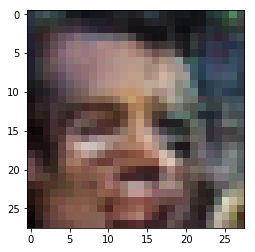

Epoch 1/1... Discriminator Loss: 0.8527... Generator Loss: 1.1621
Epoch 1/1... Discriminator Loss: 1.2134... Generator Loss: 0.6394
Epoch 1/1... Discriminator Loss: 1.4472... Generator Loss: 1.1223
Epoch 1/1... Discriminator Loss: 0.8056... Generator Loss: 1.0830
Epoch 1/1... Discriminator Loss: 0.9594... Generator Loss: 0.8487


In [147]:
batch_size = 10
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.